This jupyter-notebook has be created with 'jupytext'.

Use this [Link](https://colab.research.google.com/github/magnumnp/magnumnp_demos/blob/main/sp_domainwall_pinning.ipynb) to directly open the Notebook in Google Colab.

## Install magnum.np and fetch reference data (required for Colab)

In [1]:
!pip install -q triton magnumnp
from os import path
if not path.isdir("ref"):
    !mkdir ref
    !wget -P ref https://gitlab.com/magnum.np/magnum.np/raw/main/demos/sp_domainwall_pinning/ref/m.dat &> /dev/null

# Domainwall Pinning Standard Problem

## Run Simulation

In [2]:
from magnumnp import *
import numpy as np
import pathlib

Timer.enable()
try:
    this_dir = pathlib.Path(__file__).resolve().parent
except:
    this_dir = pathlib.Path().resolve()

Hextmax=1.8/constants.mu_0
Hextmin=1.4/constants.mu_0
tfinal = 20e-9

n  = (80, 1, 1)
dx = (1e-9, 1e-9, 1e-9)
origin = (-n[0]*dx[0]/2., -n[1]*dx[1]/2., -n[2]*dx[2]/2.,)
mesh = Mesh(n, dx, origin)
state = State(mesh)
state.material = {"alpha": state.Constant(1.)}
x, y, z = mesh.SpatialCoordinate()

soft = (x < 0)
hard = (x >= 0)

Ms = state.Constant(0.0)
Ms[soft] = 0.25/constants.mu_0
Ms[hard] = 1./constants.mu_0

Ku = state.Constant(0.0)
Ku[soft] = 1e5
Ku[hard] = 1e6

A = state.Constant(0.0)
A[soft] = 0.25e-11
A[hard] = 1.e-11

state.material['Ms'] = Ms
state.material['A'] = A
state.material['Ku'] = Ku
state.material['Ku_axis'] = state.Constant([0,1,0])

state.m = state.Constant([np.sin(0.3), np.cos(0.3), 0.0])
state.m[hard] = torch.tensor([0.0, -1.0, 0.0])
normalize(state.m)

exchange = ExchangeField()
aniso    = UniaxialAnisotropyField()
external = ExternalField(state.Constant([0, 0, 0]))

minimizer = MinimizerBB([exchange, aniso, external])
logger = ScalarLogger(this_dir / "data" / "m.dat", ['t', external.h, 'm'])
for h in torch.linspace(Hextmin, Hextmax, steps=100):
    external.h = state.Constant([0, h, 0])
    minimizer.minimize(state)
    logger << state

Timer.print_report()

2024-11-02 22:03:15  magnum.np:INFO magnum.np 2.0.1


2024-11-02 22:03:15  magnum.np:INFO [State] running on device: cpu (dtype = float64)


2024-11-02 22:03:15  magnum.np:INFO [Mesh] 80x1x1 (dx= 1e-09 x 1e-09 x 1e-09)


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 8.0263e-08, dm_max: 8.504e+06


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 1.1193e-08, dm_max: 1.2454e+07


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 2.6824e-07, dm_max: 1.5011e+07


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 3.3622e-08, dm_max: 4.8098e+07


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 2.7454e-08, dm_max: 1.7911e+07


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.5365e-08, dm_max: 1.4576e+07


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 1.5402e-08, dm_max: 3.0511e+06


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 2.3046e-08, dm_max: 1.7801e+06


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 8.0798e-08, dm_max: 1.4881e+06


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 5.4553e-08, dm_max: 1.192e+06


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 3.5563e-08, dm_max: 1.9533e+06


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.2903e-08, dm_max: 3.2188e+06


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 1.3174e-08, dm_max: 4.2515e+05


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 2.5376e-08, dm_max: 4.1691e+05


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 4.3532e-07, dm_max: 3.8976e+05


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 3.6867e-07, dm_max: 2.7795e+05


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 2.0014e-08, dm_max: 4.3683e+06


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.2695e-08, dm_max: 2.4913e+06


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 1.2491e-08, dm_max: 1.9251e+05


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 1.6578e-08, dm_max: 1.3346e+05


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 9.3543e-08, dm_max: 95686


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 9.009e-08, dm_max: 28037


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 9.5787e-08, dm_max: 47091


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.6851e-08, dm_max: 2.0799e+05


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.4235e-08, dm_max: 61583


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.3459e-08, dm_max: 20272


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 6.0299e-08, dm_max: 14916


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 3.9772e-08, dm_max: 14696


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 1.3705e-07, dm_max: 11386


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.4207e-08, dm_max: 47062


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.2974e-08, dm_max: 9924.9


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 1.3192e-08, dm_max: 8131.1


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 3.8186e-07, dm_max: 7096.1


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 1.3416e-07, dm_max: 14129


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 3.388e-08, dm_max: 45682


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 2.4218e-08, dm_max: 22580


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.4279e-08, dm_max: 15769


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.2297e-08, dm_max: 3513.8


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 3.1782e-08, dm_max: 2701.8


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 1.1598e-07, dm_max: 2566.3


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 8.0166e-07, dm_max: 2363.9


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 2.8073e-08, dm_max: 23126


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.675e-08, dm_max: 17190


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.3383e-08, dm_max: 4813.8


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 1.2645e-08, dm_max: 662


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 1.3558e-08, dm_max: 512.04


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 4.6578e-07, dm_max: 489.86


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 1.1568e-07, dm_max: 1023.1


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 3.0696e-08, dm_max: 3503.4


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.9261e-08, dm_max: 2456.4


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 1.8417e-08, dm_max: 518.67


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 1.2636e-08, dm_max: 344.63


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 4.5248e-08, dm_max: 347.14


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 8.2905e-08, dm_max: 355.07


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 1.0852e-06, dm_max: 342.01


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.3216e-08, dm_max: 8907.3


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 1.2258e-08, dm_max: 762.08


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 1.2512e-08, dm_max: 155.26


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 4.8253e-08, dm_max: 119.8


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 2.3702e-08, dm_max: 116.18


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 1.0161e-07, dm_max: 105.14


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 9.0447e-08, dm_max: 107.43


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 2.8199e-07, dm_max: 169.74


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 63, Tau: 1.806e-08, dm_max: 1753.6


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 64, Tau: 1.8356e-08, dm_max: 215.17


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 65, Tau: 1.7068e-08, dm_max: 107.93


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 66, Tau: 8.0796e-08, dm_max: 95.738


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 67, Tau: 1.865e-08, dm_max: 88.246


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 68, Tau: 3.4702e-08, dm_max: 84.887


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 69, Tau: 1.2715e-08, dm_max: 85.792


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 70, Tau: 3.5708e-08, dm_max: 84.958


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 71, Tau: 1.074e-07, dm_max: 82.557


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 72, Tau: 1.2741e-06, dm_max: 79.823


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 73, Tau: 1.2686e-08, dm_max: 2984.8


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 74, Tau: 1.2248e-08, dm_max: 138.44


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 75, Tau: 1.2527e-08, dm_max: 39.458


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 76, Tau: 6.8487e-08, dm_max: 28.421


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 77, Tau: 2.1566e-08, dm_max: 29.475


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 78, Tau: 8.6268e-08, dm_max: 23.756


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 79, Tau: 2.4324e-08, dm_max: 26.533


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 80, Tau: 6.4044e-08, dm_max: 25.467


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 81, Tau: 1.5707e-08, dm_max: 32.407


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 82, Tau: 2.8828e-08, dm_max: 20.179


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 83, Tau: 1.0855e-07, dm_max: 20.211


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 84, Tau: 1.4637e-06, dm_max: 20.786


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 85, Tau: 1.7034e-08, dm_max: 347.62


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 86, Tau: 1.4621e-08, dm_max: 74.053


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 87, Tau: 1.3337e-08, dm_max: 9.2616


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 88, Tau: 1.3459e-08, dm_max: 2.547


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 89, Tau: 1.4168e-08, dm_max: 2.5036


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 90, Tau: 8.4916e-07, dm_max: 2.4893


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 91, Tau: 4.4615e-07, dm_max: 2.5523


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 92, Tau: 7.6499e-08, dm_max: 34.799


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 93, Tau: 1.2468e-08, dm_max: 167.29


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 94, Tau: 1.2323e-08, dm_max: 11.77


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 95, Tau: 1.9458e-08, dm_max: 4.9953


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 96, Tau: 2.6403e-08, dm_max: 2.3019


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 97, Tau: 3.0842e-08, dm_max: 1.7804


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 98, Tau: 4.553e-07, dm_max: 1.699


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 99, Tau: 1.4346e-07, dm_max: 1.8727


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 100, Tau: 1.994e-08, dm_max: 15.914


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 101, Tau: 1.3389e-08, dm_max: 7.1767


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 102, Tau: 1.2804e-08, dm_max: 1.0128


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.3752e-07, dm_max: 3143.6


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.5931e-07, dm_max: 2510.9


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.5072e-08, dm_max: 51911


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.6961e-08, dm_max: 1.0161e+05


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5232e-08, dm_max: 19047


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4712e-08, dm_max: 4087.8


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.5366e-08, dm_max: 3443.2


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.7874e-08, dm_max: 2172.3


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.423e-07, dm_max: 2016.3


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 2.0329e-08, dm_max: 3734.9


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3873e-08, dm_max: 1887.7


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3205e-08, dm_max: 659.53


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 2.7048e-07, dm_max: 585.71


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.8147e-07, dm_max: 799.41


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 1.3095e-07, dm_max: 2365


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.3757e-08, dm_max: 18084


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.2959e-08, dm_max: 2980


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.5607e-08, dm_max: 1519.8


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 2.9814e-08, dm_max: 870.76


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.4363e-08, dm_max: 490.37


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 4.1242e-07, dm_max: 426.77


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 3.6877e-08, dm_max: 890.53


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 1.4124e-08, dm_max: 1530.1


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2336e-08, dm_max: 305.6


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 2.9218e-08, dm_max: 250.71


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.0576e-07, dm_max: 260.35


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 1.7685e-06, dm_max: 286.83


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 2.5804e-08, dm_max: 3617.8


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 1.304e-08, dm_max: 3284.2


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.238e-08, dm_max: 374.65


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.8021e-08, dm_max: 162.5


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 3.7812e-08, dm_max: 94.635


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 6.9484e-08, dm_max: 43.995


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 6.3622e-08, dm_max: 16.037


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 1.8473e-08, dm_max: 46.317


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.2566e-08, dm_max: 19.164


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.3159e-08, dm_max: 4.8033


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 2.4649e-08, dm_max: 4.6832


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 1.1421e-06, dm_max: 4.5708


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 4.3036e-07, dm_max: 7.2284


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 2.6808e-08, dm_max: 132.02


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.2459e-08, dm_max: 135.31


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.2328e-08, dm_max: 14.169


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 2.5656e-08, dm_max: 10.721


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 7.2389e-08, dm_max: 6.2205


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 7.2088e-08, dm_max: 2.4607


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 3.9031e-08, dm_max: 4.5176


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 1.7076e-08, dm_max: 5.4358


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 1.76e-08, dm_max: 1.3698


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.3321e-08, dm_max: 1.2426


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 2.6468e-07, dm_max: 1.2351


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 1.8534e-07, dm_max: 1.2156


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 7.3165e-08, dm_max: 5.9943


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 1.2393e-08, dm_max: 27.156


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 1.2306e-08, dm_max: 1.6917


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.8654e-08, dm_max: 1.2216


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.3831e-07, dm_max: 3140.6


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.5842e-07, dm_max: 2521.7


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.5014e-08, dm_max: 52272


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.6961e-08, dm_max: 1.0213e+05


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5232e-08, dm_max: 19087


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4715e-08, dm_max: 4091.4


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.5478e-08, dm_max: 3453


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.7889e-08, dm_max: 2189.3


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.4278e-07, dm_max: 2026.1


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 2.0333e-08, dm_max: 3781.8


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3892e-08, dm_max: 1915.2


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3221e-08, dm_max: 668.47


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 2.7424e-07, dm_max: 591.85


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.8142e-07, dm_max: 812.38


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 1.3166e-07, dm_max: 2391.3


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.3897e-08, dm_max: 18350


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.3044e-08, dm_max: 3063.6


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.5512e-08, dm_max: 1542.1


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 2.9808e-08, dm_max: 890.49


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.4411e-08, dm_max: 500.76


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 4.1067e-07, dm_max: 433.3


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 3.7458e-08, dm_max: 965.3


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 1.4244e-08, dm_max: 1705.2


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2413e-08, dm_max: 320.2


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 2.8612e-08, dm_max: 256.17


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.0354e-07, dm_max: 265.12


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 1.7833e-06, dm_max: 292.4


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 2.4616e-08, dm_max: 4591.9


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 1.2881e-08, dm_max: 3922.5


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.236e-08, dm_max: 376.87


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 2.0375e-08, dm_max: 151.43


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 4.3177e-08, dm_max: 88.691


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 6.942e-08, dm_max: 34.202


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 5.4365e-08, dm_max: 18.63


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 1.7626e-08, dm_max: 47.097


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.323e-08, dm_max: 14.312


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.4136e-08, dm_max: 5.0373


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.5543e-08, dm_max: 5.1096


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 1.2115e-06, dm_max: 5.0979


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 3.7671e-07, dm_max: 9.6726


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 2.7239e-08, dm_max: 136.65


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.2331e-08, dm_max: 162.23


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.2313e-08, dm_max: 12.657


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 4.2857e-08, dm_max: 9.965


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 8.1202e-08, dm_max: 5.358


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 5.3732e-08, dm_max: 5.719


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 2.206e-08, dm_max: 7.0679


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 1.9288e-08, dm_max: 2.0655


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 3.9585e-08, dm_max: 1.2824


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.5178e-08, dm_max: 1.432


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 6.3769e-08, dm_max: 1.3008


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 1.9679e-08, dm_max: 1.3697


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 6.4699e-08, dm_max: 1.2453


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 1.3578e-08, dm_max: 1.443


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 1.9852e-08, dm_max: 1.2335


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.7311e-08, dm_max: 1.2434


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 9.5496e-07, dm_max: 1.2235


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 7.9215e-08, dm_max: 2.7614


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 1.276e-08, dm_max: 14.681


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.3903e-07, dm_max: 3136.7


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.5733e-07, dm_max: 2536


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.485e-08, dm_max: 52582


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.6926e-08, dm_max: 1.0217e+05


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5193e-08, dm_max: 18992


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4566e-08, dm_max: 4033.7


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.3612e-08, dm_max: 3474.9


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.6339e-08, dm_max: 2125.5


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.3069e-07, dm_max: 1939.2


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.6321e-08, dm_max: 2704.8


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.2905e-08, dm_max: 1020.4


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.2578e-08, dm_max: 669.84


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 4.5771e-07, dm_max: 657.7


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.723e-07, dm_max: 1354.3


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 4.9515e-08, dm_max: 4607.4


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 2.0972e-08, dm_max: 5388.9


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.7647e-08, dm_max: 1342.7


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.243e-08, dm_max: 599.37


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 1.5426e-08, dm_max: 350.2


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.2944e-08, dm_max: 341.85


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 1.9128e-06, dm_max: 334.46


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 2.305e-07, dm_max: 1139.3


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 3.6034e-08, dm_max: 6571.7


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2469e-08, dm_max: 12069


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.2316e-08, dm_max: 957.26


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.8862e-08, dm_max: 707.33


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 7.2727e-08, dm_max: 514.69


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 7.5893e-08, dm_max: 161.5


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 3.3985e-08, dm_max: 342.64


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.5162e-08, dm_max: 372.78


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.3688e-08, dm_max: 53.957


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 1.4442e-08, dm_max: 21.897


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 8.2928e-08, dm_max: 17.465


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 5.1935e-08, dm_max: 14.893


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 7.6642e-08, dm_max: 14.175


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.7304e-08, dm_max: 30.176


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.4952e-08, dm_max: 12.901


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.2701e-08, dm_max: 9.6254


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 1.5165e-07, dm_max: 8.8966


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 4.5252e-08, dm_max: 11.817


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 9.3679e-08, dm_max: 10.475


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.513e-08, dm_max: 19.75


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.5525e-08, dm_max: 10.417


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.4615e-08, dm_max: 8.7527


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 2.4061e-07, dm_max: 8.0899


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 6.3263e-08, dm_max: 10.967


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 3.3042e-08, dm_max: 18.169


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 1.2787e-08, dm_max: 25.209


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 1.2721e-08, dm_max: 6.8491


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.4231e-08, dm_max: 6.3315


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 1.4604e-06, dm_max: 6.0355


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 2.1326e-07, dm_max: 11.311


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 2.5933e-08, dm_max: 86.762


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 2.3774e-08, dm_max: 18.989


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 1.2531e-08, dm_max: 14.806


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.396e-07, dm_max: 3131.4


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.5616e-07, dm_max: 2547.5


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.4773e-08, dm_max: 52956


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.6953e-08, dm_max: 1.0268e+05


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5215e-08, dm_max: 19131


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4635e-08, dm_max: 4080.7


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.4553e-08, dm_max: 3480.3


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.7034e-08, dm_max: 2179.7


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.3597e-07, dm_max: 1996.2


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.7241e-08, dm_max: 3237.2


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3126e-08, dm_max: 1270.9


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.2701e-08, dm_max: 659.5


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.7496e-07, dm_max: 643.07


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.6074e-07, dm_max: 1246.4


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 6.2107e-08, dm_max: 3131


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.8447e-08, dm_max: 5510.5


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.5172e-08, dm_max: 1764.5


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.2568e-08, dm_max: 715.28


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 1.9883e-08, dm_max: 552.48


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.0746e-08, dm_max: 403.81


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 1.9888e-06, dm_max: 384.51


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 1.8302e-07, dm_max: 1064.9


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 1.5201e-08, dm_max: 11792


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2359e-08, dm_max: 3459.2


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.3249e-08, dm_max: 1276.8


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 2.9139e-08, dm_max: 820.84


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 3.7476e-08, dm_max: 246.34


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 6.2826e-08, dm_max: 142.01


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 8.354e-08, dm_max: 65.496


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.3988e-08, dm_max: 178.95


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.275e-08, dm_max: 38.388


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 1.3973e-08, dm_max: 29.595


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 1.0064e-07, dm_max: 24.777


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 3.9972e-08, dm_max: 32.041


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 6.8355e-08, dm_max: 24.6


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 2.3889e-08, dm_max: 34.198


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 2.9511e-08, dm_max: 17.954


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.2378e-08, dm_max: 17.684


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 2.3488e-08, dm_max: 17.786


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 3.8124e-07, dm_max: 17.602


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 1.8498e-06, dm_max: 14.74


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.2654e-08, dm_max: 723.81


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.2231e-08, dm_max: 26.58


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.2262e-08, dm_max: 3.3316


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 1.1206e-07, dm_max: 3.0001


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 5.1963e-08, dm_max: 3.4608


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 4.3935e-08, dm_max: 3.6227


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 2.2986e-08, dm_max: 3.1328


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 3.1712e-08, dm_max: 1.5398


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 2.6251e-08, dm_max: 1.4475


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 2.6303e-07, dm_max: 1.3988


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 3.7468e-08, dm_max: 3.9221


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 1.7301e-08, dm_max: 6.1481


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 1.5124e-08, dm_max: 1.0411


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.4083e-07, dm_max: 3128.9


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.5552e-07, dm_max: 2555.5


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.4712e-08, dm_max: 53462


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.6951e-08, dm_max: 1.0361e+05


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5222e-08, dm_max: 19251


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.471e-08, dm_max: 4082.2


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.5787e-08, dm_max: 3489.8


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.7943e-08, dm_max: 2243.4


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.4386e-07, dm_max: 2057


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 2.0261e-08, dm_max: 3890.2


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3929e-08, dm_max: 1966.7


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3231e-08, dm_max: 694.39


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 2.7392e-07, dm_max: 612.39


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.7598e-07, dm_max: 852.66


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 1.3048e-07, dm_max: 2472.1


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.3906e-08, dm_max: 18815


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.3044e-08, dm_max: 3174


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.5478e-08, dm_max: 1590.8


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 3.0201e-08, dm_max: 919.61


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.4253e-08, dm_max: 531.81


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 4.0694e-07, dm_max: 457.98


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 3.7913e-08, dm_max: 972.4


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 1.4366e-08, dm_max: 1795.7


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2409e-08, dm_max: 342.68


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 2.767e-08, dm_max: 277.95


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.1392e-07, dm_max: 289.51


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 1.9013e-06, dm_max: 317.28


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 2.2912e-08, dm_max: 5466.9


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 1.2763e-08, dm_max: 4083.9


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.2353e-08, dm_max: 381.54


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 2.9234e-08, dm_max: 189.13


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 5.7808e-08, dm_max: 106.38


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 6.7864e-08, dm_max: 46.306


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 1.9473e-08, dm_max: 98.962


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 1.7578e-08, dm_max: 15.841


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.259e-08, dm_max: 6.6052


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.6856e-08, dm_max: 3.383


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 7.4894e-08, dm_max: 3.1574


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 4.3742e-07, dm_max: 2.3569


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 2.4693e-08, dm_max: 11.926


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 1.2623e-08, dm_max: 11.462


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.2238e-08, dm_max: 1.3143


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 2.1282e-07, dm_max: 1.286


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.1066e-07, dm_max: 2.4574


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 1.6249e-07, dm_max: 2.0524


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 2.67e-08, dm_max: 9.074


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 2.1164e-08, dm_max: 5.3322


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 1.5182e-08, dm_max: 2.4351


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 2.4041e-08, dm_max: 1.6393


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 2.4921e-08, dm_max: 1.1352


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 2.7843e-07, dm_max: 1.2002


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 1.8099e-08, dm_max: 3.8112


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 1.3554e-08, dm_max: 1.6604


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.4171e-07, dm_max: 3124.1


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.5444e-07, dm_max: 2575.6


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.4727e-08, dm_max: 53701


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.698e-08, dm_max: 1.0391e+05


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5238e-08, dm_max: 19236


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4704e-08, dm_max: 4096.6


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.5591e-08, dm_max: 3492.2


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.7804e-08, dm_max: 2246.8


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.4392e-07, dm_max: 2055.9


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9532e-08, dm_max: 3858.9


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3729e-08, dm_max: 1843.2


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3099e-08, dm_max: 680.94


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 2.8675e-07, dm_max: 623.11


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.6341e-07, dm_max: 960.07


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 1.0444e-07, dm_max: 2109.4


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.3902e-08, dm_max: 11355


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.2922e-08, dm_max: 2879.3


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.4896e-08, dm_max: 1511.8


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 3.182e-08, dm_max: 873.58


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.3202e-08, dm_max: 536.15


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 3.4705e-07, dm_max: 459.62


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 4.2157e-08, dm_max: 556.88


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 1.6092e-08, dm_max: 1355.3


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2295e-08, dm_max: 425.48


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.8442e-08, dm_max: 341.99


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 2.4319e-07, dm_max: 338.23


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 1.9292e-06, dm_max: 317.68


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 2.6091e-08, dm_max: 3951.6


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 1.4042e-08, dm_max: 2948.3


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.2357e-08, dm_max: 733.86


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.6429e-08, dm_max: 300.02


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 6.6453e-08, dm_max: 227.11


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 7.1142e-08, dm_max: 47.028


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 2.5571e-08, dm_max: 60.091


2024-11-02 22:03:25  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 1.4518e-08, dm_max: 40.56


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.2346e-08, dm_max: 7.7991


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.6766e-08, dm_max: 3.0836


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 5.5049e-08, dm_max: 3.1386


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 3.7513e-07, dm_max: 3.0702


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 8.8265e-08, dm_max: 5.2822


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 2.3077e-08, dm_max: 22.722


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.2968e-08, dm_max: 15.208


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.262e-08, dm_max: 2.6213


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.4796e-08, dm_max: 2.4424


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 6.0134e-07, dm_max: 2.2721


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 1.7434e-07, dm_max: 3.1739


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 3.605e-08, dm_max: 16.679


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 2.3793e-08, dm_max: 9.9715


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 1.4859e-08, dm_max: 5.8117


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.2289e-08, dm_max: 1.5968


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 2.0068e-08, dm_max: 1.2765


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 5.2797e-08, dm_max: 1.2184


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 8.6191e-07, dm_max: 1.0861


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 2.1259e-07, dm_max: 1.5062


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 1.997e-08, dm_max: 18.394


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.2693e-08, dm_max: 10.645


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 1.2567e-08, dm_max: 1.4212


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.4326e-07, dm_max: 3120.7


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.5422e-07, dm_max: 2580.1


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.4785e-08, dm_max: 54107


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.6966e-08, dm_max: 1.0495e+05


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5239e-08, dm_max: 19304


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4715e-08, dm_max: 4091.2


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.5851e-08, dm_max: 3499.5


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.7982e-08, dm_max: 2268.1


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.4536e-07, dm_max: 2076.5


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 2.0079e-08, dm_max: 4001.6


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.391e-08, dm_max: 2000.6


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3231e-08, dm_max: 705.77


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 2.8513e-07, dm_max: 624.81


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.7058e-07, dm_max: 907.12


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 1.2039e-07, dm_max: 2596.6


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.4016e-08, dm_max: 17907


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.3075e-08, dm_max: 3189


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.5209e-08, dm_max: 1573.8


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 3.0823e-08, dm_max: 918.72


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.3855e-08, dm_max: 548.19


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 3.8524e-07, dm_max: 469.64


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 3.7415e-08, dm_max: 942.94


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 1.466e-08, dm_max: 1680.1


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2388e-08, dm_max: 357.3


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 2.6768e-08, dm_max: 312.45


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.5271e-07, dm_max: 317.55


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 1.9841e-06, dm_max: 340.62


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 1.7798e-08, dm_max: 7667.7


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 1.2575e-08, dm_max: 3334.8


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.2378e-08, dm_max: 422.01


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 5.9668e-08, dm_max: 362


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 6.7043e-08, dm_max: 97.575


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 4.5671e-08, dm_max: 97.627


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 2.0573e-08, dm_max: 123.66


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 1.915e-08, dm_max: 25.803


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.2522e-08, dm_max: 13.422


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.6108e-08, dm_max: 9.954


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 7.1813e-08, dm_max: 9.3297


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 6.6759e-07, dm_max: 7.5608


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 2.8936e-08, dm_max: 32.232


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 1.2942e-08, dm_max: 33.853


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.2241e-08, dm_max: 3.9172


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 5.3428e-08, dm_max: 3.8381


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 6.3026e-08, dm_max: 3.8828


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 8.6859e-07, dm_max: 4.0792


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 2.5151e-08, dm_max: 27.499


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 2.1776e-08, dm_max: 6.3146


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 1.4624e-08, dm_max: 4.8234


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 1.8477e-08, dm_max: 2.9264


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.7208e-08, dm_max: 2.6216


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 4.1036e-07, dm_max: 2.5606


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 8.0774e-08, dm_max: 3.4361


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 1.7499e-08, dm_max: 15.48


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 1.2317e-08, dm_max: 6.6522


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 1.285e-08, dm_max: 1.284


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 3.22e-08, dm_max: 1.3139


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 1.8495e-06, dm_max: 1.3397


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 5.1188e-07, dm_max: 2.5944


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 4.9079e-08, dm_max: 33.851


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 1.3045e-08, dm_max: 89.72


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 1.2922e-08, dm_max: 7.3449


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 1.3223e-08, dm_max: 2.6709


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 9.2029e-08, dm_max: 2.3317


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.4431e-07, dm_max: 3117.5


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.531e-07, dm_max: 2598.4


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.4728e-08, dm_max: 54493


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.6968e-08, dm_max: 1.0548e+05


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5233e-08, dm_max: 19344


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4711e-08, dm_max: 4114


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.5902e-08, dm_max: 3515.6


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.7846e-08, dm_max: 2285.9


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.4563e-07, dm_max: 2079.8


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9837e-08, dm_max: 3986.7


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3838e-08, dm_max: 1961.4


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.317e-08, dm_max: 704.99


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 2.8314e-07, dm_max: 634.28


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.625e-07, dm_max: 950.73


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 1.0993e-07, dm_max: 1899.6


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.3692e-08, dm_max: 10634


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.2848e-08, dm_max: 2850.4


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.5274e-08, dm_max: 1533.9


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 3.2236e-08, dm_max: 885.31


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.3491e-08, dm_max: 561.5


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 3.5658e-07, dm_max: 480.12


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 4.259e-08, dm_max: 577.01


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 1.5914e-08, dm_max: 1414.5


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.227e-08, dm_max: 430.51


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.8425e-08, dm_max: 351.68


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 2.1122e-07, dm_max: 348.56


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 1.9898e-06, dm_max: 337.03


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 3.0118e-08, dm_max: 4143.5


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 1.4267e-08, dm_max: 4025.8


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.2399e-08, dm_max: 1013.1


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.4447e-08, dm_max: 327.38


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 5.5263e-08, dm_max: 238.5


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 7.0485e-08, dm_max: 80.707


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 3.4239e-08, dm_max: 86.601


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 2.1427e-08, dm_max: 65.684


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.3349e-08, dm_max: 31.289


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.2813e-08, dm_max: 6.7542


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.4147e-08, dm_max: 6.1588


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 4.2124e-07, dm_max: 5.8395


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 1.199e-07, dm_max: 8.3425


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 6.1282e-08, dm_max: 17.912


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 2.0087e-08, dm_max: 34.754


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.6046e-08, dm_max: 15.286


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.2508e-08, dm_max: 5.2112


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 1.93e-08, dm_max: 4.2616


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 3.733e-08, dm_max: 3.7216


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 8.9743e-07, dm_max: 3.3093


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 6.5367e-08, dm_max: 9.5878


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 1.3555e-08, dm_max: 34.9


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.2273e-08, dm_max: 5.1361


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 1.4928e-08, dm_max: 2.2201


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 2.5057e-08, dm_max: 1.6871


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 2.1681e-07, dm_max: 1.3523


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 2.4444e-07, dm_max: 1.6072


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 4.3317e-07, dm_max: 2.1868


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.638e-08, dm_max: 47.318


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 1.4363e-08, dm_max: 16.82


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 1.3632e-08, dm_max: 5.4991


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 2.3271e-08, dm_max: 2.7142


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 2.7938e-08, dm_max: 1.4826


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 8.5972e-08, dm_max: 1.1619


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 1.6354e-08, dm_max: 1.4915


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.4557e-07, dm_max: 3111.8


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.5204e-07, dm_max: 2615.7


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.4481e-08, dm_max: 54948


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.6951e-08, dm_max: 1.0551e+05


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5208e-08, dm_max: 19308


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4587e-08, dm_max: 4072.5


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.4252e-08, dm_max: 3542.6


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.6559e-08, dm_max: 2238.8


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.3541e-07, dm_max: 2009.7


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.6464e-08, dm_max: 3046.1


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.2974e-08, dm_max: 1169.3


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.2624e-08, dm_max: 703.54


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 4.5091e-07, dm_max: 690.6


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.5721e-07, dm_max: 1519.7


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 5.0602e-08, dm_max: 4408.2


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 2.0428e-08, dm_max: 5477.7


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.6839e-08, dm_max: 1521.1


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.2408e-08, dm_max: 577.25


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 1.6719e-08, dm_max: 418.34


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.1262e-08, dm_max: 390.1


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 2.3588e-06, dm_max: 388.38


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 2.7043e-07, dm_max: 1456.4


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 3.179e-08, dm_max: 9924.2


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.264e-08, dm_max: 15008


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.2329e-08, dm_max: 1487.4


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.7046e-08, dm_max: 1192.1


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 7.4725e-08, dm_max: 936.71


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 7.641e-08, dm_max: 251.31


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 4.2055e-08, dm_max: 491.29


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.9391e-08, dm_max: 518.49


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.5633e-08, dm_max: 204.81


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 1.3717e-08, dm_max: 104.62


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 7.5027e-08, dm_max: 77.774


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 5.3276e-08, dm_max: 71.353


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 1.7088e-07, dm_max: 69.63


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.2798e-08, dm_max: 493.33


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.2419e-08, dm_max: 89.527


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.5889e-08, dm_max: 69.263


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 1.9895e-07, dm_max: 55.964


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 2.8967e-08, dm_max: 88.606


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 4.561e-08, dm_max: 50.227


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 2.2152e-08, dm_max: 49.633


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 2.7347e-07, dm_max: 45.266


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.6536e-08, dm_max: 108.43


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 1.3259e-08, dm_max: 39.329


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 1.2288e-08, dm_max: 37.454


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 7.5158e-07, dm_max: 37.477


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 8.7811e-07, dm_max: 33.518


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 7.7853e-08, dm_max: 452.89


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 2.3946e-08, dm_max: 986.98


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 2.1752e-08, dm_max: 413.48


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 1.2348e-08, dm_max: 280.59


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 1.2283e-08, dm_max: 16.211


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 1.7454e-08, dm_max: 12.791


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 2.5529e-07, dm_max: 12.191


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 6.4866e-08, dm_max: 18.11


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 4.9449e-08, dm_max: 25.433


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 1.8633e-08, dm_max: 30.394


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 1.7175e-08, dm_max: 13.312


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 1.3989e-08, dm_max: 10.534


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 2.3224e-07, dm_max: 9.2718


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 8.9996e-08, dm_max: 11.345


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 9.4584e-08, dm_max: 17.088


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 63, Tau: 1.7855e-08, dm_max: 57.141


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 64, Tau: 1.5202e-08, dm_max: 20.54


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 65, Tau: 1.3179e-08, dm_max: 10.223


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 66, Tau: 4.1613e-08, dm_max: 8.5805


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 67, Tau: 3.2937e-08, dm_max: 7.517


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 68, Tau: 4.7063e-07, dm_max: 7.3869


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 69, Tau: 1.4532e-08, dm_max: 41.78


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 70, Tau: 1.2407e-08, dm_max: 8.3994


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 71, Tau: 1.2344e-08, dm_max: 5.7463


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 72, Tau: 6.2278e-07, dm_max: 5.3682


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 73, Tau: 4.5946e-08, dm_max: 11.192


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 74, Tau: 2.8999e-08, dm_max: 10.106


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 75, Tau: 2.5746e-08, dm_max: 4.0579


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 76, Tau: 2.1732e-07, dm_max: 3.5913


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 77, Tau: 2.0949e-08, dm_max: 4.3246


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 78, Tau: 1.7085e-08, dm_max: 3.672


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 79, Tau: 1.2283e-08, dm_max: 2.9662


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 80, Tau: 7.0797e-08, dm_max: 3.0322


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 81, Tau: 8.3539e-07, dm_max: 3.0085


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 82, Tau: 1.9243e-06, dm_max: 5.3669


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 83, Tau: 1.3563e-08, dm_max: 751.27


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 84, Tau: 1.3423e-08, dm_max: 41.33


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 85, Tau: 1.2942e-08, dm_max: 9.1299


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 86, Tau: 2.2757e-08, dm_max: 3.8289


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.4732e-07, dm_max: 3108.3


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.5164e-07, dm_max: 2627.1


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.4589e-08, dm_max: 55392


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.6981e-08, dm_max: 1.0672e+05


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5243e-08, dm_max: 19491


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4704e-08, dm_max: 4120.7


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.5855e-08, dm_max: 3543.4


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.7803e-08, dm_max: 2318.7


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.4602e-07, dm_max: 2102.8


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9312e-08, dm_max: 4043.7


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.372e-08, dm_max: 1908.8


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3083e-08, dm_max: 711.33


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 2.9001e-07, dm_max: 652.88


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.5276e-07, dm_max: 1046


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 9.7198e-08, dm_max: 2312.8


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.3811e-08, dm_max: 11645


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.2841e-08, dm_max: 2822.9


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.4807e-08, dm_max: 1505.5


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 3.3849e-08, dm_max: 882


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.2674e-08, dm_max: 590.28


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 2.9786e-07, dm_max: 497.73


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 4.7637e-08, dm_max: 511.55


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 1.9289e-08, dm_max: 1165.9


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2261e-08, dm_max: 652.94


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.4623e-08, dm_max: 400.07


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 2.7861e-07, dm_max: 393.16


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 1.9154e-06, dm_max: 362.34


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 2.8091e-08, dm_max: 4016.5


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 2.0411e-08, dm_max: 2427.3


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.2392e-08, dm_max: 1582.6


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.2418e-08, dm_max: 142.55


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 4.1622e-08, dm_max: 109.04


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 6.9597e-08, dm_max: 52.685


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 5.8649e-08, dm_max: 27.026


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 3.9274e-08, dm_max: 33.071


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.761e-08, dm_max: 41.82


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.6061e-08, dm_max: 14.054


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.247e-08, dm_max: 13.867


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 1.457e-07, dm_max: 12.942


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 1.2774e-07, dm_max: 14.109


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 2.7272e-07, dm_max: 22.234


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.7307e-08, dm_max: 232.52


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.5328e-08, dm_max: 86.106


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.329e-08, dm_max: 24.578


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 1.9045e-08, dm_max: 13.36


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 2.4983e-08, dm_max: 10.464


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 3.742e-07, dm_max: 9.4458


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 2.1694e-08, dm_max: 21.349


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 1.3366e-08, dm_max: 16.067


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.2243e-08, dm_max: 7.5472


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 2.0167e-07, dm_max: 7.4724


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 1.07e-06, dm_max: 6.7902


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 1.4983e-06, dm_max: 19.002


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 2.5434e-08, dm_max: 1142.8


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 2.2069e-08, dm_max: 520.97


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.2504e-08, dm_max: 392.05


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 1.2428e-08, dm_max: 31.929


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 2.6071e-08, dm_max: 23.484


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 6.1413e-08, dm_max: 11.709


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 7.7357e-08, dm_max: 3.6441


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 6.1815e-08, dm_max: 4.4099


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 1.341e-08, dm_max: 13.598


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 1.2666e-08, dm_max: 1.9289


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 63, Tau: 1.4903e-08, dm_max: 1.1952


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.4873e-07, dm_max: 3104.2


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.5037e-07, dm_max: 2653.3


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.4395e-08, dm_max: 55903


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7008e-08, dm_max: 1.0696e+05


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5251e-08, dm_max: 19543


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4715e-08, dm_max: 4140.5


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.605e-08, dm_max: 3563.2


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.7889e-08, dm_max: 2348.7


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.4831e-07, dm_max: 2119.3


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9998e-08, dm_max: 4197.3


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3907e-08, dm_max: 2105.9


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3238e-08, dm_max: 733.41


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 2.9732e-07, dm_max: 650.57


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.6108e-07, dm_max: 992.3


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 1.1449e-07, dm_max: 2681.3


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.4065e-08, dm_max: 17542


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.3083e-08, dm_max: 3201.3


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.5087e-08, dm_max: 1578.6


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 3.2274e-08, dm_max: 938.13


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.3638e-08, dm_max: 600.55


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 3.4806e-07, dm_max: 505.86


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 3.8787e-08, dm_max: 907.3


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 1.5668e-08, dm_max: 1675


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2394e-08, dm_max: 472.04


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 2.1759e-08, dm_max: 368.03


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.8958e-07, dm_max: 367.15


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 2.093e-06, dm_max: 376.37


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 1.6749e-08, dm_max: 9435.1


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 1.2489e-08, dm_max: 3284.6


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.2423e-08, dm_max: 591.84


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 6.0985e-08, dm_max: 431.08


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 6.2456e-08, dm_max: 165.22


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 3.6599e-08, dm_max: 111.93


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 2.5463e-08, dm_max: 56.073


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 2.0858e-08, dm_max: 31.238


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.2601e-08, dm_max: 20.146


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.5406e-08, dm_max: 12.676


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 6.0106e-08, dm_max: 11.776


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 4.9486e-07, dm_max: 9.4252


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 3.531e-08, dm_max: 23.797


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 1.3459e-08, dm_max: 39.873


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.2244e-08, dm_max: 5.6395


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 3.4575e-08, dm_max: 5.4823


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 7.9075e-08, dm_max: 5.2214


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 1.4e-06, dm_max: 5.6846


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 4.0032e-08, dm_max: 42.389


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 1.8028e-08, dm_max: 51.733


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 1.6442e-08, dm_max: 11.06


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 1.2983e-08, dm_max: 3.9014


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.2605e-08, dm_max: 2.0435


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 2.9116e-07, dm_max: 1.9646


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 1.1859e-07, dm_max: 1.8596


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 7.7256e-08, dm_max: 3.7845


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 2.0744e-08, dm_max: 11.239


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 1.783e-08, dm_max: 4.3113


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.263e-08, dm_max: 1.7677


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 1.8048e-08, dm_max: 1.2941


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 3.5811e-08, dm_max: 1.1906


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 1.1674e-06, dm_max: 1.0926


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 4.5296e-08, dm_max: 5.0444


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 1.2669e-08, dm_max: 11.687


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.5012e-07, dm_max: 3098.4


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.4934e-07, dm_max: 2670.5


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.4325e-08, dm_max: 56275


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7003e-08, dm_max: 1.0736e+05


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.524e-08, dm_max: 19545


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4643e-08, dm_max: 4126.6


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.5029e-08, dm_max: 3580.3


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.7029e-08, dm_max: 2323


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.4168e-07, dm_max: 2075.5


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.7246e-08, dm_max: 3565.1


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3176e-08, dm_max: 1434.9


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.2736e-08, dm_max: 710.41


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.8729e-07, dm_max: 693.8


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.4612e-07, dm_max: 1456.9


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 6.1962e-08, dm_max: 3186


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.8042e-08, dm_max: 5810.4


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.4841e-08, dm_max: 1887.2


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.2602e-08, dm_max: 854.97


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 2.3775e-08, dm_max: 633.89


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.0307e-08, dm_max: 445.82


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 2.0548e-06, dm_max: 459.37


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 1.4887e-07, dm_max: 1460.7


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 1.3179e-08, dm_max: 14154


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2248e-08, dm_max: 1281.8


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.4274e-08, dm_max: 693.09


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 3.081e-08, dm_max: 440.51


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 4.0752e-08, dm_max: 117.84


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 6.3574e-08, dm_max: 67.842


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 8.4068e-08, dm_max: 32.008


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 2.338e-08, dm_max: 79.141


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.7039e-08, dm_max: 34.67


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 1.2323e-08, dm_max: 15.805


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 1.9117e-08, dm_max: 7.9284


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 1.4985e-07, dm_max: 7.0206


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 4.3624e-07, dm_max: 4.7678


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 3.0922e-08, dm_max: 29.899


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.4967e-08, dm_max: 32.065


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.2381e-08, dm_max: 7.9908


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 1.519e-08, dm_max: 2.6132


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 5.4879e-08, dm_max: 2.4812


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 5.7464e-07, dm_max: 2.2458


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 9.1998e-08, dm_max: 7.5328


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 2.0986e-08, dm_max: 27.643


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.2973e-08, dm_max: 15.098


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 1.2554e-08, dm_max: 2.4573


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 1.5805e-08, dm_max: 1.7892


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 1.7022e-07, dm_max: 1.4093


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 5.3428e-08, dm_max: 1.4831


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 4.9457e-08, dm_max: 1.7226


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 2.2968e-08, dm_max: 1.6205


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 2.76e-08, dm_max: 1.0174


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 1.2491e-08, dm_max: 1.0346


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.523e-07, dm_max: 3095


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.4895e-07, dm_max: 2681.3


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.4342e-08, dm_max: 56860


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7002e-08, dm_max: 1.0865e+05


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5251e-08, dm_max: 19699


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4716e-08, dm_max: 4151


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.6223e-08, dm_max: 3592.3


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.7886e-08, dm_max: 2389.2


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.4942e-07, dm_max: 2146.2


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9953e-08, dm_max: 4305.1


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3928e-08, dm_max: 2159.7


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.325e-08, dm_max: 754.11


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.0067e-07, dm_max: 667.33


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.578e-07, dm_max: 1031.7


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 1.1357e-07, dm_max: 2670.9


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.4157e-08, dm_max: 17126


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.3133e-08, dm_max: 3291.4


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.5018e-08, dm_max: 1601.4


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 3.2749e-08, dm_max: 958.98


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.3524e-08, dm_max: 628.49


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 3.3701e-07, dm_max: 525.97


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 3.9948e-08, dm_max: 799.12


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 1.6247e-08, dm_max: 1564


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2447e-08, dm_max: 534.72


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 2.005e-08, dm_max: 393.58


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 2.0008e-07, dm_max: 391.05


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 2.146e-06, dm_max: 390.93


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 1.779e-08, dm_max: 7965.5


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 1.2647e-08, dm_max: 3130


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.2467e-08, dm_max: 678.1


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 5.3216e-08, dm_max: 460.52


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 5.6462e-08, dm_max: 212.7


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 4.1004e-08, dm_max: 129.4


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 2.5798e-08, dm_max: 80.915


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 2.2134e-08, dm_max: 32.154


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.2495e-08, dm_max: 25.999


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.4178e-08, dm_max: 14.579


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 7.9395e-08, dm_max: 13.251


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 2.7297e-07, dm_max: 7.8601


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 4.4594e-08, dm_max: 9.2056


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 2.0683e-08, dm_max: 21.364


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.2304e-08, dm_max: 14.657


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.4567e-08, dm_max: 6.2275


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.801e-07, dm_max: 6.335


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 1.872e-06, dm_max: 6.2896


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 6.5778e-08, dm_max: 42.835


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 2.1263e-08, dm_max: 103.3


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 1.3399e-08, dm_max: 64.679


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 1.2726e-08, dm_max: 8.9836


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.5787e-08, dm_max: 3.4045


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 3.4459e-08, dm_max: 1.8832


2024-11-02 22:03:26  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 3.0122e-08, dm_max: 1.2959


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 2.9266e-07, dm_max: 1.2162


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 2.727e-08, dm_max: 3.2789


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 1.3502e-08, dm_max: 3.8638


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.5401e-07, dm_max: 3089


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.4806e-07, dm_max: 2697.7


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.4232e-08, dm_max: 57319


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.699e-08, dm_max: 1.0912e+05


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5235e-08, dm_max: 19726


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4641e-08, dm_max: 4147.4


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.5218e-08, dm_max: 3612.9


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.7012e-08, dm_max: 2366.3


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.4198e-07, dm_max: 2107.6


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.7052e-08, dm_max: 3660.7


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3153e-08, dm_max: 1450.5


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.2724e-08, dm_max: 733.65


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.9905e-07, dm_max: 715.42


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.42e-07, dm_max: 1551.8


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 5.8476e-08, dm_max: 3390.4


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.845e-08, dm_max: 5602.8


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.5073e-08, dm_max: 1763.6


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.2534e-08, dm_max: 779.15


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 2.3192e-08, dm_max: 613.19


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 1.9868e-08, dm_max: 459.02


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 2.3493e-06, dm_max: 474.83


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 2.0991e-07, dm_max: 1374.2


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 1.3996e-08, dm_max: 17830


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2264e-08, dm_max: 3458.9


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.3492e-08, dm_max: 1513


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 3.2522e-08, dm_max: 1043.8


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 4.8318e-08, dm_max: 349.77


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 6.5458e-08, dm_max: 202.03


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 7.6069e-08, dm_max: 110.53


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 2.1496e-08, dm_max: 197.25


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.8013e-08, dm_max: 88.888


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 1.247e-08, dm_max: 49.394


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 2.3057e-08, dm_max: 46.135


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 6.9789e-08, dm_max: 42.464


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 1.5737e-06, dm_max: 38.926


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.9358e-08, dm_max: 399.56


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.2343e-08, dm_max: 221.79


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.224e-08, dm_max: 22.569


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 9.1144e-08, dm_max: 18.825


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 5.1492e-08, dm_max: 22.44


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 6.4424e-08, dm_max: 20.099


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 3.0147e-08, dm_max: 22.781


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 4.3808e-08, dm_max: 13.406


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.5599e-08, dm_max: 13.354


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 3.4635e-08, dm_max: 10.794


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 2.2004e-08, dm_max: 10.954


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 2.3241e-07, dm_max: 10.569


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 1.9195e-08, dm_max: 21.492


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 1.4588e-08, dm_max: 11.125


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.2905e-08, dm_max: 7.8008


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 3.0356e-07, dm_max: 7.7412


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 8.5964e-07, dm_max: 6.3562


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 3.1386e-07, dm_max: 77.801


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 1.2348e-08, dm_max: 1853.6


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 1.2333e-08, dm_max: 56.992


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.3685e-08, dm_max: 11.077


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 2.5021e-08, dm_max: 5.7837


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 2.7735e-08, dm_max: 2.8513


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 8.1496e-07, dm_max: 2.734


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 7.0946e-08, dm_max: 7.3076


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 1.6365e-08, dm_max: 29.537


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 1.3366e-08, dm_max: 6.4123


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 1.4557e-08, dm_max: 2.2975


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 63, Tau: 1.9629e-08, dm_max: 2.2079


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 64, Tau: 8.5081e-07, dm_max: 2.1377


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 65, Tau: 1.9274e-07, dm_max: 2.84


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 66, Tau: 2.5182e-08, dm_max: 26.879


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 67, Tau: 1.2249e-08, dm_max: 28.108


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 68, Tau: 1.2263e-08, dm_max: 1.7538


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 69, Tau: 3.618e-08, dm_max: 1.6622


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 70, Tau: 2.014e-07, dm_max: 1.4629


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.5565e-07, dm_max: 3088.5


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.4691e-07, dm_max: 2719


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.4298e-08, dm_max: 57702


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7007e-08, dm_max: 1.1e+05


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5246e-08, dm_max: 19880


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4692e-08, dm_max: 4182.1


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.6082e-08, dm_max: 3623.6


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.7715e-08, dm_max: 2418.9


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.5155e-07, dm_max: 2161.2


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9884e-08, dm_max: 4326.8


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3903e-08, dm_max: 2179.9


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3238e-08, dm_max: 763.11


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.1357e-07, dm_max: 678.99


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.5309e-07, dm_max: 1094.1


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 1.1078e-07, dm_max: 2736.2


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.4257e-08, dm_max: 17039


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.3165e-08, dm_max: 3346.7


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.4843e-08, dm_max: 1601.4


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 3.3494e-08, dm_max: 972.3


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.3334e-08, dm_max: 657.1


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 3.1325e-07, dm_max: 545.6


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 3.879e-08, dm_max: 872.04


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 1.6926e-08, dm_max: 1607.2


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2439e-08, dm_max: 631.61


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.9477e-08, dm_max: 421.93


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 2.0792e-07, dm_max: 418.25


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 2.1939e-06, dm_max: 410.17


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 1.6416e-08, dm_max: 11180


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 1.2555e-08, dm_max: 3828.8


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.2486e-08, dm_max: 736.36


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 5.0956e-08, dm_max: 492.59


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 5.1738e-08, dm_max: 236.59


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 3.9499e-08, dm_max: 127.1


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 2.6129e-08, dm_max: 83.54


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 2.3267e-08, dm_max: 37.464


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.2627e-08, dm_max: 33.347


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.426e-08, dm_max: 13.583


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 6.2111e-08, dm_max: 12.04


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 1.6737e-07, dm_max: 6.8821


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 3.6954e-08, dm_max: 7.7065


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 2.026e-08, dm_max: 13.613


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.2258e-08, dm_max: 8.8823


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.6419e-08, dm_max: 4.4028


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 3.3568e-07, dm_max: 4.4854


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 1.5832e-06, dm_max: 5.2874


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 6.1914e-08, dm_max: 47.018


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 1.7217e-08, dm_max: 136.22


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 1.2366e-08, dm_max: 52.164


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 1.2426e-08, dm_max: 5.3684


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 3.0821e-08, dm_max: 3.8672


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 8.2038e-08, dm_max: 2.1125


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.5771e-07, dm_max: 3093.3


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.4585e-07, dm_max: 2720.2


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.3875e-08, dm_max: 58693


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.6938e-08, dm_max: 1.1103e+05


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.52e-08, dm_max: 20075


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.467e-08, dm_max: 4156.6


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.6468e-08, dm_max: 3662.4


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.7841e-08, dm_max: 2461.4


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.4977e-07, dm_max: 2188.7


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9745e-08, dm_max: 4338.9


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3948e-08, dm_max: 2161.9


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3237e-08, dm_max: 789.41


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.0495e-07, dm_max: 699.15


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.5208e-07, dm_max: 1111.5


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 1.0921e-07, dm_max: 2579.5


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.4207e-08, dm_max: 15315


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.3122e-08, dm_max: 3373.4


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.4777e-08, dm_max: 1656.1


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 3.3497e-08, dm_max: 997.51


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.313e-08, dm_max: 673.79


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 3.0819e-07, dm_max: 562.08


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 3.632e-08, dm_max: 613.66


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 1.6732e-08, dm_max: 1060.7


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2358e-08, dm_max: 491.32


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 2.0962e-08, dm_max: 438.62


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 2.5334e-07, dm_max: 434.48


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 2.2322e-06, dm_max: 429.39


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 1.4639e-08, dm_max: 10344


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 1.2466e-08, dm_max: 2170.6


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.2672e-08, dm_max: 806.27


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 5.7204e-08, dm_max: 606.08


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 5.6871e-08, dm_max: 265.86


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 3.4938e-08, dm_max: 172.49


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 2.5654e-08, dm_max: 72.563


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 2.1022e-08, dm_max: 36.106


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.2451e-08, dm_max: 24.926


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.4174e-08, dm_max: 12.981


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 7.5863e-08, dm_max: 11.64


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 1.8461e-07, dm_max: 6.0461


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 3.9285e-08, dm_max: 6.873


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 2.4549e-08, dm_max: 10.914


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.2306e-08, dm_max: 10.923


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.4534e-08, dm_max: 5.0913


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.1272e-07, dm_max: 5.0923


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 1.7147e-06, dm_max: 4.9863


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 9.3774e-08, dm_max: 26.008


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 1.4649e-08, dm_max: 141.87


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 1.302e-08, dm_max: 29.086


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 1.3507e-08, dm_max: 4.9371


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.7753e-08, dm_max: 2.0661


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 5.2233e-08, dm_max: 1.4691


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 4.152e-08, dm_max: 1.4209


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 2.5986e-07, dm_max: 1.2985


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 1.3671e-08, dm_max: 10.533


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 1.2464e-08, dm_max: 1.5466


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.6008e-07, dm_max: 3099.2


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.4512e-07, dm_max: 2760.1


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.4039e-08, dm_max: 58914


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7035e-08, dm_max: 1.1137e+05


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5265e-08, dm_max: 19984


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4714e-08, dm_max: 4198.7


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.6438e-08, dm_max: 3657.9


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.7821e-08, dm_max: 2476.8


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.5261e-07, dm_max: 2198.2


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9753e-08, dm_max: 4547.2


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3906e-08, dm_max: 2264.5


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3244e-08, dm_max: 786.57


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.1385e-07, dm_max: 699.62


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.4573e-07, dm_max: 1151.6


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 1.0337e-07, dm_max: 2874


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.4121e-08, dm_max: 16660


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.3068e-08, dm_max: 3175.5


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.4825e-08, dm_max: 1577.5


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 3.5511e-08, dm_max: 963.97


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.2986e-08, dm_max: 697.5


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 2.7389e-07, dm_max: 571.8


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 3.9777e-08, dm_max: 791.31


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 1.9219e-08, dm_max: 1398.9


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2362e-08, dm_max: 798.28


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.6535e-08, dm_max: 467.52


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.8166e-07, dm_max: 461.03


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 2.2009e-06, dm_max: 429.93


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 1.9456e-08, dm_max: 7146.5


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 1.27e-08, dm_max: 3892.5


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.2349e-08, dm_max: 455.33


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 2.9992e-08, dm_max: 265.29


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 3.8768e-08, dm_max: 114.58


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 6.8859e-08, dm_max: 49.896


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 5.5856e-08, dm_max: 27.469


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 1.6478e-08, dm_max: 56.249


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.2367e-08, dm_max: 21.226


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.3828e-08, dm_max: 5.9309


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 3.2019e-08, dm_max: 5.266


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 5.6038e-07, dm_max: 4.522


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 1.899e-07, dm_max: 9.1495


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 3.5944e-08, dm_max: 67.069


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.4847e-08, dm_max: 73.638


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.2641e-08, dm_max: 19.949


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.2852e-08, dm_max: 4.6219


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 5.6784e-08, dm_max: 3.3074


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 3.0874e-08, dm_max: 3.7582


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 1.0584e-07, dm_max: 3.1843


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 3.3075e-08, dm_max: 3.0763


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 6.5541e-08, dm_max: 3.1077


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.2985e-08, dm_max: 7.7829


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 1.4303e-08, dm_max: 2.8858


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 1.7514e-08, dm_max: 2.89


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 1.2869e-06, dm_max: 2.8878


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 2.9597e-07, dm_max: 5.735


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 1.5941e-08, dm_max: 100.69


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.2654e-08, dm_max: 31.58


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 1.3095e-08, dm_max: 5.2249


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 2.2284e-08, dm_max: 2.1296


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 2.9675e-08, dm_max: 1.3837


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 2.3711e-08, dm_max: 1.2918


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 9.1792e-07, dm_max: 1.2394


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 2.7558e-08, dm_max: 4.7814


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 1.2402e-08, dm_max: 5.8833


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.6309e-07, dm_max: 3105.3


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.4495e-07, dm_max: 2776.8


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.4114e-08, dm_max: 59493


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7024e-08, dm_max: 1.1274e+05


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5261e-08, dm_max: 20106


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4714e-08, dm_max: 4215.7


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.6503e-08, dm_max: 3677.4


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.7756e-08, dm_max: 2498.9


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.5294e-07, dm_max: 2213


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9627e-08, dm_max: 4579.3


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3887e-08, dm_max: 2263.1


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.322e-08, dm_max: 795.65


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.1192e-07, dm_max: 712.07


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.4225e-07, dm_max: 1187.5


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 9.9926e-08, dm_max: 2322.9


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.3967e-08, dm_max: 11967


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.2967e-08, dm_max: 3043


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.4831e-08, dm_max: 1586.3


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 3.6499e-08, dm_max: 962.78


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.2669e-08, dm_max: 717.24


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 2.5665e-07, dm_max: 588.16


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 4.1927e-08, dm_max: 506.69


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 2.1306e-08, dm_max: 1152.1


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2309e-08, dm_max: 852.33


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.4992e-08, dm_max: 488.9


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.9539e-07, dm_max: 482.04


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 2.22e-06, dm_max: 436.83


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 2.6195e-08, dm_max: 4402.8


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 1.3273e-08, dm_max: 3811.3


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.2315e-08, dm_max: 371.28


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.3793e-08, dm_max: 132.58


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 5.454e-08, dm_max: 103.88


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 6.796e-08, dm_max: 35.185


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 3.5497e-08, dm_max: 27.563


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 2.7194e-08, dm_max: 22.591


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.4478e-08, dm_max: 18.015


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.8133e-08, dm_max: 7.9603


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.4596e-08, dm_max: 8.4471


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 5.5358e-07, dm_max: 8.3766


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 1.4176e-07, dm_max: 12.421


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 1.8684e-08, dm_max: 101.22


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.2268e-08, dm_max: 53.055


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.2407e-08, dm_max: 5.2153


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 2.8306e-08, dm_max: 5.1799


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 1.2308e-06, dm_max: 5.3623


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 2.0847e-07, dm_max: 11.287


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 8.2192e-08, dm_max: 25.29


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 1.6667e-08, dm_max: 66.24


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 1.3125e-08, dm_max: 24.127


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.2727e-08, dm_max: 4.4811


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 3.497e-08, dm_max: 2.7342


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 2.7791e-08, dm_max: 2.4639


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 2.8588e-07, dm_max: 2.3501


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 3.6057e-08, dm_max: 3.4199


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 2.4187e-08, dm_max: 3.8765


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.242e-08, dm_max: 3.516


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 1.5123e-08, dm_max: 2.2058


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 6.1296e-08, dm_max: 2.1594


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 1.843e-06, dm_max: 2.0441


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 6.6392e-08, dm_max: 9.6197


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 1.2672e-08, dm_max: 37.175


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 1.2291e-08, dm_max: 3.355


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 1.7279e-08, dm_max: 1.1995


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.6554e-07, dm_max: 3110.3


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.4403e-07, dm_max: 2798.2


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.4109e-08, dm_max: 60031


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7026e-08, dm_max: 1.1371e+05


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5261e-08, dm_max: 20211


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4717e-08, dm_max: 4238.6


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.6597e-08, dm_max: 3695.9


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.7727e-08, dm_max: 2524


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.5407e-07, dm_max: 2230.3


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9759e-08, dm_max: 4675.9


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3933e-08, dm_max: 2340.5


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3258e-08, dm_max: 811.77


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.1727e-07, dm_max: 719.49


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.4331e-07, dm_max: 1192.3


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 1.049e-07, dm_max: 2940.8


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.4208e-08, dm_max: 17325


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.3127e-08, dm_max: 3357.1


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.4815e-08, dm_max: 1617.2


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 3.594e-08, dm_max: 994.49


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.2897e-08, dm_max: 733.62


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 2.6804e-07, dm_max: 598.12


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 4.0856e-08, dm_max: 816.86


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 2.0075e-08, dm_max: 1542.9


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2424e-08, dm_max: 999.17


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.5943e-08, dm_max: 493.39


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.4733e-07, dm_max: 486.74


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 2.2741e-06, dm_max: 458.51


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 2.3686e-08, dm_max: 6888.8


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 1.269e-08, dm_max: 5826.1


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.2309e-08, dm_max: 334.9


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.9294e-08, dm_max: 148.74


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 4.7438e-08, dm_max: 94.185


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 6.7374e-08, dm_max: 35.565


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 4.7102e-08, dm_max: 18.571


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 2.9407e-08, dm_max: 23.007


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.2825e-08, dm_max: 28.23


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.329e-08, dm_max: 6.2756


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.6525e-08, dm_max: 6.3135


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 1.3401e-06, dm_max: 6.2824


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 5.1194e-07, dm_max: 13.306


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 3.5907e-08, dm_max: 240.43


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.2704e-08, dm_max: 340


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.2293e-08, dm_max: 31.909


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.6233e-08, dm_max: 17.626


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 5.9594e-08, dm_max: 12.77


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 6.3088e-08, dm_max: 5.655


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 4.6481e-08, dm_max: 5.2844


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 2.4737e-08, dm_max: 4.2843


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 2.8761e-08, dm_max: 2.1545


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.2769e-08, dm_max: 2.0902


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 2.7842e-08, dm_max: 2.0254


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 4.1942e-08, dm_max: 1.9727


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 1.509e-06, dm_max: 1.9164


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 1.5715e-08, dm_max: 26.025


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 1.2332e-08, dm_max: 8.0698


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.2277e-08, dm_max: 2.8121


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 1.9518e-07, dm_max: 2.6703


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 1.5701e-07, dm_max: 1.1811


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 8.1214e-08, dm_max: 3.1535


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 1.8715e-08, dm_max: 9.7072


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 1.8403e-08, dm_max: 1.282


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.6839e-07, dm_max: 3115.9


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.4331e-07, dm_max: 2829.3


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.4168e-08, dm_max: 60492


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7067e-08, dm_max: 1.145e+05


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5287e-08, dm_max: 20267


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4719e-08, dm_max: 4271.8


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.6387e-08, dm_max: 3708.9


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.7623e-08, dm_max: 2537.9


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.5583e-07, dm_max: 2239.1


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9537e-08, dm_max: 4739.5


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3852e-08, dm_max: 2341.5


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3224e-08, dm_max: 806.31


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.3257e-07, dm_max: 725.2


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.3733e-07, dm_max: 1283.1


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 9.5285e-08, dm_max: 2506.3


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.4178e-08, dm_max: 12331


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.3058e-08, dm_max: 3074.7


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.4587e-08, dm_max: 1563


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 3.8213e-08, dm_max: 969.73


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.2389e-08, dm_max: 757.06


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 2.2688e-07, dm_max: 611.13


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 4.0795e-08, dm_max: 544.69


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 2.408e-08, dm_max: 985.14


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2346e-08, dm_max: 951.27


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.457e-08, dm_max: 517.94


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.2569e-07, dm_max: 512.1


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 2.3333e-06, dm_max: 485.79


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 4.6082e-08, dm_max: 3117


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 1.2485e-08, dm_max: 8293.6


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.2296e-08, dm_max: 405.54


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.7553e-08, dm_max: 130.5


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 2.4478e-08, dm_max: 47.43


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 3.1222e-08, dm_max: 14.026


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 4.2883e-08, dm_max: 7.9456


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 1.6937e-07, dm_max: 6.8216


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.5179e-08, dm_max: 32.025


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.3467e-08, dm_max: 8.3422


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.2834e-08, dm_max: 6.535


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 3.5713e-07, dm_max: 6.1464


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 1.2755e-07, dm_max: 9.4927


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 6.5481e-08, dm_max: 24.911


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.7704e-08, dm_max: 55.964


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.5424e-08, dm_max: 16.166


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.2586e-08, dm_max: 4.1358


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 2.5824e-08, dm_max: 3.2157


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 3.1147e-08, dm_max: 3.1202


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 1.3782e-06, dm_max: 3.1136


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 4.8417e-08, dm_max: 22.015


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 1.2415e-08, dm_max: 58.96


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.2236e-08, dm_max: 2.6798


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 2.6708e-08, dm_max: 1.5089


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 2.3567e-08, dm_max: 1.3683


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 5.9422e-07, dm_max: 1.3254


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 1.4504e-07, dm_max: 2.143


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 5.1586e-08, dm_max: 6.9696


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.9529e-08, dm_max: 12.362


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 1.9062e-08, dm_max: 1.7571


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.7154e-07, dm_max: 3121.2


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.4257e-07, dm_max: 2847.4


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.3995e-08, dm_max: 61198


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.6989e-08, dm_max: 1.1539e+05


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5213e-08, dm_max: 20392


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4537e-08, dm_max: 4261.3


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.4199e-08, dm_max: 3757.5


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.5737e-08, dm_max: 2470.6


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.4101e-07, dm_max: 2147.6


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.589e-08, dm_max: 3256


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.2882e-08, dm_max: 1272.9


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.2572e-08, dm_max: 815.89


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 5.6392e-07, dm_max: 804.09


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.4399e-07, dm_max: 2145.4


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 4.6293e-08, dm_max: 5870.7


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 2.1282e-08, dm_max: 6107.1


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.7989e-08, dm_max: 1621.7


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.2409e-08, dm_max: 704.26


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 1.6853e-08, dm_max: 503.87


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.1917e-08, dm_max: 494.49


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 2.896e-06, dm_max: 480.07


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 1.8612e-07, dm_max: 2210.2


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 3.2948e-08, dm_max: 12466


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2412e-08, dm_max: 18668


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.2319e-08, dm_max: 1789.7


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.884e-08, dm_max: 1146.7


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 7.6956e-08, dm_max: 872.97


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 7.6933e-08, dm_max: 246.7


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 4.0673e-08, dm_max: 618.56


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.4188e-08, dm_max: 1036.3


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.3782e-08, dm_max: 135.94


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 1.8127e-08, dm_max: 102.22


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 4.9099e-07, dm_max: 91.347


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 1.3373e-07, dm_max: 125.82


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 3.4889e-08, dm_max: 498.27


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.4226e-08, dm_max: 675.77


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.2505e-08, dm_max: 126.95


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.2736e-08, dm_max: 94.675


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 1.939e-07, dm_max: 80.102


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 2.7294e-08, dm_max: 124.63


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 3.8639e-08, dm_max: 57.616


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 2.7302e-08, dm_max: 61.434


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 8.708e-07, dm_max: 57.961


2024-11-02 22:03:27  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.884e-08, dm_max: 336.15


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 1.2362e-08, dm_max: 176.78


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 1.2245e-08, dm_max: 43.447


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 5.5755e-07, dm_max: 42.79


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 1.911e-07, dm_max: 44.71


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 6.9821e-08, dm_max: 187.67


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.9647e-08, dm_max: 382.33


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 1.613e-08, dm_max: 176.09


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 1.3716e-08, dm_max: 43.628


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 2.3054e-08, dm_max: 29.896


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 2.5973e-08, dm_max: 25.789


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 1.5634e-06, dm_max: 24.841


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.0287e-07, dm_max: 86.425


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 1.5287e-08, dm_max: 484.66


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 1.2904e-08, dm_max: 103.17


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 1.293e-08, dm_max: 14.195


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 2.2916e-08, dm_max: 9.4545


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 9.073e-08, dm_max: 7.1852


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 5.7155e-08, dm_max: 8.8422


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 1.6976e-07, dm_max: 6.8817


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 63, Tau: 1.2422e-08, dm_max: 58.867


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 64, Tau: 1.2346e-08, dm_max: 7.3012


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 65, Tau: 1.3935e-08, dm_max: 6.7994


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 66, Tau: 1.9134e-06, dm_max: 6.7118


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 67, Tau: 3.198e-07, dm_max: 16.526


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 68, Tau: 3.377e-08, dm_max: 131.68


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 69, Tau: 2.9125e-08, dm_max: 32.474


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 70, Tau: 2.2066e-08, dm_max: 22.12


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 71, Tau: 1.2919e-08, dm_max: 16.225


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 72, Tau: 1.3065e-08, dm_max: 2.791


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 73, Tau: 2.7322e-08, dm_max: 1.8992


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 74, Tau: 7.0803e-08, dm_max: 1.153


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 75, Tau: 5.0168e-08, dm_max: 1.3967


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 76, Tau: 1.4839e-07, dm_max: 1.176


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 77, Tau: 1.2538e-08, dm_max: 8.8964


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 78, Tau: 1.2381e-08, dm_max: 1.2278


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 79, Tau: 1.2905e-08, dm_max: 1.0416


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 80, Tau: 2.0587e-06, dm_max: 1.008


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 81, Tau: 2.5936e-07, dm_max: 2.5278


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 82, Tau: 1.9477e-08, dm_max: 27.798


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 83, Tau: 1.7493e-08, dm_max: 4.9931


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 84, Tau: 1.7906e-08, dm_max: 1.1614


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.7393e-07, dm_max: 3126.1


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.4094e-07, dm_max: 2881.5


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.4061e-08, dm_max: 61714


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7061e-08, dm_max: 1.1645e+05


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5274e-08, dm_max: 20519


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4708e-08, dm_max: 4301.1


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.6602e-08, dm_max: 3747.8


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.7553e-08, dm_max: 2590.4


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.5799e-07, dm_max: 2269.5


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9703e-08, dm_max: 4868.9


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3912e-08, dm_max: 2450.5


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3244e-08, dm_max: 834.78


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.2353e-07, dm_max: 743.8


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.334e-07, dm_max: 1289.3


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 1.0274e-07, dm_max: 2596


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.4089e-08, dm_max: 14370


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.3049e-08, dm_max: 3190.1


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.4807e-08, dm_max: 1623.6


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 3.8656e-08, dm_max: 1008.5


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.2495e-08, dm_max: 804.88


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 2.2857e-07, dm_max: 647.3


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 4.1695e-08, dm_max: 564.96


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 2.4453e-08, dm_max: 1006


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2374e-08, dm_max: 1002.9


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.4416e-08, dm_max: 546.03


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 9.723e-08, dm_max: 540.32


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 2.4498e-06, dm_max: 521.25


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 6.6697e-08, dm_max: 2956.4


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 1.2448e-08, dm_max: 12742


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.2292e-08, dm_max: 619.25


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.8859e-08, dm_max: 225.18


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 2.397e-08, dm_max: 52.045


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 2.8522e-08, dm_max: 12.992


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 2.768e-08, dm_max: 7.1544


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 2.2947e-07, dm_max: 7.0376


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.5936e-08, dm_max: 30.081


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.3113e-08, dm_max: 8.5207


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.2524e-08, dm_max: 4.7989


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 5.3165e-07, dm_max: 4.6928


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 2.6479e-07, dm_max: 6.4883


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 6.9478e-08, dm_max: 36.362


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.7863e-08, dm_max: 76.14


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.4799e-08, dm_max: 20.497


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.2404e-08, dm_max: 6.232


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 1.6948e-08, dm_max: 1.8403


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 3.7502e-08, dm_max: 1.5032


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 2.076e-07, dm_max: 1.3071


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 8.5026e-08, dm_max: 1.6723


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 4.8611e-08, dm_max: 5.6399


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.2628e-08, dm_max: 14.809


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 1.2468e-08, dm_max: 1.1546


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.7775e-07, dm_max: 3130.9


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.4056e-07, dm_max: 2894.3


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.3841e-08, dm_max: 62727


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7052e-08, dm_max: 1.1776e+05


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5279e-08, dm_max: 20677


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4714e-08, dm_max: 4294


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.6824e-08, dm_max: 3784


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.7728e-08, dm_max: 2633.8


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.5773e-07, dm_max: 2305.1


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9557e-08, dm_max: 5013.1


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3931e-08, dm_max: 2488.1


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3266e-08, dm_max: 857.06


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.3194e-07, dm_max: 760.86


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.3209e-07, dm_max: 1345.6


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 9.7714e-08, dm_max: 3084.9


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.4297e-08, dm_max: 16667


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.3145e-08, dm_max: 3372.5


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.4605e-08, dm_max: 1616.8


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 3.9766e-08, dm_max: 1018.9


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.2264e-08, dm_max: 833.08


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 2.1176e-07, dm_max: 661.45


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 4.1683e-08, dm_max: 735.41


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 2.6908e-08, dm_max: 1322.5


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2438e-08, dm_max: 1556.9


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.4136e-08, dm_max: 562.78


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 6.5527e-08, dm_max: 559.03


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 2.543e-06, dm_max: 548.07


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 1.3487e-07, dm_max: 2853


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 1.2402e-08, dm_max: 26775


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.2291e-08, dm_max: 1277.7


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.9383e-08, dm_max: 426.34


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 2.2004e-08, dm_max: 71.685


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 2.615e-08, dm_max: 11.81


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 2.6893e-08, dm_max: 9.2838


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 1.9864e-07, dm_max: 7.0113


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.7313e-08, dm_max: 29.941


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.3614e-08, dm_max: 11.171


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.2754e-08, dm_max: 5.7769


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 4.5591e-07, dm_max: 5.435


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 1.6621e-07, dm_max: 10.604


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 9.6643e-08, dm_max: 22.479


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.3559e-08, dm_max: 94.453


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.2528e-08, dm_max: 18.453


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.4023e-08, dm_max: 9.4884


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 5.6669e-08, dm_max: 7.4497


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 3.8622e-08, dm_max: 4.8417


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 1.3787e-07, dm_max: 4.5747


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 1.9332e-08, dm_max: 7.8577


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 2.4604e-08, dm_max: 3.7407


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.2755e-08, dm_max: 3.6393


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 5.9418e-08, dm_max: 3.7564


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 1.2994e-07, dm_max: 3.8505


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 8.7991e-07, dm_max: 3.6474


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 1.2569e-08, dm_max: 197.16


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 1.2332e-08, dm_max: 11.738


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.4971e-08, dm_max: 5.0442


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 2.8391e-08, dm_max: 3.1171


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 3.0901e-08, dm_max: 2.0579


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 7.4657e-07, dm_max: 2.1087


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 2.5751e-08, dm_max: 7.0495


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 1.7446e-08, dm_max: 3.3379


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 1.4934e-08, dm_max: 1.3872


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 4.6212e-08, dm_max: 1.4102


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 63, Tau: 1.6671e-08, dm_max: 1.3555


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 64, Tau: 9.9728e-08, dm_max: 1.34


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 65, Tau: 1.5604e-08, dm_max: 1.2585


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 66, Tau: 2.4285e-08, dm_max: 1.2667


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 67, Tau: 1.2969e-08, dm_max: 1.247


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 68, Tau: 1.6e-07, dm_max: 1.2451


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 69, Tau: 1.9855e-07, dm_max: 1.1667


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 70, Tau: 2.3792e-07, dm_max: 2.9661


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 71, Tau: 1.2224e-08, dm_max: 54.809


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.8096e-07, dm_max: 3134.5


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.3965e-07, dm_max: 2919.2


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.3902e-08, dm_max: 63286


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7045e-08, dm_max: 1.1899e+05


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.527e-08, dm_max: 20768


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4715e-08, dm_max: 4333.6


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.6944e-08, dm_max: 3804


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.7565e-08, dm_max: 2660.3


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.5852e-07, dm_max: 2317.2


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9576e-08, dm_max: 5060.4


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3934e-08, dm_max: 2525.1


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3261e-08, dm_max: 870.63


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.3202e-07, dm_max: 773.06


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.3003e-07, dm_max: 1364.8


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 9.7986e-08, dm_max: 3109.9


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.4215e-08, dm_max: 16914


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.3101e-08, dm_max: 3331.4


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.4653e-08, dm_max: 1631.9


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 4.0463e-08, dm_max: 1030


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.2213e-08, dm_max: 858.76


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 2.0587e-07, dm_max: 680.19


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 4.1788e-08, dm_max: 717.67


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 2.8187e-08, dm_max: 1272.5


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2416e-08, dm_max: 1622.3


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.3945e-08, dm_max: 578.59


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 5.7999e-08, dm_max: 575.78


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 2.6391e-06, dm_max: 567.98


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 1.9184e-07, dm_max: 2528.4


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 1.2512e-08, dm_max: 33796


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.2299e-08, dm_max: 2104.7


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.9314e-08, dm_max: 654.89


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 2.2628e-08, dm_max: 126.36


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 2.5383e-08, dm_max: 28.15


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 2.7028e-08, dm_max: 21.687


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 1.8332e-07, dm_max: 16.726


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 2.0464e-08, dm_max: 41.318


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.4021e-08, dm_max: 25.339


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.2423e-08, dm_max: 11.94


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 1.4516e-07, dm_max: 11.466


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 8.5931e-08, dm_max: 15.22


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 5.0927e-07, dm_max: 10.624


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.358e-08, dm_max: 227.93


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.302e-08, dm_max: 28.251


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.3761e-08, dm_max: 14.548


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 8.7753e-08, dm_max: 12.527


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 4.9617e-08, dm_max: 9.5004


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 1.117e-07, dm_max: 10.534


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 1.6255e-08, dm_max: 45.44


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 1.5811e-08, dm_max: 8.9866


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.2514e-08, dm_max: 7.6769


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 1.6012e-07, dm_max: 7.7801


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 8.6617e-08, dm_max: 9.0453


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 2.3602e-07, dm_max: 8.9837


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 1.4803e-08, dm_max: 81.609


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 1.381e-08, dm_max: 21.875


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.4577e-08, dm_max: 11.565


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 4.6964e-08, dm_max: 9.3125


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 3.3415e-08, dm_max: 6.3053


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 1.8933e-07, dm_max: 6.2864


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 1.3184e-08, dm_max: 22.575


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 1.2828e-08, dm_max: 5.8112


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 1.3182e-08, dm_max: 5.696


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 1.4805e-06, dm_max: 5.6603


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 63, Tau: 1.7559e-07, dm_max: 15.945


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 64, Tau: 2.4843e-08, dm_max: 104.57


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 65, Tau: 2.0428e-08, dm_max: 24.886


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 66, Tau: 1.6394e-08, dm_max: 10.067


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 67, Tau: 1.2519e-08, dm_max: 3.1069


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 68, Tau: 1.785e-08, dm_max: 2.1168


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 69, Tau: 2.6303e-08, dm_max: 1.8914


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 70, Tau: 1.5549e-06, dm_max: 2.0066


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 71, Tau: 1.3476e-07, dm_max: 4.6382


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 72, Tau: 1.3135e-08, dm_max: 42.111


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 73, Tau: 1.2248e-08, dm_max: 4.7975


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 74, Tau: 1.577e-08, dm_max: 1.6603


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 75, Tau: 2.9712e-08, dm_max: 1.0825


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.8484e-07, dm_max: 3139.6


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.3882e-07, dm_max: 2948.4


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.3862e-08, dm_max: 64042


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7051e-08, dm_max: 1.2023e+05


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5272e-08, dm_max: 20912


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4715e-08, dm_max: 4360.1


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.7007e-08, dm_max: 3830.7


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.752e-08, dm_max: 2692


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.596e-07, dm_max: 2337.6


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9579e-08, dm_max: 5152.1


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3944e-08, dm_max: 2578.8


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3269e-08, dm_max: 884.8


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.3573e-07, dm_max: 784.61


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.28e-07, dm_max: 1399.2


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 9.8354e-08, dm_max: 3123.6


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.4279e-08, dm_max: 17045


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.3139e-08, dm_max: 3427.1


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.4635e-08, dm_max: 1643.2


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 4.1224e-08, dm_max: 1044.3


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.2145e-08, dm_max: 887.63


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 1.9899e-07, dm_max: 698.62


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 4.2459e-08, dm_max: 750.31


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 3.0062e-08, dm_max: 1355.6


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2465e-08, dm_max: 1887.7


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.3766e-08, dm_max: 592.83


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 4.4615e-08, dm_max: 592.18


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 2.7642e-06, dm_max: 588.64


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 3.3363e-07, dm_max: 2117.5


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 1.2699e-08, dm_max: 49878


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.2333e-08, dm_max: 4194.1


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.8844e-08, dm_max: 1247.5


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 2.3408e-08, dm_max: 289.91


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 2.6138e-08, dm_max: 73.409


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 3.6033e-08, dm_max: 53.901


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 1.0015e-07, dm_max: 37.493


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.5114e-08, dm_max: 80.217


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.3108e-08, dm_max: 20.942


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.2352e-08, dm_max: 20.668


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 1.0951e-06, dm_max: 20.469


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 1.4581e-07, dm_max: 53.612


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 6.9516e-08, dm_max: 83.187


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.9603e-08, dm_max: 204.74


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.7161e-08, dm_max: 51.561


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.2685e-08, dm_max: 16.29


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 1.7873e-08, dm_max: 12.249


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 3.0846e-08, dm_max: 12.256


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 1.6126e-06, dm_max: 12.09


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 4.8776e-08, dm_max: 59.947


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 1.2733e-08, dm_max: 148.5


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.2224e-08, dm_max: 9.34


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 1.8122e-08, dm_max: 4.993


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 5.0618e-08, dm_max: 4.7451


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 3.0919e-07, dm_max: 4.202


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 8.4163e-08, dm_max: 4.9528


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 5.161e-08, dm_max: 8.441


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 2.2562e-08, dm_max: 11.083


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 2.1901e-08, dm_max: 4.8844


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 1.4448e-08, dm_max: 3.6039


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 4.7081e-08, dm_max: 3.3067


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 1.6465e-08, dm_max: 3.1451


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 1.5637e-07, dm_max: 3.2313


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 1.7976e-08, dm_max: 3.6494


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 2.0987e-08, dm_max: 3.0662


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 63, Tau: 1.2426e-08, dm_max: 3.0549


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 64, Tau: 8.7603e-08, dm_max: 3.0394


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 65, Tau: 1.0064e-06, dm_max: 2.97


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 66, Tau: 2.1878e-06, dm_max: 8.6402


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 67, Tau: 1.2267e-08, dm_max: 1501.1


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 68, Tau: 1.2255e-08, dm_max: 20.006


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 69, Tau: 1.5612e-08, dm_max: 7.1681


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 70, Tau: 2.5987e-08, dm_max: 2.6948


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.8904e-07, dm_max: 3145.1


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.3809e-07, dm_max: 2981.6


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.3806e-08, dm_max: 64932


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7026e-08, dm_max: 1.2186e+05


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5257e-08, dm_max: 21107


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4712e-08, dm_max: 4371.7


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.7256e-08, dm_max: 3862.5


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.7525e-08, dm_max: 2731.1


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.5981e-07, dm_max: 2363.4


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.962e-08, dm_max: 5228.8


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3989e-08, dm_max: 2628.1


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3275e-08, dm_max: 909.5


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.2388e-07, dm_max: 801.87


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.2621e-07, dm_max: 1390.9


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 1.0277e-07, dm_max: 3112.9


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.4169e-08, dm_max: 17968


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.3104e-08, dm_max: 3475.1


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.48e-08, dm_max: 1696.9


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 4.1368e-08, dm_max: 1071.3


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.2146e-08, dm_max: 917.97


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 2.0197e-07, dm_max: 723.22


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 4.4407e-08, dm_max: 774.23


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 3.1012e-08, dm_max: 1471.9


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2482e-08, dm_max: 2143.5


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.3556e-08, dm_max: 609.17


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 3.7303e-08, dm_max: 610.3


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 2.8981e-06, dm_max: 609.33


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 5.5339e-07, dm_max: 1707.2


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 1.2918e-08, dm_max: 66575


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.2379e-08, dm_max: 7400.3


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.7846e-08, dm_max: 2020.1


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 2.3444e-08, dm_max: 584.41


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 2.6943e-08, dm_max: 150.46


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 4.3329e-08, dm_max: 112.12


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 7.7166e-08, dm_max: 64.856


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.3636e-08, dm_max: 167.55


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.2613e-08, dm_max: 34.578


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.2432e-08, dm_max: 32.739


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 1.7661e-06, dm_max: 32.41


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 2.7036e-07, dm_max: 66.808


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 2.8293e-08, dm_max: 668.5


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.9984e-08, dm_max: 321.36


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.9355e-08, dm_max: 85.767


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.6252e-08, dm_max: 40.065


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 3.646e-08, dm_max: 27.604


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 3.3982e-08, dm_max: 19.588


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 3.0312e-08, dm_max: 21.803


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 1.2424e-08, dm_max: 26.215


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 1.3686e-08, dm_max: 8.1445


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 5.6806e-08, dm_max: 8.2558


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 6.9855e-07, dm_max: 8.5864


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 1.0721e-07, dm_max: 14.222


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 1.9349e-08, dm_max: 72.933


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 1.2225e-08, dm_max: 42.203


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 1.2409e-08, dm_max: 6.2285


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.0111e-07, dm_max: 6.2554


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 1.3052e-06, dm_max: 6.2206


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 1.2313e-07, dm_max: 22.87


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 1.9944e-08, dm_max: 115.47


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 1.6201e-08, dm_max: 27.008


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 1.6693e-08, dm_max: 5.2422


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 2.6798e-08, dm_max: 4.4568


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 1.6553e-07, dm_max: 3.6705


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 63, Tau: 3.5463e-08, dm_max: 5.6361


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 64, Tau: 1.8373e-08, dm_max: 8.9975


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 65, Tau: 1.232e-08, dm_max: 4.693


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 66, Tau: 1.774e-08, dm_max: 2.4097


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 67, Tau: 8.207e-08, dm_max: 2.4681


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 68, Tau: 1.7428e-06, dm_max: 2.7047


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 69, Tau: 6.4768e-08, dm_max: 11.915


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 70, Tau: 1.2793e-08, dm_max: 48.348


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 71, Tau: 1.2471e-08, dm_max: 1.6955


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.9331e-07, dm_max: 3149.3


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.371e-07, dm_max: 3019.2


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.381e-08, dm_max: 65664


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7043e-08, dm_max: 1.2312e+05


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5267e-08, dm_max: 21205


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4717e-08, dm_max: 4407.1


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.7277e-08, dm_max: 3886.8


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.7431e-08, dm_max: 2762.3


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.6082e-07, dm_max: 2383.1


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9459e-08, dm_max: 5332.4


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3949e-08, dm_max: 2654.3


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3267e-08, dm_max: 919.02


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.3936e-07, dm_max: 815.69


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.227e-07, dm_max: 1480.7


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 9.4508e-08, dm_max: 3208.9


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.4188e-08, dm_max: 16699


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.3072e-08, dm_max: 3309.5


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.4585e-08, dm_max: 1660.5


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 4.4091e-08, dm_max: 1063.1


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.1741e-08, dm_max: 957.68


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 1.7446e-07, dm_max: 744.79


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 4.2436e-08, dm_max: 702.17


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 3.675e-08, dm_max: 1143.6


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2427e-08, dm_max: 2157.9


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.3314e-08, dm_max: 622.5


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 2.6439e-08, dm_max: 629.18


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 3.1418e-06, dm_max: 634.22


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 1.2278e-06, dm_max: 899.87


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 1.2607e-08, dm_max: 82513


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.2277e-08, dm_max: 7058


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.7743e-08, dm_max: 2175.6


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 2.2539e-08, dm_max: 683.82


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 3.2518e-08, dm_max: 260.19


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 5.8933e-08, dm_max: 157.95


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 8.7117e-08, dm_max: 63.363


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.4863e-08, dm_max: 200.12


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.3629e-08, dm_max: 51.089


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.2863e-08, dm_max: 48.065


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 5.0343e-07, dm_max: 47.218


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 9.9575e-08, dm_max: 59.444


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 3.3471e-08, dm_max: 220.15


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.9443e-08, dm_max: 171.41


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.524e-08, dm_max: 58.67


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.2286e-08, dm_max: 28.628


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 6.053e-08, dm_max: 29.403


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 6.0476e-08, dm_max: 30.994


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 1.1646e-06, dm_max: 29.155


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 2.1405e-08, dm_max: 208.51


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 1.8752e-08, dm_max: 90.563


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.248e-08, dm_max: 47.079


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 1.3974e-08, dm_max: 19.985


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 3.2101e-08, dm_max: 19.757


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 9.6046e-07, dm_max: 19.267


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 2.0585e-07, dm_max: 32.012


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 2.0919e-08, dm_max: 303.71


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.2564e-08, dm_max: 180.43


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 1.2292e-08, dm_max: 13.203


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 1.6594e-08, dm_max: 9.7665


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 1.3975e-07, dm_max: 10.066


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 3.6263e-08, dm_max: 9.2346


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 6.8775e-08, dm_max: 9.1078


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 2.4974e-08, dm_max: 10.335


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 9.2439e-08, dm_max: 9.1244


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 63, Tau: 1.416e-08, dm_max: 8.8264


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 64, Tau: 2.4814e-08, dm_max: 8.9979


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 65, Tau: 1.4938e-08, dm_max: 8.8301


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 66, Tau: 4.0736e-07, dm_max: 8.7759


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 67, Tau: 5.1628e-08, dm_max: 7.93


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 68, Tau: 1.8608e-08, dm_max: 25.381


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 69, Tau: 1.2221e-08, dm_max: 13.331


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 70, Tau: 1.4357e-08, dm_max: 7.3663


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 71, Tau: 2.3114e-06, dm_max: 7.3216


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 72, Tau: 2.7248e-06, dm_max: 1.3875


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 73, Tau: 2.4265e-08, dm_max: 108.93


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 74, Tau: 2.2132e-08, dm_max: 38.962


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 75, Tau: 1.2922e-08, dm_max: 28.051


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 76, Tau: 1.3028e-08, dm_max: 4.979


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 77, Tau: 2.4748e-08, dm_max: 4.5737


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 78, Tau: 1.991e-07, dm_max: 3.5843


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 79, Tau: 2.0044e-07, dm_max: 1.3932


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 80, Tau: 2.0791e-08, dm_max: 18.184


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 81, Tau: 1.2836e-08, dm_max: 9.2482


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 82, Tau: 1.2448e-08, dm_max: 1.2146


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 7.9829e-07, dm_max: 3155.3


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.3631e-07, dm_max: 3054.5


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.3949e-08, dm_max: 66357


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7058e-08, dm_max: 1.2475e+05


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5271e-08, dm_max: 21438


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.471e-08, dm_max: 4459.5


2024-11-02 22:03:28  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.7144e-08, dm_max: 3912.1


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.7283e-08, dm_max: 2786.5


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.6331e-07, dm_max: 2400.3


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9585e-08, dm_max: 5418.8


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.396e-08, dm_max: 2740.3


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3273e-08, dm_max: 928.91


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.407e-07, dm_max: 822.43


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.2029e-07, dm_max: 1499.3


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 1.0011e-07, dm_max: 3137.3


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.425e-08, dm_max: 17466


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.3134e-08, dm_max: 3499.3


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.4673e-08, dm_max: 1688.5


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 4.4241e-08, dm_max: 1086.5


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.1801e-08, dm_max: 987.68


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 1.7634e-07, dm_max: 766.05


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 4.403e-08, dm_max: 757.33


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 3.7891e-08, dm_max: 1375.9


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2526e-08, dm_max: 2601


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.3277e-08, dm_max: 634


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 2.2424e-08, dm_max: 644.74


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 3.3185e-06, dm_max: 651.13


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 1.5702e-06, dm_max: 783.16


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 1.3615e-08, dm_max: 88399


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.2412e-08, dm_max: 14124


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.5944e-08, dm_max: 4256.8


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 2.6558e-08, dm_max: 1982.2


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 2.872e-08, dm_max: 422.13


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 4.5465e-08, dm_max: 261.1


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 6.2844e-08, dm_max: 184.05


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.2992e-08, dm_max: 510.86


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.2435e-08, dm_max: 70.211


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.3413e-08, dm_max: 64.916


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 5.1087e-07, dm_max: 61.862


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 1.4759e-07, dm_max: 73.51


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 3.9541e-08, dm_max: 310.99


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.9124e-08, dm_max: 332.93


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.8845e-08, dm_max: 60.365


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.3932e-08, dm_max: 37.357


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 7.7537e-08, dm_max: 37.247


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 4.5665e-08, dm_max: 32.6


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 1.1504e-07, dm_max: 29.47


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 1.2289e-08, dm_max: 213.63


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 1.2442e-08, dm_max: 32.484


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 3.1677e-08, dm_max: 30.869


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 1.2221e-06, dm_max: 28.723


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 2.0156e-07, dm_max: 46.756


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 2.5241e-08, dm_max: 382.1


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 1.9545e-08, dm_max: 141.7


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 1.6207e-08, dm_max: 37.224


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.2668e-08, dm_max: 15.806


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 3.3501e-08, dm_max: 15.593


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 7.5865e-08, dm_max: 15.156


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 1.9502e-06, dm_max: 14.984


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 1.3333e-08, dm_max: 500.93


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 1.2275e-08, dm_max: 54.44


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 1.2561e-08, dm_max: 12.804


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 2.9164e-08, dm_max: 7.3994


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 63, Tau: 2.0436e-08, dm_max: 5.0281


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 64, Tau: 2.6209e-07, dm_max: 4.4937


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 65, Tau: 1.5485e-07, dm_max: 4.2729


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 66, Tau: 8.8215e-08, dm_max: 14.456


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 67, Tau: 1.7513e-08, dm_max: 56.2


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 68, Tau: 1.7459e-08, dm_max: 6.2178


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 69, Tau: 1.4049e-08, dm_max: 4.0759


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 70, Tau: 5.9301e-08, dm_max: 3.7416


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 71, Tau: 1.9527e-08, dm_max: 3.9964


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 72, Tau: 1.3562e-07, dm_max: 3.8151


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 73, Tau: 1.4289e-08, dm_max: 5.1216


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 74, Tau: 1.5787e-08, dm_max: 3.4946


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 75, Tau: 1.269e-08, dm_max: 3.5049


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 76, Tau: 9.6597e-07, dm_max: 3.5049


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 77, Tau: 1.1976e-06, dm_max: 2.6765


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 78, Tau: 5.8971e-08, dm_max: 96.465


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 79, Tau: 1.2937e-08, dm_max: 311.07


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 80, Tau: 1.2446e-08, dm_max: 33.588


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 81, Tau: 1.6542e-08, dm_max: 11.509


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 82, Tau: 2.3722e-08, dm_max: 3.8063


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 83, Tau: 2.3824e-08, dm_max: 1.4038


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 84, Tau: 5.5813e-07, dm_max: 1.341


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 85, Tau: 1.9243e-08, dm_max: 4.4577


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 86, Tau: 1.2631e-08, dm_max: 2.5116


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 8.0306e-07, dm_max: 3158.9


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.3516e-07, dm_max: 3105


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.3758e-08, dm_max: 67379


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7065e-08, dm_max: 1.2596e+05


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5277e-08, dm_max: 21544


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4711e-08, dm_max: 4478.7


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.7251e-08, dm_max: 3948.2


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.7253e-08, dm_max: 2829.4


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.638e-07, dm_max: 2423.8


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9382e-08, dm_max: 5509.3


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3919e-08, dm_max: 2747.5


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3247e-08, dm_max: 942.69


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.455e-07, dm_max: 840.46


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.1519e-07, dm_max: 1588.5


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 9.2167e-08, dm_max: 2656.6


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.4073e-08, dm_max: 12593


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.2997e-08, dm_max: 3159.7


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.4564e-08, dm_max: 1665.5


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 4.843e-08, dm_max: 1077


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.1279e-08, dm_max: 1043.7


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 1.4863e-07, dm_max: 800.14


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 4.367e-08, dm_max: 807.72


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 4.9682e-08, dm_max: 820.37


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2445e-08, dm_max: 2480.6


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.2899e-08, dm_max: 662.73


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.6676e-08, dm_max: 655.71


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 3.5021e-06, dm_max: 671.53


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 5.1803e-07, dm_max: 1862.8


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 2.495e-08, dm_max: 34088


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 2.0544e-08, dm_max: 11030


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.2431e-08, dm_max: 7119.4


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 1.2236e-08, dm_max: 362.46


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 2.5795e-08, dm_max: 262.28


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 2.9962e-08, dm_max: 137.48


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 4.4975e-07, dm_max: 113.2


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 2.2745e-07, dm_max: 92.352


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.0122e-07, dm_max: 501.25


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.4986e-08, dm_max: 2618.2


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 1.4008e-08, dm_max: 633.81


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 1.3442e-08, dm_max: 142.11


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 2.761e-08, dm_max: 69.164


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 2.591e-08, dm_max: 66.036


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 4.977e-07, dm_max: 65.696


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.614e-08, dm_max: 302.4


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 1.3343e-08, dm_max: 113.52


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 1.2698e-08, dm_max: 93.435


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 1.8835e-07, dm_max: 87.138


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 8.725e-08, dm_max: 57.512


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 1.356e-07, dm_max: 65.738


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.5038e-08, dm_max: 373.86


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 1.3703e-08, dm_max: 101.94


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 1.3145e-08, dm_max: 45.603


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 1.6505e-07, dm_max: 45.352


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 3.4892e-08, dm_max: 59.813


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 5.7575e-08, dm_max: 56.013


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.5616e-08, dm_max: 73.185


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 2.0742e-08, dm_max: 45.176


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 1.3273e-08, dm_max: 47.491


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 2.2733e-07, dm_max: 47.035


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 1.2897e-07, dm_max: 42.874


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 9.265e-08, dm_max: 136.6


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 1.2244e-08, dm_max: 860.04


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 1.2255e-08, dm_max: 52.363


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 63, Tau: 2.2558e-08, dm_max: 41.617


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 64, Tau: 3.3798e-07, dm_max: 38.815


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 65, Tau: 1.0135e-07, dm_max: 45.885


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 66, Tau: 6.6016e-08, dm_max: 92.152


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 67, Tau: 1.8057e-08, dm_max: 190.08


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 68, Tau: 1.8663e-08, dm_max: 35.056


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 69, Tau: 2.6293e-08, dm_max: 33.818


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 70, Tau: 1.3153e-06, dm_max: 32.454


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 71, Tau: 3.7039e-08, dm_max: 125.36


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 72, Tau: 1.2507e-08, dm_max: 237.85


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 73, Tau: 1.2244e-08, dm_max: 18.651


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 74, Tau: 7.7425e-08, dm_max: 18.004


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 75, Tau: 7.5247e-08, dm_max: 15.983


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 76, Tau: 8.8221e-07, dm_max: 18.434


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 77, Tau: 2.2689e-08, dm_max: 273.29


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 78, Tau: 2.0338e-08, dm_max: 66.713


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 79, Tau: 1.5052e-08, dm_max: 24.313


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 80, Tau: 1.6865e-08, dm_max: 10.326


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 81, Tau: 1.3754e-08, dm_max: 10.789


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 82, Tau: 4.1517e-07, dm_max: 10.986


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 83, Tau: 6.1886e-08, dm_max: 14.108


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 84, Tau: 3.5628e-08, dm_max: 32.027


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 85, Tau: 1.2523e-08, dm_max: 50.731


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 86, Tau: 1.2636e-08, dm_max: 9.6873


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 87, Tau: 1.6227e-08, dm_max: 9.5354


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 88, Tau: 2.3263e-06, dm_max: 9.3887


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 89, Tau: 8.5106e-07, dm_max: 11.761


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 90, Tau: 3.0268e-08, dm_max: 374.08


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 91, Tau: 1.7678e-08, dm_max: 251.81


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 92, Tau: 1.2334e-08, dm_max: 104.66


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 93, Tau: 1.2251e-08, dm_max: 9.0959


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 94, Tau: 3.5392e-08, dm_max: 5.7877


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 95, Tau: 3.6069e-08, dm_max: 2.0296


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 96, Tau: 8.6242e-08, dm_max: 1.4758


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 97, Tau: 2.4546e-08, dm_max: 1.7328


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 98, Tau: 6.2149e-08, dm_max: 1.2591


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 99, Tau: 1.8572e-08, dm_max: 1.3244


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 100, Tau: 1.5377e-07, dm_max: 1.3213


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 101, Tau: 1.547e-08, dm_max: 1.4502


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 102, Tau: 1.8159e-08, dm_max: 1.1861


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 103, Tau: 1.2437e-08, dm_max: 1.1677


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 104, Tau: 3.2948e-07, dm_max: 1.1744


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 105, Tau: 1.3765e-06, dm_max: 1.1531


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 106, Tau: 7.1768e-07, dm_max: 12.535


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 107, Tau: 1.2491e-08, dm_max: 604.69


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 108, Tau: 1.2358e-08, dm_max: 47.017


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 109, Tau: 1.9802e-08, dm_max: 24.221


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 110, Tau: 2.9974e-08, dm_max: 9.7435


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 111, Tau: 3.8042e-08, dm_max: 3.063


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 112, Tau: 4.0186e-08, dm_max: 1.7008


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 113, Tau: 1.5259e-08, dm_max: 1.9877


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 8.0886e-07, dm_max: 3164.3


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.3445e-07, dm_max: 3148


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.3814e-08, dm_max: 68248


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.709e-08, dm_max: 1.2758e+05


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5289e-08, dm_max: 21759


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4701e-08, dm_max: 4535.3


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.701e-08, dm_max: 3981.6


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.707e-08, dm_max: 2856.8


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.6591e-07, dm_max: 2439.8


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9174e-08, dm_max: 5547.9


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3825e-08, dm_max: 2733.9


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3171e-08, dm_max: 953.36


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.4138e-07, dm_max: 851.92


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.0812e-07, dm_max: 1670.7


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 8.8701e-08, dm_max: 2406


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.3798e-08, dm_max: 8848.5


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.2829e-08, dm_max: 2911.8


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.4613e-08, dm_max: 1648.8


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 5.3954e-08, dm_max: 1069.6


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.065e-08, dm_max: 1110.9


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 1.2686e-07, dm_max: 842.22


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 4.8255e-08, dm_max: 892.63


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 7.7141e-08, dm_max: 903.13


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2557e-08, dm_max: 3845.7


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.2564e-08, dm_max: 852.09


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.5712e-08, dm_max: 724.01


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 1.3628e-06, dm_max: 669.11


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 5.3543e-08, dm_max: 2326.9


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 2.6723e-08, dm_max: 3058.1


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 2.3518e-08, dm_max: 481.61


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 2.1932e-08, dm_max: 372.76


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 1.2256e-08, dm_max: 374.19


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 2.874e-08, dm_max: 374.59


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 1.7708e-06, dm_max: 371.75


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 2.9904e-06, dm_max: 172.36


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.2302e-08, dm_max: 37483


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.2263e-08, dm_max: 1621.7


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.7382e-08, dm_max: 616.76


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 2.0921e-08, dm_max: 168.04


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 3.4015e-08, dm_max: 117.21


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 1.7044e-07, dm_max: 96.472


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.3188e-07, dm_max: 100.46


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.8972e-08, dm_max: 685.19


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.3926e-08, dm_max: 231


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 1.3642e-08, dm_max: 21.222


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 1.613e-08, dm_max: 16.722


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 1.7082e-07, dm_max: 14.566


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 1.0158e-07, dm_max: 17.238


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 4.33e-08, dm_max: 36.41


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.5148e-08, dm_max: 54.059


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 1.2806e-08, dm_max: 15.593


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 1.285e-08, dm_max: 8.6975


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 1.0756e-07, dm_max: 7.6071


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 3.8271e-08, dm_max: 8.6558


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 5.3455e-08, dm_max: 6.6056


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 2.4778e-08, dm_max: 5.8568


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 5.599e-08, dm_max: 4.8535


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 1.3185e-08, dm_max: 6.2744


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 1.6583e-08, dm_max: 4.3091


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 2.1829e-08, dm_max: 4.2503


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 7.4479e-07, dm_max: 4.1698


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 1.0569e-07, dm_max: 7.9538


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 1.2673e-08, dm_max: 54.234


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 63, Tau: 1.2218e-08, dm_max: 2.6772


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 64, Tau: 1.6961e-08, dm_max: 1.4816


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 65, Tau: 5.9709e-08, dm_max: 1.4796


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 66, Tau: 2.2468e-06, dm_max: 1.4525


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 67, Tau: 2.0117e-07, dm_max: 5.5648


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 68, Tau: 3.7586e-08, dm_max: 29.07


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 69, Tau: 2.5441e-08, dm_max: 17.631


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 70, Tau: 1.542e-08, dm_max: 12.014


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 71, Tau: 1.2536e-08, dm_max: 3.3651


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 72, Tau: 1.4571e-08, dm_max: 1.2


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 73, Tau: 4.5377e-08, dm_max: 1.2022


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 74, Tau: 4.786e-07, dm_max: 1.0877


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 75, Tau: 1.6746e-07, dm_max: 1.3343


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 76, Tau: 2.3383e-08, dm_max: 10.223


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 77, Tau: 1.428e-08, dm_max: 7.7442


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 78, Tau: 1.2749e-08, dm_max: 1.3564


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 8.1482e-07, dm_max: 3169.8


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.3326e-07, dm_max: 3205.9


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.3656e-08, dm_max: 69451


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.708e-08, dm_max: 1.2935e+05


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5283e-08, dm_max: 21937


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4711e-08, dm_max: 4560.7


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.7447e-08, dm_max: 4022.4


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.7183e-08, dm_max: 2917.3


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.6668e-07, dm_max: 2482.8


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9445e-08, dm_max: 5801.4


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3958e-08, dm_max: 2922.6


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3283e-08, dm_max: 996.22


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.5636e-07, dm_max: 877.75


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.107e-07, dm_max: 1675.9


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 9.3499e-08, dm_max: 3244.5


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.4229e-08, dm_max: 16687


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.3094e-08, dm_max: 3372.5


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.4524e-08, dm_max: 1687.4


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 5.1391e-08, dm_max: 1114.5


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.1104e-08, dm_max: 1136


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 1.3601e-07, dm_max: 854.97


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 4.2492e-08, dm_max: 837.15


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 5.6135e-08, dm_max: 1094.5


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2546e-08, dm_max: 3405


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.2913e-08, dm_max: 725.88


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.5009e-08, dm_max: 695.86


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 3.7019e-06, dm_max: 714.96


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 2.6069e-07, dm_max: 2998.7


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 2.5339e-08, dm_max: 27147


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 2.3068e-08, dm_max: 6875.2


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.2752e-08, dm_max: 4630.3


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 1.2246e-08, dm_max: 277.82


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 1.7877e-08, dm_max: 176.19


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 3.2229e-08, dm_max: 136.49


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 3.4847e-07, dm_max: 108.03


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 2.1592e-07, dm_max: 114.11


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.5617e-07, dm_max: 411


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.5609e-08, dm_max: 3405.5


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 1.3834e-08, dm_max: 935.24


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 1.3871e-08, dm_max: 252.36


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 2.758e-08, dm_max: 163.72


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 2.8337e-08, dm_max: 84.551


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 3.6447e-07, dm_max: 81.944


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.3312e-08, dm_max: 493.37


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 1.2518e-08, dm_max: 80.867


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 1.2646e-08, dm_max: 80.314


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 1.2761e-06, dm_max: 79.158


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 1.5895e-07, dm_max: 159.41


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 4.5475e-08, dm_max: 649.7


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 2.1334e-08, dm_max: 730.82


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 2.0461e-08, dm_max: 138.59


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 1.3301e-08, dm_max: 73.695


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 2.0585e-08, dm_max: 60.304


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 4.0512e-08, dm_max: 54.492


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 2.9669e-07, dm_max: 46.007


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.5418e-08, dm_max: 178.94


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 1.275e-08, dm_max: 53.743


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 1.2448e-08, dm_max: 32.491


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 3.8636e-07, dm_max: 31.861


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 6.9193e-08, dm_max: 74.836


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 9.228e-08, dm_max: 35.338


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 1.7253e-08, dm_max: 43.38


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 1.9782e-08, dm_max: 27.261


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 63, Tau: 1.2713e-08, dm_max: 28.186


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 64, Tau: 1.1469e-07, dm_max: 28.528


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 65, Tau: 1.0768e-07, dm_max: 29.548


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 66, Tau: 5.0656e-07, dm_max: 26.797


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 67, Tau: 1.2536e-08, dm_max: 931.93


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 68, Tau: 1.2346e-08, dm_max: 87.873


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 69, Tau: 2.2441e-08, dm_max: 39.883


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 70, Tau: 3.7031e-08, dm_max: 26.95


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 71, Tau: 3.279e-08, dm_max: 21.465


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 72, Tau: 1.3763e-06, dm_max: 22.19


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 73, Tau: 4.6103e-08, dm_max: 92.746


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 74, Tau: 1.2788e-08, dm_max: 227.24


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 75, Tau: 1.2295e-08, dm_max: 21.438


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 76, Tau: 2.2331e-08, dm_max: 12.381


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 77, Tau: 2.2436e-08, dm_max: 12.665


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 78, Tau: 1.5354e-06, dm_max: 11.929


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 79, Tau: 1.4341e-07, dm_max: 28.382


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 80, Tau: 1.7279e-08, dm_max: 213.2


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 81, Tau: 1.5896e-08, dm_max: 38.596


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 82, Tau: 1.3946e-08, dm_max: 10.727


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 83, Tau: 1.3345e-08, dm_max: 6.3435


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 84, Tau: 1.0315e-07, dm_max: 5.8627


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 85, Tau: 3.7372e-08, dm_max: 6.7663


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 86, Tau: 8.6246e-08, dm_max: 6.4051


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 87, Tau: 1.3905e-08, dm_max: 9.535


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 88, Tau: 1.5423e-08, dm_max: 4.7909


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 89, Tau: 1.3598e-08, dm_max: 5.0583


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 90, Tau: 1.1446e-06, dm_max: 5.1836


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 91, Tau: 1.0044e-07, dm_max: 11.038


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 92, Tau: 2.7318e-08, dm_max: 39.723


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 93, Tau: 1.3874e-08, dm_max: 28.69


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 94, Tau: 1.2329e-08, dm_max: 4.2192


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 95, Tau: 1.2313e-08, dm_max: 2.9225


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 96, Tau: 9.498e-07, dm_max: 2.9342


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 97, Tau: 3.7724e-08, dm_max: 10.448


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 98, Tau: 3.2492e-08, dm_max: 4.4564


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 99, Tau: 2.8153e-08, dm_max: 2.6914


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 100, Tau: 2.273e-07, dm_max: 2.3692


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 101, Tau: 1.87e-08, dm_max: 4.3386


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 102, Tau: 2.0728e-08, dm_max: 1.8497


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 103, Tau: 1.246e-08, dm_max: 1.8557


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 104, Tau: 8.5036e-08, dm_max: 1.8934


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 105, Tau: 1.1527e-07, dm_max: 2.0576


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 106, Tau: 1.7088e-06, dm_max: 1.8548


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 107, Tau: 1.279e-08, dm_max: 94.79


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 108, Tau: 1.2318e-08, dm_max: 7.8137


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 109, Tau: 1.3965e-08, dm_max: 2.8555


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 110, Tau: 3.8236e-08, dm_max: 2.1231


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 111, Tau: 4.4591e-08, dm_max: 1.1209


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 112, Tau: 1.1237e-07, dm_max: 1.0026


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 113, Tau: 1.6186e-08, dm_max: 2.7422


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 8.2126e-07, dm_max: 3173


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.3248e-07, dm_max: 3248.6


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.3796e-08, dm_max: 70364


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7069e-08, dm_max: 1.3159e+05


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5274e-08, dm_max: 22197


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4707e-08, dm_max: 4614.8


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.7417e-08, dm_max: 4058.7


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.6933e-08, dm_max: 2952.4


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.6742e-07, dm_max: 2504.9


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9232e-08, dm_max: 5835.6


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.389e-08, dm_max: 2902.5


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3215e-08, dm_max: 1009.4


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.51e-07, dm_max: 905.79


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.0548e-07, dm_max: 1743.5


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 8.9293e-08, dm_max: 3133.7


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.3884e-08, dm_max: 15098


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.2884e-08, dm_max: 3110.1


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.4575e-08, dm_max: 1695.4


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 5.6543e-08, dm_max: 1115.8


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.0477e-08, dm_max: 1205.4


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 1.1886e-07, dm_max: 902.48


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 4.5539e-08, dm_max: 936.35


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 8.1337e-08, dm_max: 939.37


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2604e-08, dm_max: 3922.9


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.261e-08, dm_max: 906.16


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.5185e-08, dm_max: 765.03


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 1.5617e-06, dm_max: 718.56


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 4.8473e-08, dm_max: 2797.6


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 2.6342e-08, dm_max: 3172.1


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 2.3275e-08, dm_max: 534.91


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 2.1294e-08, dm_max: 369.36


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 1.2259e-08, dm_max: 391.66


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 3.0754e-08, dm_max: 384.04


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 1.6484e-06, dm_max: 381.51


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 3.1878e-06, dm_max: 221.32


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.229e-08, dm_max: 52764


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.2262e-08, dm_max: 2330.7


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.7424e-08, dm_max: 875.12


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 2.1735e-08, dm_max: 245.12


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 3.353e-08, dm_max: 163.44


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 1.9697e-07, dm_max: 136.17


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.4366e-07, dm_max: 163.36


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.8802e-08, dm_max: 1162


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.4633e-08, dm_max: 299.52


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 1.3923e-08, dm_max: 43.542


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 1.4686e-08, dm_max: 19.898


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 1.0049e-07, dm_max: 16.356


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 5.3451e-08, dm_max: 19.663


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 6.2441e-08, dm_max: 21.019


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.4884e-08, dm_max: 50.247


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 1.3738e-08, dm_max: 15.403


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 1.3727e-08, dm_max: 11.783


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 2.2003e-07, dm_max: 11.263


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 7.8661e-08, dm_max: 10.985


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 3.8292e-08, dm_max: 24.924


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.7247e-08, dm_max: 29.132


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 1.371e-08, dm_max: 12.068


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 1.2504e-08, dm_max: 6.4171


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 1.8816e-07, dm_max: 6.4535


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 6.4241e-08, dm_max: 6.381


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 6.2127e-08, dm_max: 6.341


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 2.274e-08, dm_max: 12.717


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 2.1291e-08, dm_max: 6.1315


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 63, Tau: 1.2387e-08, dm_max: 5.1962


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 64, Tau: 2.5496e-08, dm_max: 5.0812


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 65, Tau: 2.3505e-07, dm_max: 4.9612


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 66, Tau: 1.7716e-06, dm_max: 4.2211


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 67, Tau: 1.288e-08, dm_max: 137.52


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 68, Tau: 1.2224e-08, dm_max: 9.3488


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 69, Tau: 1.2438e-08, dm_max: 1.8512


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 70, Tau: 7.992e-08, dm_max: 1.6792


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 71, Tau: 3.5624e-08, dm_max: 1.794


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 72, Tau: 7.2972e-08, dm_max: 1.5188


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 73, Tau: 3.9284e-08, dm_max: 1.5354


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 74, Tau: 1.3916e-07, dm_max: 1.4949


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 75, Tau: 1.8469e-08, dm_max: 4.2932


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 76, Tau: 1.9288e-08, dm_max: 1.3044


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 77, Tau: 1.603e-08, dm_max: 1.2794


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 78, Tau: 1.0952e-06, dm_max: 1.2681


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 79, Tau: 2.0161e-07, dm_max: 2.6522


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 80, Tau: 2.9731e-08, dm_max: 18.903


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 81, Tau: 1.3295e-08, dm_max: 20.9


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 82, Tau: 1.2302e-08, dm_max: 2.08


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 83, Tau: 1.242e-08, dm_max: 1.3719


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 84, Tau: 3.8413e-07, dm_max: 1.2847


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 85, Tau: 6.5752e-08, dm_max: 1.885


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 86, Tau: 3.2624e-08, dm_max: 2.6012


2024-11-02 22:03:29  magnum.np:INFO [MinimizerBB] Step: 87, Tau: 2.3947e-08, dm_max: 1.1346


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 8.2893e-07, dm_max: 3179.3


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.3177e-07, dm_max: 3303.4


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.3841e-08, dm_max: 71513


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7082e-08, dm_max: 1.3379e+05


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5278e-08, dm_max: 22481


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4716e-08, dm_max: 4670.8


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.7514e-08, dm_max: 4103.7


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.6839e-08, dm_max: 3004.3


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.6934e-07, dm_max: 2539.9


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9426e-08, dm_max: 6021.5


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3948e-08, dm_max: 3052.5


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3255e-08, dm_max: 1046.1


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.5132e-07, dm_max: 932.69


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.0378e-07, dm_max: 1747.2


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 9.4617e-08, dm_max: 3235.3


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.3917e-08, dm_max: 16982


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.2938e-08, dm_max: 3226.2


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.4706e-08, dm_max: 1727.3


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 5.6911e-08, dm_max: 1142.8


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.0557e-08, dm_max: 1250.9


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 1.2022e-07, dm_max: 933.91


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 4.4582e-08, dm_max: 953.87


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 7.7751e-08, dm_max: 988.54


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.262e-08, dm_max: 4390.6


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.2669e-08, dm_max: 907.14


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.4865e-08, dm_max: 774.95


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 1.9836e-06, dm_max: 750.68


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 5.4158e-08, dm_max: 3369.5


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 2.5981e-08, dm_max: 4510.9


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 2.3586e-08, dm_max: 794.14


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.6188e-08, dm_max: 492.81


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 1.2239e-08, dm_max: 321.79


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 4.5455e-08, dm_max: 318.63


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 5.6707e-07, dm_max: 321.33


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 2.938e-06, dm_max: 276.66


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.3973e-08, dm_max: 21723


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.3921e-08, dm_max: 4956.9


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.7758e-08, dm_max: 1660.4


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 2.6943e-08, dm_max: 556.89


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 2.602e-08, dm_max: 173.57


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 1.5334e-08, dm_max: 159.14


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.2307e-08, dm_max: 58.947


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 3.2029e-08, dm_max: 51.421


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.9363e-07, dm_max: 48.15


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 6.0688e-07, dm_max: 41.996


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 1.6121e-08, dm_max: 267.63


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 1.2537e-08, dm_max: 81.813


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 1.233e-08, dm_max: 28.563


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 2.7472e-07, dm_max: 27.635


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 3.2356e-08, dm_max: 59.75


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 3.9013e-08, dm_max: 46.761


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 2.2598e-08, dm_max: 36.483


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 1.0425e-07, dm_max: 30.859


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 3.9972e-08, dm_max: 25.237


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 6.8291e-08, dm_max: 23.999


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.227e-08, dm_max: 105.14


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 1.2759e-08, dm_max: 24.685


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 3.1999e-08, dm_max: 24.258


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 2.1051e-06, dm_max: 23.812


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 1.4599e-07, dm_max: 53.009


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 1.9446e-08, dm_max: 390.18


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 1.84e-08, dm_max: 52.31


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 1.4173e-08, dm_max: 18.695


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 63, Tau: 1.2345e-08, dm_max: 8.4423


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 64, Tau: 8.6493e-08, dm_max: 8.3617


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 65, Tau: 7.0269e-08, dm_max: 8.4511


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 66, Tau: 7.4078e-07, dm_max: 7.8782


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 67, Tau: 1.743e-08, dm_max: 127.61


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 68, Tau: 1.6809e-08, dm_max: 32.003


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 69, Tau: 1.3276e-08, dm_max: 10.63


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 70, Tau: 1.7618e-08, dm_max: 6.6597


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 71, Tau: 1.9442e-08, dm_max: 6.4629


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 72, Tau: 1.3718e-06, dm_max: 6.3792


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 73, Tau: 4.8075e-08, dm_max: 20.913


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 74, Tau: 1.2568e-08, dm_max: 58.409


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 75, Tau: 1.2221e-08, dm_max: 3.619


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 76, Tau: 4.6545e-08, dm_max: 3.4663


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 77, Tau: 3.4901e-08, dm_max: 3.4966


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 78, Tau: 9.06e-07, dm_max: 3.5387


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 79, Tau: 5.2766e-08, dm_max: 11.723


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 80, Tau: 2.3039e-08, dm_max: 15.971


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 81, Tau: 2.0177e-08, dm_max: 4.9685


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 82, Tau: 2.086e-08, dm_max: 3.8634


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 83, Tau: 1.4016e-08, dm_max: 3.5793


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 84, Tau: 9.1757e-08, dm_max: 2.826


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 85, Tau: 9.9834e-08, dm_max: 2.946


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 86, Tau: 2.6042e-07, dm_max: 3.7134


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 87, Tau: 1.266e-08, dm_max: 66.695


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 88, Tau: 1.249e-08, dm_max: 3.7254


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 89, Tau: 1.2391e-08, dm_max: 2.4154


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 90, Tau: 1.9941e-06, dm_max: 2.2814


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 91, Tau: 2.4791e-07, dm_max: 5.7151


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 92, Tau: 2.6079e-08, dm_max: 58.028


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 93, Tau: 1.8277e-08, dm_max: 25.308


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 94, Tau: 1.4025e-08, dm_max: 9.4331


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 95, Tau: 1.362e-08, dm_max: 1.2016


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 96, Tau: 4.9386e-08, dm_max: 1.1288


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 8.3667e-07, dm_max: 3183.5


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.3058e-07, dm_max: 3371.8


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.3701e-08, dm_max: 72965


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7069e-08, dm_max: 1.361e+05


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5277e-08, dm_max: 22697


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4707e-08, dm_max: 4697.6


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.7681e-08, dm_max: 4151.6


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.6879e-08, dm_max: 3060.7


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.703e-07, dm_max: 2578.6


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9359e-08, dm_max: 6178.8


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3969e-08, dm_max: 3126.2


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3281e-08, dm_max: 1078.1


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.6629e-07, dm_max: 965.74


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 1.019e-07, dm_max: 1852


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 9.2706e-08, dm_max: 3078


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.423e-08, dm_max: 15262


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.3096e-08, dm_max: 3370.1


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.4483e-08, dm_max: 1735.9


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 5.9306e-08, dm_max: 1169.4


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.0376e-08, dm_max: 1317.4


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 1.1139e-07, dm_max: 970.47


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 4.2571e-08, dm_max: 976.23


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 8.3431e-08, dm_max: 1034.9


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2746e-08, dm_max: 3409.8


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.2767e-08, dm_max: 937.71


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.4434e-08, dm_max: 797.71


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 2.1566e-06, dm_max: 779.95


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 5.032e-08, dm_max: 3913.8


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 2.578e-08, dm_max: 4521.6


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 2.3351e-08, dm_max: 655.91


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.5872e-08, dm_max: 557.64


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 1.2268e-08, dm_max: 318.3


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 5.0756e-08, dm_max: 315.76


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 4.7936e-07, dm_max: 319.11


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 2.8673e-06, dm_max: 280.15


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.3269e-08, dm_max: 24412


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.3142e-08, dm_max: 4334.7


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.9561e-08, dm_max: 1703


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 2.7673e-08, dm_max: 593.49


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 2.7831e-08, dm_max: 127.79


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 1.9687e-08, dm_max: 123.86


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.2314e-08, dm_max: 81.652


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 2.127e-08, dm_max: 62.255


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 2.2671e-07, dm_max: 61.434


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 9.0819e-07, dm_max: 54.388


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 1.5841e-08, dm_max: 555.69


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 1.2431e-08, dm_max: 178.13


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 1.2392e-08, dm_max: 47.326


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 1.2828e-07, dm_max: 40.67


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 5.5101e-08, dm_max: 47.989


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 7.1677e-08, dm_max: 55.538


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 3.4359e-08, dm_max: 44.4


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 6.3948e-08, dm_max: 33.655


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 1.3517e-08, dm_max: 48.333


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 1.8034e-08, dm_max: 32.89


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.5499e-08, dm_max: 32.77


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 1.3933e-06, dm_max: 33.012


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 1.0313e-07, dm_max: 70.288


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 1.3533e-08, dm_max: 463.7


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 1.2231e-08, dm_max: 66.509


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 1.4286e-08, dm_max: 21.096


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 2.8012e-08, dm_max: 19.086


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 3.056e-07, dm_max: 19.394


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 63, Tau: 2.3881e-07, dm_max: 21.652


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 64, Tau: 2.6241e-07, dm_max: 43.158


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 65, Tau: 2.4034e-08, dm_max: 384.57


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 66, Tau: 2.1629e-08, dm_max: 177.42


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 67, Tau: 1.2688e-08, dm_max: 121.51


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 68, Tau: 1.2607e-08, dm_max: 22.751


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 69, Tau: 2.1713e-08, dm_max: 19.594


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 70, Tau: 1.9015e-07, dm_max: 16.364


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 71, Tau: 5.8028e-08, dm_max: 15.711


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 72, Tau: 9.0723e-08, dm_max: 20.457


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 73, Tau: 1.6724e-08, dm_max: 46.462


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 74, Tau: 1.4644e-08, dm_max: 15.628


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 75, Tau: 1.2748e-08, dm_max: 12.852


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 76, Tau: 1.8076e-07, dm_max: 12.084


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 77, Tau: 3.0771e-08, dm_max: 20.784


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 78, Tau: 7.3046e-08, dm_max: 12.883


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 79, Tau: 1.3269e-08, dm_max: 12.173


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 80, Tau: 2.274e-08, dm_max: 12.362


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 81, Tau: 1.7108e-08, dm_max: 12.32


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 82, Tau: 1.2497e-06, dm_max: 12.289


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 83, Tau: 5.0205e-08, dm_max: 32.349


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 84, Tau: 1.2727e-08, dm_max: 96.643


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 85, Tau: 1.2215e-08, dm_max: 7.6957


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 86, Tau: 3.953e-08, dm_max: 7.7977


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 87, Tau: 1.1159e-07, dm_max: 7.8514


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 88, Tau: 3.5535e-06, dm_max: 7.533


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 89, Tau: 2.1239e-07, dm_max: 41.702


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 90, Tau: 2.6235e-08, dm_max: 318.53


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 91, Tau: 1.9758e-08, dm_max: 118.91


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 92, Tau: 1.586e-08, dm_max: 36.092


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 93, Tau: 1.2735e-08, dm_max: 11.626


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 94, Tau: 1.4109e-08, dm_max: 2.9203


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 95, Tau: 3.0326e-08, dm_max: 1.6889


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 8.4506e-07, dm_max: 3187.2


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.2928e-07, dm_max: 3434.9


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.3713e-08, dm_max: 74199


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7081e-08, dm_max: 1.3835e+05


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5281e-08, dm_max: 22949


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4709e-08, dm_max: 4759.2


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.7733e-08, dm_max: 4196.7


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.6736e-08, dm_max: 3113.7


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.7246e-07, dm_max: 2609.8


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9457e-08, dm_max: 6341.9


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3993e-08, dm_max: 3251.2


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3301e-08, dm_max: 1114.9


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.7195e-07, dm_max: 997.3


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 9.9229e-08, dm_max: 1901.7


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 9.6446e-08, dm_max: 2920.8


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.4361e-08, dm_max: 15015


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.3189e-08, dm_max: 3481.3


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.4523e-08, dm_max: 1753.3


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 6.1382e-08, dm_max: 1195


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 2.0336e-08, dm_max: 1385.5


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 1.0785e-07, dm_max: 1009.7


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 4.356e-08, dm_max: 996.61


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 9.4297e-08, dm_max: 1129.5


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.2986e-08, dm_max: 4542.2


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.2841e-08, dm_max: 1048.7


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.4508e-08, dm_max: 850.61


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 1.5464e-06, dm_max: 799.95


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 3.4041e-08, dm_max: 3517.6


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 2.641e-08, dm_max: 1782.6


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 2.1324e-08, dm_max: 573.18


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 3.871e-08, dm_max: 477.7


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 1.2634e-08, dm_max: 529.57


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 2.3353e-08, dm_max: 487.53


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 7.2958e-08, dm_max: 485.97


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 3.2228e-06, dm_max: 473.49


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.5482e-08, dm_max: 13586


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.229e-08, dm_max: 3501.5


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.2283e-08, dm_max: 65.955


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 8.9695e-08, dm_max: 62.343


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 6.139e-08, dm_max: 61.326


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 3.8324e-07, dm_max: 60.452


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.8096e-08, dm_max: 529.58


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.8268e-08, dm_max: 98.977


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.4193e-08, dm_max: 55.402


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 4.4244e-08, dm_max: 57.249


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 2.0316e-08, dm_max: 64.411


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 2.1359e-07, dm_max: 60.97


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 1.493e-08, dm_max: 123.27


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 1.4182e-08, dm_max: 52.393


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.2566e-08, dm_max: 54.76


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 1.2797e-06, dm_max: 54.773


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 3.2537e-07, dm_max: 68.255


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 3.8834e-08, dm_max: 665.48


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 2.0363e-08, dm_max: 556.66


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 1.3472e-08, dm_max: 287


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.2334e-08, dm_max: 52.271


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 2.4191e-08, dm_max: 44.117


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 3.1032e-08, dm_max: 35.951


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 1.4823e-06, dm_max: 33.51


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 1.6929e-07, dm_max: 59.269


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 1.3684e-08, dm_max: 720.82


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 1.2236e-08, dm_max: 96.281


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 1.3147e-08, dm_max: 21.236


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 63, Tau: 2.6707e-08, dm_max: 18.784


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 64, Tau: 2.0248e-07, dm_max: 18.513


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 65, Tau: 2.1168e-07, dm_max: 19.344


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 66, Tau: 5.0977e-07, dm_max: 30.545


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 67, Tau: 1.8839e-08, dm_max: 639.6


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 68, Tau: 1.7903e-08, dm_max: 167.96


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 69, Tau: 1.4895e-08, dm_max: 67.182


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 70, Tau: 1.7001e-08, dm_max: 28.743


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 71, Tau: 1.9604e-08, dm_max: 21


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 72, Tau: 7.2929e-08, dm_max: 16.286


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 73, Tau: 1.9881e-08, dm_max: 12.338


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 74, Tau: 2.7973e-08, dm_max: 12.55


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 75, Tau: 1.2465e-08, dm_max: 14.1


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 76, Tau: 3.6969e-08, dm_max: 13.591


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 77, Tau: 2.2351e-07, dm_max: 13.602


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 78, Tau: 3.2871e-06, dm_max: 12.931


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 79, Tau: 1.2426e-08, dm_max: 1054


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 80, Tau: 1.222e-08, dm_max: 28.918


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 81, Tau: 1.2535e-08, dm_max: 6.7988


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 82, Tau: 4.8321e-08, dm_max: 4.6467


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 83, Tau: 4.5331e-08, dm_max: 1.6373


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 84, Tau: 1.0337e-07, dm_max: 1.6357


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 85, Tau: 3.0441e-08, dm_max: 1.775


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 86, Tau: 5.663e-08, dm_max: 1.7514


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 87, Tau: 2.1829e-08, dm_max: 2.1024


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 88, Tau: 9.5661e-08, dm_max: 1.7971


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 89, Tau: 2.1655e-08, dm_max: 2.1922


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 90, Tau: 3.3536e-08, dm_max: 1.8998


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 91, Tau: 1.4335e-08, dm_max: 1.8874


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 92, Tau: 4.1712e-08, dm_max: 1.6138


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 93, Tau: 1.5907e-08, dm_max: 1.5869


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 94, Tau: 2.3284e-07, dm_max: 1.5722


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 95, Tau: 2.275e-08, dm_max: 1.9313


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 96, Tau: 2.046e-08, dm_max: 1.6143


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 97, Tau: 1.2385e-08, dm_max: 1.5394


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 98, Tau: 3.7532e-08, dm_max: 1.4628


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 99, Tau: 2.8666e-07, dm_max: 1.4427


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 100, Tau: 3.1473e-06, dm_max: 1.4079


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 101, Tau: 1.2434e-08, dm_max: 172.69


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 102, Tau: 1.2397e-08, dm_max: 3.9964


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 8.5452e-07, dm_max: 3191.5


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.2785e-07, dm_max: 3512.7


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.3606e-08, dm_max: 75762


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7081e-08, dm_max: 1.4084e+05


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5282e-08, dm_max: 23240


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4699e-08, dm_max: 4822.1


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.7793e-08, dm_max: 4252.6


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.6662e-08, dm_max: 3175.2


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.7361e-07, dm_max: 2652.7


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9217e-08, dm_max: 6506.5


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3946e-08, dm_max: 3276.1


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3278e-08, dm_max: 1141.3


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.8949e-07, dm_max: 1037.2


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 9.5025e-08, dm_max: 2069.1


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 8.9248e-08, dm_max: 3280.1


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.4476e-08, dm_max: 15638


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.3206e-08, dm_max: 3520.5


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.4255e-08, dm_max: 1736.3


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 6.8993e-08, dm_max: 1208.7


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 1.9697e-08, dm_max: 1498.5


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 9.1177e-08, dm_max: 1073.2


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 4.0286e-08, dm_max: 1061.7


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 1.129e-07, dm_max: 1116.7


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.3044e-08, dm_max: 5229.4


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.2816e-08, dm_max: 1126.7


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.408e-08, dm_max: 897.04


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 1.4054e-06, dm_max: 831.51


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 2.7423e-08, dm_max: 3788.9


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 2.6226e-08, dm_max: 918.68


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.6886e-08, dm_max: 622.49


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 7.8204e-08, dm_max: 574.32


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 1.4559e-08, dm_max: 568.39


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 2.865e-08, dm_max: 543.44


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 1.3619e-08, dm_max: 560.66


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 2.6648e-07, dm_max: 550.38


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 8.5872e-08, dm_max: 519.21


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 5.9007e-08, dm_max: 1203


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.2307e-08, dm_max: 4563.2


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 1.2373e-08, dm_max: 481.21


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 1.7883e-08, dm_max: 484.52


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 4.8078e-06, dm_max: 486.73


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 2.2756e-06, dm_max: 625.91


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 2.3069e-08, dm_max: 54514


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 2.1695e-08, dm_max: 7349.5


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 1.2817e-08, dm_max: 4318


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 1.2269e-08, dm_max: 273.87


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 1.4467e-08, dm_max: 100.48


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 3.2825e-08, dm_max: 61.464


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 6.5489e-08, dm_max: 46.524


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 8.1082e-08, dm_max: 40.614


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 4.5239e-07, dm_max: 37.705


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 1.56e-08, dm_max: 492.63


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 1.4408e-08, dm_max: 131.09


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 1.3935e-08, dm_max: 46.2


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 4.1463e-08, dm_max: 39.347


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 2.9125e-08, dm_max: 39.849


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 2.2565e-07, dm_max: 36.192


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 1.4666e-08, dm_max: 112.55


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 1.2986e-08, dm_max: 30.919


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 1.2372e-08, dm_max: 27.583


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 1.9348e-06, dm_max: 28.27


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 5.5058e-08, dm_max: 95.877


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 2.5295e-08, dm_max: 176.32


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 63, Tau: 2.1689e-08, dm_max: 32.704


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 64, Tau: 2.8786e-08, dm_max: 24.62


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 65, Tau: 1.3976e-08, dm_max: 22.715


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 66, Tau: 3.8287e-08, dm_max: 21.892


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 67, Tau: 3.5719e-08, dm_max: 19.945


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 68, Tau: 1.9853e-07, dm_max: 18.776


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 69, Tau: 1.2887e-08, dm_max: 91.258


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 70, Tau: 1.2419e-08, dm_max: 13.483


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 71, Tau: 1.2373e-08, dm_max: 13.672


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 72, Tau: 4.4229e-06, dm_max: 13.755


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 73, Tau: 4.1273e-07, dm_max: 43.296


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 74, Tau: 7.9808e-08, dm_max: 273.44


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 75, Tau: 1.9966e-08, dm_max: 808.01


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 76, Tau: 1.9627e-08, dm_max: 117.77


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 77, Tau: 1.421e-08, dm_max: 41.665


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 78, Tau: 1.7717e-08, dm_max: 23.323


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 79, Tau: 2.5825e-08, dm_max: 20.759


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 80, Tau: 1.1687e-07, dm_max: 16.954


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 81, Tau: 3.6394e-08, dm_max: 20.47


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 82, Tau: 1.2451e-08, dm_max: 37.75


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 83, Tau: 1.2216e-08, dm_max: 2.9174


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 84, Tau: 8.6946e-08, dm_max: 2.8045


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 85, Tau: 1.8626e-07, dm_max: 2.0935


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 86, Tau: 5.1464e-07, dm_max: 1.6618


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 87, Tau: 1.9633e-08, dm_max: 17.621


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 88, Tau: 1.6725e-08, dm_max: 3.8823


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 8.6561e-07, dm_max: 3196.2


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.268e-07, dm_max: 3587.2


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.3697e-08, dm_max: 77280


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7094e-08, dm_max: 1.439e+05


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5286e-08, dm_max: 23614


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4708e-08, dm_max: 4894.1


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.7858e-08, dm_max: 4313.2


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.6454e-08, dm_max: 3240.3


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.7547e-07, dm_max: 2691.6


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9215e-08, dm_max: 6664


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3926e-08, dm_max: 3367.4


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3221e-08, dm_max: 1171


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.5562e-07, dm_max: 1077.8


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 8.6785e-08, dm_max: 2035.7


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 8.8389e-08, dm_max: 2890.8


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.3534e-08, dm_max: 13630


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.273e-08, dm_max: 2909.5


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.4773e-08, dm_max: 1728.8


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 8.654e-08, dm_max: 1195.6


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 1.8622e-08, dm_max: 1661.1


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 7.5884e-08, dm_max: 1183.9


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 4.0174e-08, dm_max: 1206.9


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 1.804e-07, dm_max: 1143.4


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.3861e-08, dm_max: 4513.3


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.286e-08, dm_max: 1490.5


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.3396e-08, dm_max: 1081.9


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 3.9799e-07, dm_max: 902.78


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 1.714e-08, dm_max: 2594.2


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 3.0869e-08, dm_max: 1371.6


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 2.8412e-08, dm_max: 831.62


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 7.6273e-07, dm_max: 841.83


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 1.6262e-08, dm_max: 4563


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 1.247e-08, dm_max: 1503


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 1.2249e-08, dm_max: 671.68


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 8.9865e-07, dm_max: 637.98


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 2.3415e-08, dm_max: 2201.2


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 2.572e-08, dm_max: 549.56


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 2.6799e-08, dm_max: 532.47


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 2.8885e-06, dm_max: 524.29


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 9.9429e-08, dm_max: 2207


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 1.2553e-08, dm_max: 14580


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.2241e-08, dm_max: 794.33


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.7953e-08, dm_max: 379.23


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 2.1702e-08, dm_max: 163.59


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 1.7341e-07, dm_max: 149.26


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 5.2423e-08, dm_max: 201.19


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 1.3921e-07, dm_max: 155.37


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 1.905e-08, dm_max: 189.56


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 2.136e-08, dm_max: 156.72


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.2501e-08, dm_max: 160.98


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 6.368e-08, dm_max: 156.64


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 1.6212e-07, dm_max: 146.93


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 2.1576e-06, dm_max: 148.63


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 1.2271e-08, dm_max: 11657


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 1.2274e-08, dm_max: 555.37


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.8109e-08, dm_max: 273.62


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 3.5004e-08, dm_max: 120.59


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 3.5385e-08, dm_max: 74.722


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 1.5635e-07, dm_max: 80.626


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 1.2886e-08, dm_max: 285.14


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 1.5904e-08, dm_max: 100.17


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 1.8086e-08, dm_max: 72.123


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 2.0526e-06, dm_max: 69.401


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 63, Tau: 2.1388e-07, dm_max: 196.18


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 64, Tau: 3.0829e-08, dm_max: 1721


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 65, Tau: 1.4962e-08, dm_max: 1490.3


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 66, Tau: 1.4077e-08, dm_max: 177.53


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 67, Tau: 1.589e-08, dm_max: 99.217


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 68, Tau: 5.1329e-08, dm_max: 77.711


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 69, Tau: 4.6161e-08, dm_max: 28.942


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 70, Tau: 1.5483e-07, dm_max: 35.769


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 71, Tau: 1.2407e-08, dm_max: 233.61


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 72, Tau: 1.2472e-08, dm_max: 30.119


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 73, Tau: 1.8835e-08, dm_max: 29.497


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 74, Tau: 7.7412e-07, dm_max: 30.566


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 75, Tau: 9.0212e-08, dm_max: 36.946


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 76, Tau: 3.5288e-08, dm_max: 95.978


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 77, Tau: 1.9869e-08, dm_max: 94.852


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 78, Tau: 1.6166e-08, dm_max: 44.887


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 79, Tau: 1.3055e-08, dm_max: 26.11


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 80, Tau: 9.0615e-08, dm_max: 24.754


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 81, Tau: 5.7616e-08, dm_max: 23.406


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 82, Tau: 4.1652e-07, dm_max: 25.205


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 83, Tau: 1.3047e-08, dm_max: 414.72


2024-11-02 22:03:30  magnum.np:INFO [MinimizerBB] Step: 84, Tau: 1.2508e-08, dm_max: 46.558


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 85, Tau: 1.5693e-08, dm_max: 24.644


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 86, Tau: 6.2519e-08, dm_max: 20.235


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 87, Tau: 2.3947e-08, dm_max: 24.519


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 88, Tau: 1.3174e-07, dm_max: 20.862


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 89, Tau: 4.291e-08, dm_max: 19.847


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 90, Tau: 1.0365e-07, dm_max: 20.6


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 91, Tau: 1.2342e-08, dm_max: 116.47


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 92, Tau: 1.248e-08, dm_max: 18.923


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 93, Tau: 1.4554e-08, dm_max: 18.821


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 94, Tau: 4.3467e-06, dm_max: 19.035


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 95, Tau: 2.2378e-07, dm_max: 63.309


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 96, Tau: 2.521e-08, dm_max: 523.41


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 97, Tau: 2.4743e-08, dm_max: 58.707


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 98, Tau: 1.4103e-08, dm_max: 47.392


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 99, Tau: 1.2635e-08, dm_max: 6.1833


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 8.7777e-07, dm_max: 3199.6


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.2537e-07, dm_max: 3665.2


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.384e-08, dm_max: 78816


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7079e-08, dm_max: 1.4738e+05


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5271e-08, dm_max: 23896


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4692e-08, dm_max: 5000.4


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.7823e-08, dm_max: 4370.6


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.6085e-08, dm_max: 3299.7


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.7543e-07, dm_max: 2722.6


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.8536e-08, dm_max: 6658.9


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3728e-08, dm_max: 3210.5


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3085e-08, dm_max: 1185.8


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.8538e-07, dm_max: 1132.4


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 8.413e-08, dm_max: 2362.8


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 7.9217e-08, dm_max: 2981.3


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.3949e-08, dm_max: 11029


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.2856e-08, dm_max: 3015.9


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.4068e-08, dm_max: 1775.2


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 9.4131e-08, dm_max: 1251.8


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 1.7918e-08, dm_max: 1872.3


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 6.5094e-08, dm_max: 1270.7


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 3.7019e-08, dm_max: 1262.7


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 2.0489e-07, dm_max: 1163.7


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.425e-08, dm_max: 4107.9


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.2968e-08, dm_max: 1510.3


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.2975e-08, dm_max: 1092.9


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 5.0271e-07, dm_max: 926.43


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 1.5896e-08, dm_max: 3065.2


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 2.8828e-08, dm_max: 1595.7


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 2.7195e-08, dm_max: 859.96


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 9.2071e-07, dm_max: 866.06


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 2.0457e-08, dm_max: 3952.5


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 1.2636e-08, dm_max: 2460.7


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 1.2218e-08, dm_max: 652.66


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 4.2213e-07, dm_max: 661.58


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.022e-07, dm_max: 857.66


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 9.1194e-08, dm_max: 1704.3


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 2.2558e-08, dm_max: 3468


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 2.4138e-08, dm_max: 677.2


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 1.8471e-08, dm_max: 573.7


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 3.1846e-07, dm_max: 581.91


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.5547e-08, dm_max: 1180.3


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.4163e-08, dm_max: 564.99


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.2342e-08, dm_max: 540.37


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 8.8123e-07, dm_max: 540.77


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 6.8047e-07, dm_max: 409.27


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 1.5138e-07, dm_max: 4064.4


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 2.2316e-08, dm_max: 24719


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 1.6056e-08, dm_max: 15581


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.2502e-08, dm_max: 4978.9


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 1.496e-08, dm_max: 1851.9


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 3.9221e-08, dm_max: 1149.9


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 4.5823e-08, dm_max: 350.48


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 2.4143e-08, dm_max: 392.39


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 9.264e-08, dm_max: 354.71


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.2554e-08, dm_max: 716.29


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 1.4225e-08, dm_max: 326.57


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 1.7542e-08, dm_max: 330.8


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 5.1131e-06, dm_max: 332.72


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 7.1979e-07, dm_max: 859.57


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 1.5605e-08, dm_max: 37419


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 1.2428e-08, dm_max: 12246


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 1.3939e-08, dm_max: 2742.7


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 63, Tau: 3.1714e-08, dm_max: 1613


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 64, Tau: 3.2907e-08, dm_max: 248.49


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 65, Tau: 3.4212e-08, dm_max: 115.51


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 66, Tau: 2.288e-08, dm_max: 128.21


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 67, Tau: 1.2338e-08, dm_max: 100.55


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 68, Tau: 1.2971e-08, dm_max: 21.782


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 69, Tau: 5.2213e-08, dm_max: 21.806


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 70, Tau: 2.7913e-07, dm_max: 21.696


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 71, Tau: 1.1758e-07, dm_max: 20.865


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 72, Tau: 2.0649e-07, dm_max: 38.237


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 73, Tau: 1.2278e-08, dm_max: 549.35


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 74, Tau: 1.2234e-08, dm_max: 24.89


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 75, Tau: 2.013e-08, dm_max: 19.156


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 76, Tau: 2.341e-07, dm_max: 17.687


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 77, Tau: 4.9747e-08, dm_max: 28.857


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 78, Tau: 9.9846e-08, dm_max: 17.18


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 79, Tau: 2.4807e-08, dm_max: 28.894


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 80, Tau: 3.7837e-08, dm_max: 20.189


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 81, Tau: 1.8904e-08, dm_max: 18.841


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 82, Tau: 1.4891e-07, dm_max: 18.282


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 83, Tau: 1.3335e-08, dm_max: 22.461


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 84, Tau: 1.8889e-08, dm_max: 17.399


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 85, Tau: 1.6444e-08, dm_max: 17.628


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 86, Tau: 1.9037e-06, dm_max: 17.26


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 87, Tau: 8.0587e-08, dm_max: 48.489


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 88, Tau: 1.2631e-08, dm_max: 258.17


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 89, Tau: 1.2218e-08, dm_max: 13.647


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 90, Tau: 2.2686e-08, dm_max: 11.564


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 91, Tau: 4.3232e-08, dm_max: 10.832


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 92, Tau: 2.6211e-06, dm_max: 9.8431


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 93, Tau: 9.0179e-08, dm_max: 77.379


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 94, Tau: 1.5633e-08, dm_max: 360.74


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 95, Tau: 1.4537e-08, dm_max: 27.345


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 96, Tau: 1.8043e-08, dm_max: 7.9355


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 97, Tau: 2.8325e-08, dm_max: 4.8873


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 98, Tau: 7.0198e-08, dm_max: 4.4099


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 99, Tau: 1.888e-08, dm_max: 4.6485


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 100, Tau: 5.2414e-08, dm_max: 4.209


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 101, Tau: 1.3054e-08, dm_max: 4.557


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 102, Tau: 2.6254e-08, dm_max: 4.1312


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 103, Tau: 1.8913e-08, dm_max: 4.0708


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 104, Tau: 1.5981e-06, dm_max: 4.0918


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 105, Tau: 3.1421e-08, dm_max: 15.963


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 106, Tau: 1.2454e-08, dm_max: 24.635


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 107, Tau: 1.2221e-08, dm_max: 2.8887


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 108, Tau: 2.1114e-07, dm_max: 2.7926


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 109, Tau: 3.941e-07, dm_max: 2.6496


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 110, Tau: 4.8145e-07, dm_max: 9.0851


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 111, Tau: 1.3821e-08, dm_max: 308.45


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 112, Tau: 1.3882e-08, dm_max: 7.7399


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 113, Tau: 1.4243e-08, dm_max: 1.8908


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 114, Tau: 1.4259e-07, dm_max: 1.8677


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 115, Tau: 4.8175e-08, dm_max: 2.4289


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 116, Tau: 9.1634e-08, dm_max: 2.5331


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 117, Tau: 1.4622e-08, dm_max: 7.4747


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 118, Tau: 1.4444e-08, dm_max: 1.9077


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 119, Tau: 1.3836e-08, dm_max: 1.8229


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 120, Tau: 4.7573e-07, dm_max: 1.8668


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 121, Tau: 3.1994e-08, dm_max: 3.2381


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 122, Tau: 3.2958e-08, dm_max: 1.9254


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 123, Tau: 1.2897e-08, dm_max: 2.5414


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 124, Tau: 1.7536e-08, dm_max: 1.7375


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 125, Tau: 1.7497e-08, dm_max: 1.7569


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 126, Tau: 2.8408e-06, dm_max: 1.7471


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 127, Tau: 1.3753e-07, dm_max: 6.5618


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 128, Tau: 1.2877e-08, dm_max: 58.171


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 129, Tau: 1.2232e-08, dm_max: 4.4687


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 130, Tau: 1.5187e-08, dm_max: 1.4527


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 131, Tau: 3.2882e-08, dm_max: 1.217


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 8.9154e-07, dm_max: 3202.3


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.2356e-07, dm_max: 3773.4


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.3678e-08, dm_max: 80973


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7091e-08, dm_max: 1.5071e+05


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5281e-08, dm_max: 24376


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.47e-08, dm_max: 5059.8


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.8108e-08, dm_max: 4448.2


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.6188e-08, dm_max: 3395.5


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.7979e-07, dm_max: 2793.4


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9298e-08, dm_max: 7152.3


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3983e-08, dm_max: 3682.4


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3286e-08, dm_max: 1273.8


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.9219e-07, dm_max: 1175.3


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 8.1928e-08, dm_max: 2276.6


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 9.2252e-08, dm_max: 3289


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.4126e-08, dm_max: 16688


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.3056e-08, dm_max: 3314.2


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.4421e-08, dm_max: 1790.4


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 9.4396e-08, dm_max: 1282.2


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 1.8286e-08, dm_max: 1908.1


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 6.7937e-08, dm_max: 1322.8


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 3.7118e-08, dm_max: 1275.7


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 1.8662e-07, dm_max: 1252.1


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.4e-08, dm_max: 6510.9


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.2983e-08, dm_max: 1554.8


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.3219e-08, dm_max: 1103.6


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 6.6752e-07, dm_max: 954.07


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 1.5797e-08, dm_max: 3601


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 2.7909e-08, dm_max: 1846.6


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 2.6995e-08, dm_max: 853.13


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 9.6127e-07, dm_max: 889.78


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 1.9317e-08, dm_max: 6018.8


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 1.2599e-08, dm_max: 3217.5


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 1.2278e-08, dm_max: 672.69


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 7.1815e-07, dm_max: 686.65


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 4.8967e-08, dm_max: 1313.8


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 3.6057e-08, dm_max: 1543.5


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 2.1872e-08, dm_max: 1032.9


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 4.7976e-08, dm_max: 621.55


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 1.412e-08, dm_max: 569.43


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 6.1115e-08, dm_max: 583.92


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.6377e-08, dm_max: 589.26


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.3575e-07, dm_max: 583.91


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.5224e-08, dm_max: 594.34


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 2.2539e-08, dm_max: 556.6


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 1.255e-08, dm_max: 556.38


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 2.4147e-07, dm_max: 556.62


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 7.0882e-07, dm_max: 532.88


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 7.4961e-07, dm_max: 3091.9


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.2217e-08, dm_max: 1.8526e+05


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 1.2217e-08, dm_max: 1436.6


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 2.1129e-08, dm_max: 900.99


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 3.4844e-08, dm_max: 477.18


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 3.3968e-08, dm_max: 360.19


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 2.5873e-06, dm_max: 389.83


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 3.8788e-08, dm_max: 3199.4


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 1.3657e-08, dm_max: 5471.4


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 1.2459e-08, dm_max: 733.5


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 1.5151e-08, dm_max: 287.16


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 2.6155e-08, dm_max: 220.71


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 1.9215e-07, dm_max: 181.88


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 1.3515e-07, dm_max: 191.91


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 4.7899e-07, dm_max: 219.51


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 63, Tau: 1.549e-08, dm_max: 6137.2


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 64, Tau: 1.4505e-08, dm_max: 1726.8


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 65, Tau: 1.436e-08, dm_max: 499.39


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 66, Tau: 2.3179e-08, dm_max: 222.45


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 67, Tau: 2.342e-08, dm_max: 157.14


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 68, Tau: 4.0978e-07, dm_max: 156.22


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 69, Tau: 1.3808e-08, dm_max: 609.5


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 70, Tau: 1.2905e-08, dm_max: 151


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 71, Tau: 1.2566e-08, dm_max: 145.74


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 72, Tau: 2.9759e-06, dm_max: 144.54


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 73, Tau: 3.8016e-07, dm_max: 416.01


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 74, Tau: 3.1617e-08, dm_max: 4301.4


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 75, Tau: 2.5723e-08, dm_max: 1497.6


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 76, Tau: 1.8985e-08, dm_max: 637.93


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 77, Tau: 1.3197e-08, dm_max: 340.34


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 78, Tau: 1.4556e-08, dm_max: 117.85


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 79, Tau: 3.739e-08, dm_max: 83.464


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 80, Tau: 9.9723e-08, dm_max: 69.217


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 81, Tau: 3.9938e-08, dm_max: 53.63


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 82, Tau: 2.68e-08, dm_max: 98.824


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 83, Tau: 1.2365e-08, dm_max: 115.92


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 84, Tau: 1.4424e-08, dm_max: 51.022


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 85, Tau: 1.108e-07, dm_max: 50.806


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 86, Tau: 5.9298e-06, dm_max: 53.188


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 87, Tau: 8.5188e-08, dm_max: 566.45


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 88, Tau: 1.5042e-08, dm_max: 2772.7


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 89, Tau: 1.2771e-08, dm_max: 688.04


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 90, Tau: 1.3048e-08, dm_max: 70.806


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 91, Tau: 1.9354e-08, dm_max: 31.605


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 92, Tau: 3.0244e-08, dm_max: 14.626


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 93, Tau: 5.3767e-08, dm_max: 7.1188


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 94, Tau: 9.0034e-08, dm_max: 5.7631


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 95, Tau: 1.2649e-08, dm_max: 24.462


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 96, Tau: 1.3318e-08, dm_max: 6.6084


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 97, Tau: 1.8139e-08, dm_max: 6.6006


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 98, Tau: 1.6536e-06, dm_max: 6.5295


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 99, Tau: 3.8365e-07, dm_max: 7.3647


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 100, Tau: 2.6951e-08, dm_max: 179.27


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 101, Tau: 1.3014e-08, dm_max: 175.15


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 102, Tau: 1.2417e-08, dm_max: 18.545


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 103, Tau: 1.5417e-08, dm_max: 12.324


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 104, Tau: 5.9828e-08, dm_max: 10.079


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 105, Tau: 6.0472e-08, dm_max: 3.8945


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 106, Tau: 1.6205e-07, dm_max: 5.6444


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 107, Tau: 2.0371e-08, dm_max: 23.249


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 108, Tau: 1.8962e-08, dm_max: 5.0195


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 109, Tau: 1.2333e-08, dm_max: 3.6769


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 110, Tau: 3.1173e-08, dm_max: 3.6888


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 111, Tau: 1.7423e-07, dm_max: 3.7026


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 112, Tau: 4.9592e-06, dm_max: 3.7666


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 113, Tau: 1.3303e-08, dm_max: 221.78


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 114, Tau: 1.239e-08, dm_max: 27.417


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 115, Tau: 1.3164e-08, dm_max: 6.4305


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 116, Tau: 3.2374e-08, dm_max: 4.122


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 117, Tau: 3.9694e-08, dm_max: 1.3275


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 9.0841e-07, dm_max: 3207.2


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.2176e-07, dm_max: 3868.3


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.3998e-08, dm_max: 82687


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7098e-08, dm_max: 1.5508e+05


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5261e-08, dm_max: 25047


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4699e-08, dm_max: 5214.1


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.7903e-08, dm_max: 4532.1


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.5605e-08, dm_max: 3471.4


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.8289e-07, dm_max: 2834.5


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9354e-08, dm_max: 7250.9


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3949e-08, dm_max: 3792.4


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3223e-08, dm_max: 1322.9


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 3.7564e-07, dm_max: 1232


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 7.5001e-08, dm_max: 2295.3


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 9.6983e-08, dm_max: 2942.3


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.3594e-08, dm_max: 15830


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.2795e-08, dm_max: 3001.7


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.4684e-08, dm_max: 1794.2


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 1.1571e-07, dm_max: 1293.2


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 1.7093e-08, dm_max: 2167.3


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 5.9099e-08, dm_max: 1481.6


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 3.4837e-08, dm_max: 1410.2


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 2.18e-07, dm_max: 1290.8


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.5556e-08, dm_max: 4224.7


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.353e-08, dm_max: 1548.1


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.2576e-08, dm_max: 1119.1


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 5.3007e-07, dm_max: 1007.3


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 1.4772e-08, dm_max: 3022.8


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 3.0725e-08, dm_max: 1773.8


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 2.7343e-08, dm_max: 1031.2


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 6.7549e-07, dm_max: 996.95


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 2.4661e-08, dm_max: 2824.8


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 1.3553e-08, dm_max: 2503.1


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 1.2228e-08, dm_max: 884.12


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 8.5847e-08, dm_max: 863.43


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 2.7935e-07, dm_max: 815.46


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 5.5805e-06, dm_max: 1239.3


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 2.2819e-08, dm_max: 1.5682e+05


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 2.0712e-08, dm_max: 39014


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 1.2596e-08, dm_max: 21793


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 1.2284e-08, dm_max: 803.21


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.3558e-08, dm_max: 284.16


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 4.2074e-08, dm_max: 196.08


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 4.283e-08, dm_max: 43.364


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 4.5608e-08, dm_max: 43.731


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 2.1563e-08, dm_max: 39.347


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 3.3439e-08, dm_max: 32.337


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 1.6483e-08, dm_max: 28.64


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 1.5844e-07, dm_max: 28.698


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.3467e-08, dm_max: 29.113


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 2.1305e-08, dm_max: 28.844


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 1.4492e-08, dm_max: 28.198


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 1.3377e-06, dm_max: 28.201


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 8.6761e-08, dm_max: 34.279


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 1.5585e-08, dm_max: 201.27


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.2227e-08, dm_max: 55.699


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 1.3273e-08, dm_max: 24.056


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 2.0468e-07, dm_max: 23.83


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 2.009e-06, dm_max: 20.935


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 5.0555e-08, dm_max: 158.7


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 2.0504e-08, dm_max: 238.44


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 1.4723e-08, dm_max: 129.63


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 1.2893e-08, dm_max: 27.236


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 63, Tau: 1.2987e-08, dm_max: 13.767


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 64, Tau: 2.0282e-07, dm_max: 13.694


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 65, Tau: 4.4431e-08, dm_max: 15.737


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 66, Tau: 4.4019e-08, dm_max: 13.222


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 67, Tau: 2.235e-08, dm_max: 15.725


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 68, Tau: 4.3051e-08, dm_max: 11.708


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 69, Tau: 1.249e-08, dm_max: 14.164


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 70, Tau: 2.9386e-08, dm_max: 12.885


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 71, Tau: 4.7442e-08, dm_max: 12.066


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 72, Tau: 6.2974e-06, dm_max: 12.653


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 73, Tau: 2.2136e-08, dm_max: 469.89


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 74, Tau: 1.3344e-08, dm_max: 309.32


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 75, Tau: 1.2289e-08, dm_max: 38.999


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 76, Tau: 2.4353e-08, dm_max: 32.044


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 77, Tau: 5.3627e-08, dm_max: 27.6


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 78, Tau: 3.8741e-07, dm_max: 24.986


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 79, Tau: 6.4194e-08, dm_max: 48.716


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 80, Tau: 1.7377e-08, dm_max: 137.26


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 81, Tau: 1.5614e-08, dm_max: 28.543


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 82, Tau: 1.246e-08, dm_max: 8.8596


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 83, Tau: 1.2282e-08, dm_max: 3.2757


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 84, Tau: 3.3839e-07, dm_max: 2.9093


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 85, Tau: 2.2847e-07, dm_max: 2.2251


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 86, Tau: 3.7449e-08, dm_max: 13.211


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 87, Tau: 1.8162e-08, dm_max: 13.469


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 9.2794e-07, dm_max: 3209.6


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.1923e-07, dm_max: 4019.8


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.3768e-08, dm_max: 85722


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7069e-08, dm_max: 1.5996e+05


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5256e-08, dm_max: 25421


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4637e-08, dm_max: 5278.2


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.7406e-08, dm_max: 4634.3


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.5054e-08, dm_max: 3543.7


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.7629e-07, dm_max: 2862.9


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.7042e-08, dm_max: 6653.5


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.3325e-08, dm_max: 2922.7


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.2802e-08, dm_max: 1393.7


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 5.0172e-07, dm_max: 1340.5


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 7.434e-08, dm_max: 3572.7


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 6.3044e-08, dm_max: 4303.8


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.6554e-08, dm_max: 6265.1


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.4016e-08, dm_max: 2775


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.2689e-08, dm_max: 1637.2


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 1.1176e-07, dm_max: 1314.5


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 1.4813e-08, dm_max: 2085.5


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 8.0147e-08, dm_max: 1542.2


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 3.5391e-08, dm_max: 1859.2


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 1.0677e-07, dm_max: 1549.4


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.8423e-08, dm_max: 2497


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.7356e-08, dm_max: 1271.9


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.2268e-08, dm_max: 1132.9


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 1.104e-07, dm_max: 1150.4


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 6.9477e-08, dm_max: 1256.9


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 1.1331e-06, dm_max: 1170.5


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.4457e-08, dm_max: 11675


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.8541e-08, dm_max: 4853.5


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 2.1124e-08, dm_max: 1833.2


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 3.2686e-08, dm_max: 1073.1


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 1.2919e-08, dm_max: 906.71


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 2.9956e-08, dm_max: 918.03


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.8524e-08, dm_max: 933.29


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 1.7731e-06, dm_max: 927.82


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 2.9938e-08, dm_max: 3822.7


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 1.2446e-08, dm_max: 5550.5


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 1.2212e-08, dm_max: 670.11


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 2.978e-07, dm_max: 664.84


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 2.0889e-06, dm_max: 612.47


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 7.7086e-06, dm_max: 3238.3


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 2.4206e-08, dm_max: 1.1074e+06


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 2.385e-08, dm_max: 1.3125e+05


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 1.3759e-08, dm_max: 77566


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 1.2998e-08, dm_max: 7771.6


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 1.3127e-08, dm_max: 2992.6


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 4.5319e-08, dm_max: 2026


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 4.5494e-08, dm_max: 603.01


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 8.1907e-08, dm_max: 560.02


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 2.0765e-08, dm_max: 1085.5


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 1.5294e-08, dm_max: 616.13


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 1.2504e-08, dm_max: 254.78


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 3.4766e-08, dm_max: 157.25


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 1.3684e-07, dm_max: 134.11


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 2.2147e-07, dm_max: 76.14


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 1.3594e-08, dm_max: 709.62


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 1.2606e-08, dm_max: 108.99


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 1.4251e-08, dm_max: 72.36


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 5.993e-08, dm_max: 56.406


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 3.1542e-08, dm_max: 51.566


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 1.3322e-07, dm_max: 46.36


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 63, Tau: 2.314e-08, dm_max: 55.38


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 64, Tau: 3.3361e-08, dm_max: 41.271


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 65, Tau: 1.2151e-08, dm_max: 46.653


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 66, Tau: 2.4194e-08, dm_max: 41.953


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 67, Tau: 8.4455e-08, dm_max: 40.679


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 68, Tau: 9.365e-06, dm_max: 42.131


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 69, Tau: 3.5311e-08, dm_max: 1945.6


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 70, Tau: 1.4578e-08, dm_max: 2855.9


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 71, Tau: 1.3088e-08, dm_max: 456.22


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 72, Tau: 1.3032e-08, dm_max: 59.607


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 73, Tau: 1.5163e-08, dm_max: 25.222


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 74, Tau: 1.3808e-07, dm_max: 22.81


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 75, Tau: 1.4233e-07, dm_max: 26.727


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 76, Tau: 8.1646e-08, dm_max: 95.002


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 77, Tau: 1.5281e-08, dm_max: 428.63


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 78, Tau: 1.4697e-08, dm_max: 86.314


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 79, Tau: 1.3117e-08, dm_max: 19.03


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 80, Tau: 3.1718e-08, dm_max: 15.302


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 81, Tau: 3.3319e-08, dm_max: 15.442


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 82, Tau: 5.561e-07, dm_max: 15.188


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 83, Tau: 1.8409e-08, dm_max: 127.87


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 84, Tau: 1.2672e-08, dm_max: 51.981


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 85, Tau: 1.2228e-08, dm_max: 11.08


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 86, Tau: 2.8159e-07, dm_max: 10.845


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 87, Tau: 3.0604e-07, dm_max: 10.758


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 88, Tau: 4.2041e-07, dm_max: 48.792


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 89, Tau: 1.9122e-08, dm_max: 807.96


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 90, Tau: 1.8512e-08, dm_max: 113.22


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 91, Tau: 1.6305e-08, dm_max: 28.511


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 92, Tau: 1.5398e-08, dm_max: 11.14


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 93, Tau: 1.2868e-08, dm_max: 8.233


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 94, Tau: 2.5337e-07, dm_max: 8.2684


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 95, Tau: 1.8106e-08, dm_max: 13.882


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 96, Tau: 6.0168e-08, dm_max: 10.241


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 97, Tau: 2.5727e-08, dm_max: 8.7239


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 98, Tau: 7.8658e-08, dm_max: 8.4638


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 99, Tau: 1.2387e-08, dm_max: 18.3


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 100, Tau: 1.4463e-08, dm_max: 8.4321


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 101, Tau: 3.5723e-08, dm_max: 8.4001


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 102, Tau: 6.781e-06, dm_max: 8.3299


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 103, Tau: 2.1478e-07, dm_max: 44.338


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 104, Tau: 1.2488e-08, dm_max: 715.94


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 105, Tau: 1.2261e-08, dm_max: 35.729


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 106, Tau: 2.0021e-08, dm_max: 15.275


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 107, Tau: 2.3099e-08, dm_max: 2.6327


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 9.5407e-07, dm_max: 3213.5


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.1663e-07, dm_max: 4191.7


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.3803e-08, dm_max: 89038


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7088e-08, dm_max: 1.6631e+05


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5273e-08, dm_max: 26143


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.469e-08, dm_max: 5429.8


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.8542e-08, dm_max: 4746.3


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.5528e-08, dm_max: 3735.1


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.8822e-07, dm_max: 3010.9


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.9259e-08, dm_max: 8140.1


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.4019e-08, dm_max: 4262.2


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3298e-08, dm_max: 1478.1


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 4.1577e-07, dm_max: 1402.5


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 6.4466e-08, dm_max: 2724.2


2024-11-02 22:03:31  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 9.3504e-08, dm_max: 3117.6


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.4066e-08, dm_max: 14931


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.3059e-08, dm_max: 3130.8


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.4225e-08, dm_max: 1805.7


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 1.8714e-07, dm_max: 1389.3


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 1.4779e-08, dm_max: 3056.9


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 4.2357e-08, dm_max: 2036.1


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 3.0281e-08, dm_max: 1581.2


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 2.865e-07, dm_max: 1434.9


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 2.4816e-08, dm_max: 3359.7


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.7478e-08, dm_max: 2476.7


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.2431e-08, dm_max: 1385.4


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 3.7903e-08, dm_max: 1267.9


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 3.1574e-07, dm_max: 1254.7


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 7.3451e-06, dm_max: 1267.4


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.2775e-08, dm_max: 2.6513e+05


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.2426e-08, dm_max: 20257


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 1.6344e-08, dm_max: 6331.5


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 2.2122e-08, dm_max: 1864.9


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 2.2429e-08, dm_max: 389.38


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 7.9713e-08, dm_max: 214.1


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 5.2566e-08, dm_max: 178.63


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 2.8556e-08, dm_max: 402.38


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.2313e-08, dm_max: 519.32


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 1.3058e-08, dm_max: 164.67


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 9.4853e-08, dm_max: 163.28


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 3.5686e-06, dm_max: 155.49


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 4.6809e-08, dm_max: 780.72


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 2.0733e-08, dm_max: 1304.2


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.5583e-08, dm_max: 496.37


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 1.4284e-08, dm_max: 203.97


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 1.3005e-08, dm_max: 185.26


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 2.9993e-07, dm_max: 176.21


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 2.5632e-07, dm_max: 103.77


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 1.0937e-07, dm_max: 679.12


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.2816e-08, dm_max: 4804.7


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 1.2476e-08, dm_max: 464.07


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 1.7851e-08, dm_max: 176.32


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 2.9704e-08, dm_max: 88.268


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 2.5745e-08, dm_max: 77.4


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 1.536e-06, dm_max: 76.879


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 3.033e-08, dm_max: 422.11


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 1.308e-08, dm_max: 527.81


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 1.2253e-08, dm_max: 86.056


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 5.791e-08, dm_max: 83.515


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 8.18e-08, dm_max: 74.359


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 1.1415e-06, dm_max: 77.975


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 2.1489e-08, dm_max: 1455


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 1.9702e-08, dm_max: 246.23


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 63, Tau: 1.3497e-08, dm_max: 120.06


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 64, Tau: 1.7325e-08, dm_max: 52.832


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 65, Tau: 1.6296e-08, dm_max: 54.144


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 66, Tau: 8.6253e-07, dm_max: 55.528


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 67, Tau: 1.0183e-07, dm_max: 152.48


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 68, Tau: 2.2321e-08, dm_max: 655.1


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 69, Tau: 1.2224e-08, dm_max: 541.46


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 70, Tau: 1.2315e-08, dm_max: 55.439


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 71, Tau: 7.1487e-08, dm_max: 55.573


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 72, Tau: 1.0983e-06, dm_max: 55.732


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 73, Tau: 1.0387e-07, dm_max: 144.05


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 74, Tau: 4.2405e-08, dm_max: 313.29


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 75, Tau: 2.5697e-08, dm_max: 184.56


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 76, Tau: 1.89e-08, dm_max: 138.04


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 77, Tau: 1.3279e-08, dm_max: 71.004


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 78, Tau: 2.4811e-08, dm_max: 44.48


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 79, Tau: 2.6713e-08, dm_max: 47.711


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 80, Tau: 1.275e-06, dm_max: 47.073


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 81, Tau: 2.1441e-08, dm_max: 447.47


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 82, Tau: 1.2715e-08, dm_max: 340.14


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 83, Tau: 1.2368e-08, dm_max: 48.018


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 84, Tau: 1.4968e-07, dm_max: 43.831


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 85, Tau: 1.5614e-07, dm_max: 36.692


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 86, Tau: 3.5548e-07, dm_max: 109.78


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 87, Tau: 1.4929e-08, dm_max: 1533.5


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 88, Tau: 1.4553e-08, dm_max: 168.08


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 89, Tau: 1.319e-08, dm_max: 34.935


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 90, Tau: 4.4887e-08, dm_max: 32.892


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 91, Tau: 3.0159e-08, dm_max: 39.371


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 92, Tau: 4.313e-07, dm_max: 35.761


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 93, Tau: 1.2605e-08, dm_max: 173.06


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 94, Tau: 1.261e-08, dm_max: 37.043


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 95, Tau: 1.5342e-08, dm_max: 33.798


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 96, Tau: 2.578e-06, dm_max: 33.07


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 97, Tau: 7.5283e-08, dm_max: 97.957


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 98, Tau: 3.6256e-08, dm_max: 141.83


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 99, Tau: 1.9221e-08, dm_max: 157.27


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 100, Tau: 1.3963e-08, dm_max: 58.593


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 101, Tau: 1.2294e-08, dm_max: 25.761


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 102, Tau: 8.7004e-08, dm_max: 25.06


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 103, Tau: 7.5573e-08, dm_max: 22.481


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 104, Tau: 2.0386e-06, dm_max: 30.546


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 105, Tau: 2.4291e-08, dm_max: 696.02


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 106, Tau: 1.674e-08, dm_max: 395.45


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 107, Tau: 1.3033e-08, dm_max: 118.93


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 108, Tau: 1.2993e-08, dm_max: 24.407


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 109, Tau: 2.0628e-08, dm_max: 17.955


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 110, Tau: 1.1081e-07, dm_max: 16.859


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 111, Tau: 2.9842e-08, dm_max: 23.437


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 112, Tau: 1.0547e-07, dm_max: 18.263


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 113, Tau: 1.2945e-08, dm_max: 27.745


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 114, Tau: 1.5795e-08, dm_max: 17.221


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 115, Tau: 1.3448e-08, dm_max: 17.513


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 116, Tau: 5.4714e-06, dm_max: 17.563


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 117, Tau: 1.1131e-07, dm_max: 97.543


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 118, Tau: 3.1234e-08, dm_max: 293.76


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 119, Tau: 1.3714e-08, dm_max: 267.77


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 120, Tau: 1.2269e-08, dm_max: 44.451


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 121, Tau: 1.2541e-08, dm_max: 10.87


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 122, Tau: 7.5083e-08, dm_max: 7.9698


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 123, Tau: 4.8553e-08, dm_max: 10.218


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 124, Tau: 1.2614e-07, dm_max: 8.7512


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 125, Tau: 1.8838e-08, dm_max: 17.67


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 126, Tau: 2.2824e-08, dm_max: 7.9476


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 127, Tau: 2.719e-08, dm_max: 7.4578


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 128, Tau: 1.5553e-06, dm_max: 7.2998


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 129, Tau: 2.0801e-08, dm_max: 50.598


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 130, Tau: 1.2478e-08, dm_max: 33.481


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 131, Tau: 1.2221e-08, dm_max: 5.8353


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 132, Tau: 3.0394e-07, dm_max: 5.7101


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 133, Tau: 7.217e-08, dm_max: 8.785


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 134, Tau: 6.721e-08, dm_max: 8.796


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 135, Tau: 2.2484e-08, dm_max: 13.622


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 136, Tau: 2.2954e-08, dm_max: 6.3089


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 137, Tau: 1.8209e-08, dm_max: 6.008


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 138, Tau: 3.0819e-07, dm_max: 5.6724


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 139, Tau: 3.6095e-08, dm_max: 6.2106


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 140, Tau: 3.2271e-08, dm_max: 7.6777


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 141, Tau: 1.283e-08, dm_max: 10.815


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 142, Tau: 1.5382e-08, dm_max: 5.3958


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 143, Tau: 1.506e-08, dm_max: 5.2239


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 144, Tau: 7.8134e-06, dm_max: 5.2536


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 145, Tau: 3.7764e-07, dm_max: 18.028


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 146, Tau: 1.2766e-08, dm_max: 458.86


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 147, Tau: 1.2215e-08, dm_max: 24.745


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 148, Tau: 1.3298e-08, dm_max: 5.3274


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 149, Tau: 3.9972e-08, dm_max: 3.6843


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 150, Tau: 5.9835e-08, dm_max: 2.0206


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 151, Tau: 6.4872e-08, dm_max: 1.9476


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 152, Tau: 7.0749e-08, dm_max: 2.7965


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 153, Tau: 1.6889e-08, dm_max: 6.4767


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 9.901e-07, dm_max: 3215.5


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.1265e-07, dm_max: 4427.3


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.378e-08, dm_max: 93308


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7119e-08, dm_max: 1.7393e+05


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5287e-08, dm_max: 27066


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4673e-08, dm_max: 5647.1


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.8456e-08, dm_max: 4907.8


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.5189e-08, dm_max: 3906.9


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.9512e-07, dm_max: 3118.7


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.931e-08, dm_max: 8701.9


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.4001e-08, dm_max: 4627.2


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3287e-08, dm_max: 1590


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 4.2553e-07, dm_max: 1521.4


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 5.4456e-08, dm_max: 2995.1


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 9.6003e-08, dm_max: 3048.4


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.4009e-08, dm_max: 13128


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.3047e-08, dm_max: 2862.9


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.392e-08, dm_max: 1759.6


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 3.4362e-07, dm_max: 1428.4


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 1.1372e-08, dm_max: 4386.7


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 3.2958e-08, dm_max: 3062


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 2.7372e-08, dm_max: 1721.9


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 2.9882e-07, dm_max: 1534.2


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 4.6432e-08, dm_max: 2351.3


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 3.8811e-08, dm_max: 2801.5


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.3265e-08, dm_max: 4919


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 1.3736e-08, dm_max: 1383.8


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 1.3249e-08, dm_max: 1325.7


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 4.0952e-06, dm_max: 1367.2


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.5649e-08, dm_max: 10559


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 2.2436e-08, dm_max: 3365.4


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 2.281e-08, dm_max: 920.84


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 1.6748e-07, dm_max: 880.13


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 1.5882e-08, dm_max: 1771.4


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 1.4366e-08, dm_max: 838.83


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 1.234e-08, dm_max: 871.25


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 6.8876e-07, dm_max: 872.75


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 7.8706e-08, dm_max: 1393


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 1.4128e-07, dm_max: 744.91


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 1.4928e-08, dm_max: 3206.4


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 1.552e-08, dm_max: 1131.2


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.5028e-08, dm_max: 915.45


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 2.6017e-07, dm_max: 861.64


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 3.2952e-08, dm_max: 1076.9


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 3.127e-08, dm_max: 1076.3


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 1.2466e-08, dm_max: 1558.6


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 1.5468e-08, dm_max: 770.06


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 1.0595e-08, dm_max: 788.29


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 1e-05, dm_max: 792.22


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 2.2579e-07, dm_max: 4248.2


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 3.1746e-08, dm_max: 31821


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 1.6097e-08, dm_max: 26585


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 1.3058e-08, dm_max: 8666.9


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 1.2636e-08, dm_max: 2238.4


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 4.113e-08, dm_max: 1335


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 4.9626e-08, dm_max: 676.79


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 5.1605e-08, dm_max: 527.6


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 2.062e-08, dm_max: 708.82


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 1.8681e-08, dm_max: 287.13


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 1.2268e-08, dm_max: 222.99


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 4.4593e-08, dm_max: 227.37


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 3.3491e-08, dm_max: 236.82


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 1e-05, dm_max: 234.33


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 63, Tau: 1.6797e-08, dm_max: 2838.6


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 64, Tau: 1.5397e-08, dm_max: 1564.4


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 65, Tau: 1.3947e-08, dm_max: 897.15


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 66, Tau: 7.6104e-08, dm_max: 701.61


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 67, Tau: 9.4509e-08, dm_max: 352.91


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 68, Tau: 4.5722e-08, dm_max: 1023


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 69, Tau: 1.2282e-08, dm_max: 2611.1


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 70, Tau: 1.2258e-08, dm_max: 205.48


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 71, Tau: 2.5185e-08, dm_max: 174.6


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 72, Tau: 3.2541e-07, dm_max: 139.13


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 73, Tau: 3.9542e-07, dm_max: 76.498


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 74, Tau: 4.4884e-07, dm_max: 331.3


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 75, Tau: 2.0905e-08, dm_max: 6290.2


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 76, Tau: 1.9747e-08, dm_max: 1607.5


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 77, Tau: 1.2393e-08, dm_max: 1021.6


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 78, Tau: 1.2578e-08, dm_max: 137.67


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 79, Tau: 4.6921e-08, dm_max: 116.28


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 80, Tau: 1.6042e-07, dm_max: 85.002


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 81, Tau: 7.7643e-08, dm_max: 133.89


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 82, Tau: 6.1882e-08, dm_max: 230.36


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 83, Tau: 1.6546e-08, dm_max: 470.22


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 84, Tau: 1.4755e-08, dm_max: 153.41


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 85, Tau: 1.313e-08, dm_max: 88.744


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 86, Tau: 1.1763e-07, dm_max: 80.58


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 87, Tau: 1.623e-08, dm_max: 115.99


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 88, Tau: 9.0483e-08, dm_max: 95.62


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 89, Tau: 2.5413e-08, dm_max: 95.339


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 90, Tau: 6.4502e-08, dm_max: 88.707


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 91, Tau: 1.2363e-08, dm_max: 119.4


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 92, Tau: 1.5788e-08, dm_max: 83.742


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 93, Tau: 1.0685e-08, dm_max: 85.231


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 94, Tau: 1e-05, dm_max: 85.466


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 95, Tau: 6.3182e-07, dm_max: 193.52


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 96, Tau: 2.3045e-08, dm_max: 5721.5


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 97, Tau: 1.7314e-08, dm_max: 2179.9


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 98, Tau: 1.2279e-08, dm_max: 935.93


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 99, Tau: 1.2228e-08, dm_max: 67.167


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 100, Tau: 5.2567e-08, dm_max: 54.765


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 101, Tau: 3.0277e-08, dm_max: 38.753


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 102, Tau: 1.3458e-07, dm_max: 43.012


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 103, Tau: 2.7176e-08, dm_max: 50.838


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 104, Tau: 5.2909e-08, dm_max: 50.359


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 105, Tau: 1.5095e-08, dm_max: 64.247


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 106, Tau: 2.2419e-08, dm_max: 42.721


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 107, Tau: 1.8403e-08, dm_max: 41.623


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 108, Tau: 2.4337e-06, dm_max: 40.592


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 109, Tau: 5.468e-08, dm_max: 211.03


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 110, Tau: 1.3694e-08, dm_max: 590.33


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 111, Tau: 1.3455e-08, dm_max: 41.447


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 112, Tau: 3.8438e-08, dm_max: 30.164


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 113, Tau: 1.8051e-08, dm_max: 29.639


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 114, Tau: 8.9187e-07, dm_max: 30.068


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 115, Tau: 1.6845e-08, dm_max: 118.23


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 116, Tau: 1.3016e-08, dm_max: 42.866


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 117, Tau: 1.2298e-08, dm_max: 30.163


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 118, Tau: 1.2115e-06, dm_max: 30.271


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 119, Tau: 1.0836e-06, dm_max: 28.667


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 120, Tau: 5.4329e-07, dm_max: 249.44


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 121, Tau: 1.463e-08, dm_max: 9000.1


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 122, Tau: 1.3663e-08, dm_max: 1654.6


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 123, Tau: 1.4565e-08, dm_max: 574.04


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 124, Tau: 2.372e-08, dm_max: 289.63


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 125, Tau: 2.5171e-08, dm_max: 145.23


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 126, Tau: 4.6111e-08, dm_max: 96.602


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 127, Tau: 1.5873e-08, dm_max: 107.84


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 128, Tau: 1.4532e-08, dm_max: 49.154


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 129, Tau: 1.3446e-08, dm_max: 34.149


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 130, Tau: 1.6776e-07, dm_max: 31.08


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 131, Tau: 1.2454e-07, dm_max: 23.58


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 132, Tau: 1.3289e-07, dm_max: 58.865


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 133, Tau: 1.2269e-08, dm_max: 512.71


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 134, Tau: 1.2242e-08, dm_max: 27.767


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 135, Tau: 2.6972e-08, dm_max: 27.463


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 136, Tau: 2.2071e-07, dm_max: 26.283


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 137, Tau: 5.7655e-08, dm_max: 28.724


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 138, Tau: 1.7818e-07, dm_max: 35.43


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 139, Tau: 2.529e-08, dm_max: 107.87


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 140, Tau: 2.1718e-08, dm_max: 36.24


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 141, Tau: 1.336e-08, dm_max: 27.41


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 142, Tau: 2.7691e-08, dm_max: 23.294


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 143, Tau: 1.0029e-08, dm_max: 24.714


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 144, Tau: 2.6022e-06, dm_max: 24.513


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 145, Tau: 5.2304e-08, dm_max: 65.946


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 146, Tau: 1.4726e-08, dm_max: 171.97


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 147, Tau: 1.2588e-08, dm_max: 34.402


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 148, Tau: 1.7293e-08, dm_max: 20.362


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 149, Tau: 2.6963e-08, dm_max: 20.71


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 150, Tau: 4.5166e-06, dm_max: 21.077


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 151, Tau: 4.8055e-08, dm_max: 154.43


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 152, Tau: 1.4327e-08, dm_max: 348.63


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 153, Tau: 1.226e-08, dm_max: 62.246


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 154, Tau: 1.348e-08, dm_max: 16.686


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 155, Tau: 4.2989e-08, dm_max: 15.801


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 156, Tau: 2.3289e-07, dm_max: 15.359


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 157, Tau: 5.9074e-08, dm_max: 24.765


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 158, Tau: 1.105e-07, dm_max: 26.482


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 159, Tau: 1.8135e-08, dm_max: 69.789


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 160, Tau: 1.5966e-08, dm_max: 25.573


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 161, Tau: 1.2611e-08, dm_max: 13.865


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 162, Tau: 7.4076e-08, dm_max: 14.415


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 163, Tau: 9.2227e-09, dm_max: 17.089


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 164, Tau: 7.7031e-07, dm_max: 16.511


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 165, Tau: 5.0411e-08, dm_max: 40.829


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 166, Tau: 2.5311e-08, dm_max: 64.443


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 167, Tau: 1.3871e-08, dm_max: 46.061


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 168, Tau: 1.3477e-08, dm_max: 14.907


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 169, Tau: 1.2857e-08, dm_max: 15.077


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 170, Tau: 1.6994e-06, dm_max: 15.009


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 171, Tau: 5.9384e-08, dm_max: 43.179


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 172, Tau: 2.8624e-08, dm_max: 64.422


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 173, Tau: 1.9032e-08, dm_max: 34.276


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 174, Tau: 1.7205e-08, dm_max: 15.156


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 175, Tau: 1.2338e-08, dm_max: 13.859


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 176, Tau: 7.3843e-08, dm_max: 13.677


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 177, Tau: 1.0958e-07, dm_max: 12.837


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 178, Tau: 1e-05, dm_max: 14.523


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 179, Tau: 1.4892e-08, dm_max: 1973.4


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 180, Tau: 1.275e-08, dm_max: 511.13


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 181, Tau: 1.3111e-08, dm_max: 149.49


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 182, Tau: 3.0784e-08, dm_max: 78.237


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 183, Tau: 3.2261e-08, dm_max: 12.398


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 184, Tau: 3.2389e-08, dm_max: 8.8536


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 185, Tau: 1.513e-08, dm_max: 7.7149


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 186, Tau: 2.6513e-08, dm_max: 6.6384


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 187, Tau: 1.428e-08, dm_max: 6.3476


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 188, Tau: 1.9185e-07, dm_max: 6.3496


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 189, Tau: 2.8742e-08, dm_max: 6.4588


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 190, Tau: 3.9604e-08, dm_max: 6.0892


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 191, Tau: 1.2229e-08, dm_max: 9.8432


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 192, Tau: 1.5165e-08, dm_max: 6.1921


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 193, Tau: 2.386e-07, dm_max: 6.1511


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 194, Tau: 8.9525e-06, dm_max: 5.9267


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 195, Tau: 1.5644e-08, dm_max: 115.14


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 196, Tau: 1.7334e-08, dm_max: 31.331


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 197, Tau: 1.5541e-08, dm_max: 9.216


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 198, Tau: 1.7703e-08, dm_max: 4.0137


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 199, Tau: 1.4474e-08, dm_max: 3.5417


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 200, Tau: 1.9112e-07, dm_max: 3.4728


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 201, Tau: 1.1056e-07, dm_max: 3.243


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 202, Tau: 3.3321e-08, dm_max: 16.218


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 203, Tau: 1.2226e-08, dm_max: 26.918


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 204, Tau: 1.2312e-08, dm_max: 3.046


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 205, Tau: 2.0977e-08, dm_max: 3.1352


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 206, Tau: 4.6587e-06, dm_max: 3.1884


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 207, Tau: 2.6997e-07, dm_max: 12.003


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 208, Tau: 2.7468e-07, dm_max: 14.257


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 209, Tau: 2.1897e-08, dm_max: 141.75


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 210, Tau: 1.9445e-08, dm_max: 41.766


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 211, Tau: 1.2736e-08, dm_max: 21.675


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 212, Tau: 1.5008e-08, dm_max: 8.9105


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 213, Tau: 5.8072e-08, dm_max: 7.5141


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 214, Tau: 8.8716e-08, dm_max: 2.7699


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 215, Tau: 2.2646e-08, dm_max: 4.3271


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 216, Tau: 1.5615e-08, dm_max: 3.3981


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 217, Tau: 1.2246e-08, dm_max: 2.5368


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 218, Tau: 6.5964e-08, dm_max: 2.4747


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 219, Tau: 1.9808e-07, dm_max: 2.3035


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 220, Tau: 5.4996e-06, dm_max: 2.4663


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 221, Tau: 2.0956e-08, dm_max: 123.82


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 222, Tau: 1.4467e-08, dm_max: 70.392


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 223, Tau: 1.2493e-08, dm_max: 19.738


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 224, Tau: 1.891e-08, dm_max: 7.7113


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 225, Tau: 3.5859e-08, dm_max: 4.1889


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 226, Tau: 4.4899e-08, dm_max: 1.614


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 227, Tau: 2.2987e-08, dm_max: 1.5701


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 228, Tau: 6.9732e-08, dm_max: 1.564


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 229, Tau: 1.3324e-08, dm_max: 3.0463


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 230, Tau: 1.5105e-08, dm_max: 1.5298


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 231, Tau: 1.5552e-08, dm_max: 1.5264


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 232, Tau: 1.0586e-06, dm_max: 1.5271


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 233, Tau: 2.1292e-07, dm_max: 2.1405


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 234, Tau: 3.4302e-08, dm_max: 23.168


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 235, Tau: 1.2211e-08, dm_max: 41.549


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 236, Tau: 1.2224e-08, dm_max: 1.7001


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 237, Tau: 3.2191e-07, dm_max: 1.6909


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 238, Tau: 1.5559e-06, dm_max: 1.4782


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 239, Tau: 1.0212e-07, dm_max: 5.5936


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 240, Tau: 7.0685e-08, dm_max: 8.7345


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 241, Tau: 1.4411e-08, dm_max: 27.318


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 242, Tau: 1.3485e-08, dm_max: 5.9625


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 243, Tau: 1.453e-08, dm_max: 1.4818


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 244, Tau: 4.0641e-08, dm_max: 1.2724


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 245, Tau: 2.533e-08, dm_max: 1.1665


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 246, Tau: 3.0754e-07, dm_max: 1.3404


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 247, Tau: 1.717e-08, dm_max: 2.5856


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 248, Tau: 1.6311e-08, dm_max: 1.24


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 249, Tau: 1.2644e-08, dm_max: 1.248


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 250, Tau: 2.8495e-07, dm_max: 1.2777


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 251, Tau: 5.8018e-08, dm_max: 1.3856


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 252, Tau: 5.8509e-07, dm_max: 1.1852


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 253, Tau: 1.5504e-08, dm_max: 12.809


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 254, Tau: 1.6065e-08, dm_max: 3.0597


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 255, Tau: 1.5275e-08, dm_max: 1.6207


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 256, Tau: 5.531e-08, dm_max: 1.4194


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 257, Tau: 2.3696e-08, dm_max: 1.1665


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 258, Tau: 1.0506e-07, dm_max: 1.2489


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 259, Tau: 1.2779e-08, dm_max: 2.4303


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 260, Tau: 1.4794e-08, dm_max: 1.2099


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 261, Tau: 1.5312e-08, dm_max: 1.2169


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 262, Tau: 1e-05, dm_max: 1.2165


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 263, Tau: 3.2336e-07, dm_max: 5.1348


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 264, Tau: 2.4757e-08, dm_max: 79.698


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 265, Tau: 1.3526e-08, dm_max: 68.633


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 266, Tau: 1.2645e-08, dm_max: 9.6176


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 267, Tau: 1.5747e-08, dm_max: 3.7835


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 268, Tau: 3.6703e-08, dm_max: 2.0093


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 0, Tau: 1.055e-06, dm_max: 3215.1


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 1, Tau: 4.0541e-07, dm_max: 4836.3


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 2, Tau: 5.3842e-08, dm_max: 1.0063e+05


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 3, Tau: 1.7089e-08, dm_max: 1.8823e+05


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 4, Tau: 1.5262e-08, dm_max: 28662


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 5, Tau: 1.4675e-08, dm_max: 5963.5


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 6, Tau: 3.9083e-08, dm_max: 5180.3


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 7, Tau: 3.4562e-08, dm_max: 4232.6


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 8, Tau: 1.9867e-07, dm_max: 3313.8


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 9, Tau: 1.913e-08, dm_max: 9526.3


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 10, Tau: 1.4035e-08, dm_max: 5074.4


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 11, Tau: 1.3285e-08, dm_max: 1774.5


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 12, Tau: 4.4852e-07, dm_max: 1757.8


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 13, Tau: 4.055e-08, dm_max: 3464.4


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 14, Tau: 9.1605e-08, dm_max: 3033.4


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 15, Tau: 1.4026e-08, dm_max: 8956.4


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 16, Tau: 1.3178e-08, dm_max: 2421.9


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 17, Tau: 1.3058e-08, dm_max: 1693.1


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 18, Tau: 1.7974e-06, dm_max: 1681.2


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 19, Tau: 1.9551e-10, dm_max: 11978


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 20, Tau: 2.5789e-08, dm_max: 11895


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 21, Tau: 2.4578e-08, dm_max: 1922.1


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 22, Tau: 6.1919e-08, dm_max: 1757.6


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 23, Tau: 1.408e-08, dm_max: 2070.8


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 24, Tau: 1.7896e-08, dm_max: 1552.6


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 25, Tau: 1.2066e-08, dm_max: 1643.7


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 26, Tau: 1.171e-06, dm_max: 1646.7


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 27, Tau: 3.9598e-08, dm_max: 2875


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 28, Tau: 1.6301e-07, dm_max: 2380.9


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 29, Tau: 1.6241e-08, dm_max: 6932


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 30, Tau: 1.3149e-08, dm_max: 2592.1


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 31, Tau: 1.2535e-08, dm_max: 1763.7


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 32, Tau: 5.341e-07, dm_max: 1677.9


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 33, Tau: 7.4526e-08, dm_max: 3330.4


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 34, Tau: 5.0189e-08, dm_max: 5549.6


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 35, Tau: 2.1914e-08, dm_max: 6504.4


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 36, Tau: 2.053e-08, dm_max: 1882.1


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 37, Tau: 1.2338e-08, dm_max: 1595.7


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 38, Tau: 3.4702e-08, dm_max: 1604


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 39, Tau: 6.6215e-08, dm_max: 1628.8


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 40, Tau: 8.5011e-06, dm_max: 1599


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 41, Tau: 1.3643e-08, dm_max: 52502


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 42, Tau: 1.2272e-08, dm_max: 6702.3


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 43, Tau: 1.2534e-08, dm_max: 1781.3


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 44, Tau: 9.2679e-08, dm_max: 1623.6


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 45, Tau: 5.8078e-08, dm_max: 1590.6


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 46, Tau: 6.3455e-08, dm_max: 2383.8


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 47, Tau: 2.7754e-08, dm_max: 2180.3


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 48, Tau: 3.6475e-08, dm_max: 1533.8


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 49, Tau: 1.8158e-08, dm_max: 1337.2


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 50, Tau: 1.7025e-07, dm_max: 1458.4


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 51, Tau: 1.1906e-08, dm_max: 1555.3


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 52, Tau: 2.3646e-08, dm_max: 1468.9


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 53, Tau: 1.574e-08, dm_max: 1502.9


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 54, Tau: 5.6099e-06, dm_max: 1477.3


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 55, Tau: 7.0849e-08, dm_max: 3909.5


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 56, Tau: 1.4248e-08, dm_max: 17965


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 57, Tau: 1.2239e-08, dm_max: 3009.9


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 58, Tau: 1.4965e-08, dm_max: 1565.6


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 59, Tau: 3.2996e-08, dm_max: 1606.3


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 60, Tau: 3.035e-06, dm_max: 1637.1


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 61, Tau: 2.3105e-07, dm_max: 5116.9


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 62, Tau: 4.4681e-08, dm_max: 49091


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 63, Tau: 1.4831e-08, dm_max: 86795


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 64, Tau: 1.3488e-08, dm_max: 17607


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 65, Tau: 1.3715e-08, dm_max: 3947.6


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 66, Tau: 2.5545e-08, dm_max: 1756.6


2024-11-02 22:03:32  magnum.np:INFO [MinimizerBB] Step: 67, Tau: 2.2223e-08, dm_max: 1692


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 68, Tau: 4.2137e-07, dm_max: 1671.2


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 69, Tau: 2.8266e-08, dm_max: 3421.3


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 70, Tau: 1.8174e-08, dm_max: 3550.8


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 71, Tau: 1.237e-08, dm_max: 2757.3


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 72, Tau: 2.3433e-08, dm_max: 2481.3


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 73, Tau: 1.3455e-07, dm_max: 2338.2


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 74, Tau: 7.1681e-07, dm_max: 1807.3


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 75, Tau: 1.1718e-08, dm_max: 13459


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 76, Tau: 1.2489e-08, dm_max: 2099.6


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 77, Tau: 1.3231e-08, dm_max: 1965.3


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 78, Tau: 1.9524e-06, dm_max: 1951.5


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 79, Tau: 1.3791e-07, dm_max: 5353.1


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 80, Tau: 1.011e-07, dm_max: 8137.8


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 81, Tau: 1.7672e-08, dm_max: 37177


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 82, Tau: 1.6886e-08, dm_max: 8592


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 83, Tau: 1.2986e-08, dm_max: 2479.5


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 84, Tau: 2.2232e-08, dm_max: 2071.4


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 85, Tau: 2.2383e-08, dm_max: 2145.7


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 86, Tau: 1.6629e-06, dm_max: 2141.3


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 87, Tau: 1.9164e-08, dm_max: 13454


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 88, Tau: 1.3299e-08, dm_max: 7332.8


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 89, Tau: 1.2428e-08, dm_max: 2556.3


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 90, Tau: 8.4167e-08, dm_max: 2184.8


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 91, Tau: 5.0134e-08, dm_max: 2327.9


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 92, Tau: 4.2249e-07, dm_max: 2404.5


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 93, Tau: 1.5606e-08, dm_max: 6653.8


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 94, Tau: 1.3788e-08, dm_max: 2329.1


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 95, Tau: 1.2694e-08, dm_max: 2166.3


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 96, Tau: 4.259e-07, dm_max: 2137.8


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 97, Tau: 1.477e-08, dm_max: 7130.5


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 98, Tau: 4.3118e-08, dm_max: 5098.2


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 99, Tau: 3.579e-08, dm_max: 2236.6


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 100, Tau: 2.5674e-07, dm_max: 2550.7


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 101, Tau: 1.3499e-08, dm_max: 6207.8


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 102, Tau: 1.3679e-08, dm_max: 2263.9


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 103, Tau: 1.368e-08, dm_max: 2238.8


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 104, Tau: 1.4802e-06, dm_max: 2350.5


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 105, Tau: 7.2329e-09, dm_max: 10629


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 106, Tau: 3.3648e-08, dm_max: 8907.6


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 107, Tau: 3.1296e-08, dm_max: 2795.1


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 108, Tau: 7.872e-08, dm_max: 3001.3


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 109, Tau: 1.292e-08, dm_max: 6552.1


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 110, Tau: 1.3488e-08, dm_max: 2645.9


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 111, Tau: 1.1403e-08, dm_max: 2694.9


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 112, Tau: 8.7373e-06, dm_max: 2721.4


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 113, Tau: 1.9334e-07, dm_max: 27996


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 114, Tau: 5.9619e-08, dm_max: 88555


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 115, Tau: 1.6976e-08, dm_max: 1.7652e+05


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 116, Tau: 1.3833e-08, dm_max: 52672


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 117, Tau: 1.2544e-08, dm_max: 13406


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 118, Tau: 2.2519e-08, dm_max: 7770.6


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 119, Tau: 3.0099e-08, dm_max: 5666


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 120, Tau: 5.3783e-07, dm_max: 5371.7


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 121, Tau: 2.3599e-08, dm_max: 12322


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 122, Tau: 1.8989e-08, dm_max: 10312


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 123, Tau: 1.2445e-08, dm_max: 7128.4


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 124, Tau: 3.1061e-08, dm_max: 7029.7


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 125, Tau: 1.1416e-07, dm_max: 6617.2


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 126, Tau: 8.3736e-07, dm_max: 6176.1


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 127, Tau: 1.185e-08, dm_max: 69268


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 128, Tau: 1.228e-08, dm_max: 6749.7


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 129, Tau: 1.2881e-08, dm_max: 6704.2


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 130, Tau: 2.1328e-06, dm_max: 6757.8


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 131, Tau: 2.2893e-08, dm_max: 38889


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 132, Tau: 5.697e-08, dm_max: 22219


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 133, Tau: 5.5923e-08, dm_max: 10934


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 134, Tau: 2.9257e-07, dm_max: 12950


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 135, Tau: 1.6706e-08, dm_max: 70604


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 136, Tau: 1.4948e-08, dm_max: 21286


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 137, Tau: 1.3086e-08, dm_max: 10777


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 138, Tau: 1.0945e-07, dm_max: 10573


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 139, Tau: 2.844e-08, dm_max: 10138


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 140, Tau: 2.0247e-07, dm_max: 10658


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 141, Tau: 1.224e-08, dm_max: 33187


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 142, Tau: 1.3335e-08, dm_max: 10914


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 143, Tau: 1.9831e-08, dm_max: 11322


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 144, Tau: 1.9356e-06, dm_max: 11471


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 145, Tau: 3.2787e-08, dm_max: 23983


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 146, Tau: 5.2305e-08, dm_max: 16082


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 147, Tau: 2.0995e-08, dm_max: 17717


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 148, Tau: 1.1142e-07, dm_max: 16536


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 149, Tau: 1.1614e-08, dm_max: 25651


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 150, Tau: 1.637e-08, dm_max: 17102


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 151, Tau: 1.1221e-08, dm_max: 16966


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 152, Tau: 4.5196e-06, dm_max: 17158


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 153, Tau: 6.3372e-07, dm_max: 59047


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 154, Tau: 5.5699e-08, dm_max: 1.222e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 155, Tau: 1.4229e-08, dm_max: 2.7412e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 156, Tau: 1.2777e-08, dm_max: 3.9764e+05


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 157, Tau: 1.2664e-08, dm_max: 1.0926e+05


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 158, Tau: 4.5749e-08, dm_max: 93758


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 159, Tau: 3.8761e-08, dm_max: 73623


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 160, Tau: 3.1694e-07, dm_max: 66009


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 161, Tau: 4.9078e-09, dm_max: 2.5061e+05


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 162, Tau: 1.8426e-08, dm_max: 2.0409e+05


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 163, Tau: 1.5919e-08, dm_max: 76746


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 164, Tau: 6.0325e-08, dm_max: 77967


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 165, Tau: 1.0747e-08, dm_max: 81301


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 166, Tau: 5.4495e-08, dm_max: 81178


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 167, Tau: 7.056e-09, dm_max: 84080


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 168, Tau: 2.9021e-07, dm_max: 83322


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 169, Tau: 5.4806e-09, dm_max: 1.443e+05


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 170, Tau: 1.6223e-08, dm_max: 1.0549e+05


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 171, Tau: 1.2324e-08, dm_max: 1.0228e+05


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 172, Tau: 1.404e-07, dm_max: 1.0188e+05


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 173, Tau: 9.4221e-08, dm_max: 1.2312e+05


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 174, Tau: 4.2599e-07, dm_max: 1.3227e+05


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 175, Tau: 1.8712e-08, dm_max: 1.3084e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 176, Tau: 1.9685e-08, dm_max: 4.0569e+05


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 177, Tau: 1.4061e-08, dm_max: 2.0387e+05


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 178, Tau: 1.8391e-08, dm_max: 1.6638e+05


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 179, Tau: 1.4508e-08, dm_max: 1.6282e+05


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 180, Tau: 1.6253e-06, dm_max: 1.6571e+05


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 181, Tau: 1.2682e-07, dm_max: 4.815e+05


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 182, Tau: 2.2472e-08, dm_max: 3.3789e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 183, Tau: 1.2506e-08, dm_max: 2.3473e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 184, Tau: 1.2451e-08, dm_max: 4.7738e+05


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 185, Tau: 1.3976e-08, dm_max: 4.8979e+05


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 186, Tau: 4.9608e-06, dm_max: 5.0059e+05


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 187, Tau: 5.2203e-08, dm_max: 3.76e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 188, Tau: 3.1855e-08, dm_max: 3.5327e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 189, Tau: 2.5371e-08, dm_max: 2.9564e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 190, Tau: 3.4604e-08, dm_max: 3.1937e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 191, Tau: 1.5015e-08, dm_max: 2.9451e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 192, Tau: 2.0251e-08, dm_max: 1.5076e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 193, Tau: 1.768e-08, dm_max: 1.4829e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 194, Tau: 3.3633e-07, dm_max: 1.4752e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 195, Tau: 4.4718e-08, dm_max: 3.2471e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 196, Tau: 1.5648e-08, dm_max: 6.4469e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 197, Tau: 1.2262e-08, dm_max: 2.1376e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 198, Tau: 1.7922e-08, dm_max: 1.3282e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 199, Tau: 7.5683e-08, dm_max: 1.3133e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 200, Tau: 3.1819e-06, dm_max: 1.2721e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 201, Tau: 5.486e-08, dm_max: 9.6071e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 202, Tau: 1.647e-08, dm_max: 2.803e+07


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 203, Tau: 1.3085e-08, dm_max: 6.6084e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 204, Tau: 1.5438e-08, dm_max: 2.3601e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 205, Tau: 4.2301e-08, dm_max: 2.299e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 206, Tau: 3.1731e-07, dm_max: 1.9389e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 207, Tau: 6.1708e-08, dm_max: 3.5085e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 208, Tau: 1.3579e-08, dm_max: 1.3483e+07


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 209, Tau: 1.2395e-08, dm_max: 1.3409e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 210, Tau: 1.7593e-08, dm_max: 1.3155e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 211, Tau: 5.1132e-08, dm_max: 1.2942e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 212, Tau: 1.4614e-06, dm_max: 1.2614e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 213, Tau: 6.8873e-08, dm_max: 3.2716e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 214, Tau: 1.7559e-08, dm_max: 1.4038e+07


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 215, Tau: 1.2454e-08, dm_max: 5.6931e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 216, Tau: 1.2814e-08, dm_max: 1.6931e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 217, Tau: 2.9848e-08, dm_max: 1.6178e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 218, Tau: 3.5807e-07, dm_max: 1.4671e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 219, Tau: 1.4873e-07, dm_max: 1.4862e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 220, Tau: 8.2938e-08, dm_max: 3.468e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 221, Tau: 1.483e-08, dm_max: 1.2492e+07


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 222, Tau: 1.3485e-08, dm_max: 2.9374e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 223, Tau: 1.3922e-08, dm_max: 1.7056e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 224, Tau: 3.9716e-08, dm_max: 1.4619e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 225, Tau: 2.4478e-08, dm_max: 1.2731e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 226, Tau: 2.4699e-07, dm_max: 1.2247e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 227, Tau: 1.3324e-08, dm_max: 1.4723e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 228, Tau: 1.5386e-08, dm_max: 1.2589e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 229, Tau: 1.2763e-08, dm_max: 1.2722e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 230, Tau: 5.1604e-06, dm_max: 1.2737e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 231, Tau: 1.2309e-07, dm_max: 4.0275e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 232, Tau: 5.0299e-08, dm_max: 1.4717e+07


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 233, Tau: 1.6634e-08, dm_max: 2.1316e+07


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 234, Tau: 1.4141e-08, dm_max: 7.5141e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 235, Tau: 1.2939e-08, dm_max: 2.21e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 236, Tau: 4.4719e-08, dm_max: 2.1414e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 237, Tau: 3.6748e-08, dm_max: 1.9434e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 238, Tau: 1.8433e-07, dm_max: 1.7782e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 239, Tau: 2.0351e-08, dm_max: 5.1466e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 240, Tau: 1.3934e-08, dm_max: 2.5188e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 241, Tau: 1.2177e-08, dm_max: 1.7261e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 242, Tau: 9.8025e-08, dm_max: 1.7476e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 243, Tau: 3.3494e-08, dm_max: 1.9028e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 244, Tau: 3.4556e-06, dm_max: 1.9758e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 245, Tau: 3.4333e-08, dm_max: 1.1765e+07


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 246, Tau: 1.6094e-08, dm_max: 1.6377e+07


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 247, Tau: 1.244e-08, dm_max: 5.2482e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 248, Tau: 1.5871e-08, dm_max: 3.576e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 249, Tau: 4.3702e-08, dm_max: 3.2887e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 250, Tau: 3.4558e-07, dm_max: 2.4616e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 251, Tau: 1.0499e-07, dm_max: 3.5851e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 252, Tau: 1.6496e-08, dm_max: 2.2555e+07


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 253, Tau: 1.2695e-08, dm_max: 7.1925e+06


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 254, Tau: 1.263e-08, dm_max: 9.4894e+05


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 255, Tau: 1.9597e-08, dm_max: 4.6838e+05


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 256, Tau: 3.2759e-08, dm_max: 3.9077e+05


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 257, Tau: 5.4281e-08, dm_max: 2.9663e+05


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 258, Tau: 1.6087e-07, dm_max: 2.1196e+05


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 259, Tau: 1.6976e-08, dm_max: 7.421e+05


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 260, Tau: 1.252e-08, dm_max: 3.0331e+05


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 261, Tau: 1.2156e-08, dm_max: 70352


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 262, Tau: 6.1525e-08, dm_max: 56361


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 263, Tau: 4.5811e-08, dm_max: 40556


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 264, Tau: 7.491e-08, dm_max: 34007


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 265, Tau: 2.6329e-08, dm_max: 40406


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 266, Tau: 2.6767e-08, dm_max: 25239


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 267, Tau: 1.5963e-08, dm_max: 23437


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 268, Tau: 4.2303e-08, dm_max: 18035


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 269, Tau: 2.326e-08, dm_max: 19003


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 270, Tau: 4.1758e-08, dm_max: 17322


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 271, Tau: 1.3313e-08, dm_max: 23907


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 272, Tau: 1.5907e-08, dm_max: 11054


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 273, Tau: 2.421e-08, dm_max: 9538.2


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 274, Tau: 2.6794e-07, dm_max: 8745.8


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 275, Tau: 8.0764e-08, dm_max: 12724


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 276, Tau: 1.2108e-08, dm_max: 69770


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 277, Tau: 1.2032e-08, dm_max: 946.03


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 278, Tau: 3.6015e-08, dm_max: 648.79


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 279, Tau: 2.8542e-07, dm_max: 562.73


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 280, Tau: 2.9703e-07, dm_max: 125.09


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 281, Tau: 1.9992e-08, dm_max: 785.76


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 282, Tau: 1.3868e-08, dm_max: 343.49


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 283, Tau: 1.3002e-08, dm_max: 76.256


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 284, Tau: 3.0567e-08, dm_max: 56.627


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 285, Tau: 9.9037e-08, dm_max: 44.046


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 286, Tau: 1.4112e-07, dm_max: 34.916


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 287, Tau: 1.2447e-08, dm_max: 276.36


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 288, Tau: 1.22e-08, dm_max: 16.069


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 289, Tau: 1.4063e-08, dm_max: 7.2422


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 290, Tau: 7.7279e-08, dm_max: 5.5255


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 291, Tau: 7.2237e-08, dm_max: 5.5246


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 292, Tau: 8.3754e-08, dm_max: 6.7918


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 293, Tau: 1.8648e-08, dm_max: 20.609


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 294, Tau: 1.8533e-08, dm_max: 3.9377


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 295, Tau: 1.4948e-08, dm_max: 2.641


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 296, Tau: 9.9363e-08, dm_max: 2.4287


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 297, Tau: 6.0062e-08, dm_max: 1.9431


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 298, Tau: 3.2415e-08, dm_max: 5.9469


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 299, Tau: 1.2082e-08, dm_max: 9.8572


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 300, Tau: 1.2342e-08, dm_max: 1.4677


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 301, Tau: 1.5447e-07, dm_max: 1.3968


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 302, Tau: 4.2984e-07, dm_max: 1.094


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 303, Tau: 4.378e-08, dm_max: 3.8074


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 304, Tau: 2.0588e-08, dm_max: 4.3277


2024-11-02 22:03:33  magnum.np:INFO [MinimizerBB] Step: 305, Tau: 1.785e-08, dm_max: 1.1298



TIMER REPORT
Operation                        No of calls    Avg time [ms]    Total time [s]
-----------------------------  -------------  ---------------  ----------------
MinimizerBB.minimize                     100      181.18            18.118
    ExchangeField.h                     4154        1.82398          7.57681
    UniaxialAnisotropyField.h           4154        0.700461         2.90971
    ExternalField.h                     4154        0.0145131        0.0602876
ExternalField.h                          100        0.0117199        0.00117199
-----------------------------  -------------  ---------------  ----------------
Total                                                               18.3647
Missing                                                              0.245472



## Plot Results

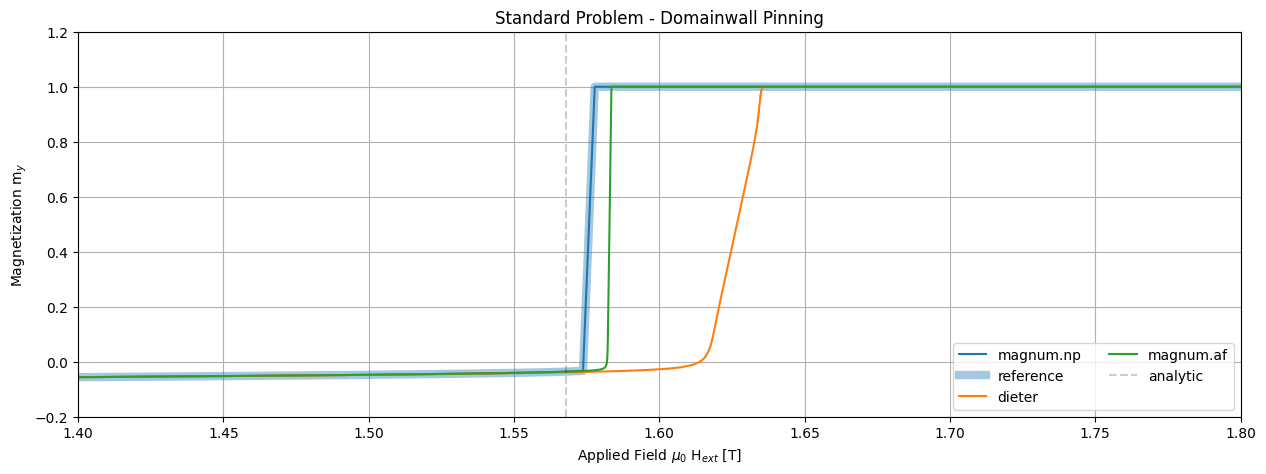

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("data/m.dat")
ref = np.loadtxt("ref/m_ref.dat")
data_dieter = np.loadtxt("ref/m_dieter.dat")
data_magnumaf = np.loadtxt("ref/m_magnumaf.dat")


fig, ax = plt.subplots(figsize=(15,5))
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.plot(data[:,2]*4*np.pi*1e-7, data[:,5], '-', color = cycle[0], label = "magnum.np")
ax.plot(ref[:,2]*4*np.pi*1e-7, ref[:,5], '-', color = cycle[0], linewidth = 6, alpha = 0.4, label = "reference")
ax.plot(data_dieter[:,1], data_dieter[:,3], '-', color = cycle[1], label = "dieter")
ax.plot(data_magnumaf[:,4]*4*np.pi*1e-7, data_magnumaf[:,2], '-', color = cycle[2], label = "magnum.af")
ax.axvline(x = 1.568, linestyle = '--', color = 'black', alpha = 0.2, label = 'analytic')

ax.set_xlim([1.4,1.8])
ax.set_ylim([-0.2,1.2])
ax.set_title("Standard Problem - Domainwall Pinning")
ax.set_xlabel("Applied Field $\mu$$_0$ H$_{ext}$ [T]")
ax.set_ylabel("Magnetization m$_y$")
ax.legend(ncol=2, loc='lower right')
ax.grid()
fig.savefig("data/results.png")